# Background

## IE7300 Statistical Learning Final Project Group - 8

### Adult Annual Income Classification 

Datatset Link:  https://archive.ics.uci.edu/ml/datasets/adult

## 1. Libraries

In [1]:
#Importing Libaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import timeit
from dataclasses import dataclass, field 
import random 
from scipy import stats
from scipy.stats import norm 
import math
from math import exp
from math import sqrt
from math import pi
from numpy.linalg import eigh
from __future__ import annotations
from typing import Tuple
from abc import ABC,abstractmethod

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,recall_score,mean_squared_error,mean_absolute_error,r2_score, roc_auc_score,f1_score

#from sklearn.model_selection import train_test_split
#from sklearn.datasets import load_breast_cancer,make_regression

## 2. Dataset Preprocessing and Insights


### 2A. Data Load and Split

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
#Printing first 10 record
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


#### Observations : 

1. workclass column contains ? values.
2. occupation contains ? values. 
3. capital gain and capital loss contains many 0 values.
4. some correlation present between education and educational-num column. 
5. Target Column "income" is in categorical type.

In [4]:
#Printing Shape of Data
df.shape

(48842, 15)

In [5]:
#Information of Adult Income Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
#Spliting data for training, testing and validation 
from fast_ml.model_development import train_valid_test_split

X_train_df,y_train_df, X_valid_df, y_valid_df, X_test_df, y_test_df = train_valid_test_split(df, target = 'income', train_size=0.70, valid_size=0.25, test_size=0.05)

print(X_train_df.shape, y_train_df.shape, "\n")

print(X_valid_df.shape, y_valid_df.shape, "\n")

print(X_test_df.shape, y_test_df.shape, "\n")

(34189, 14) (34189,) 

(12210, 14) (12210,) 

(2443, 14) (2443,) 



In [8]:
X_valid_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
33315,21,Private,129980,9th,5,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States
30941,41,Private,174201,HS-grad,9,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States
5860,39,Private,127573,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,2202,0,45,United-States
9650,36,Private,109204,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
34832,44,Private,127592,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States


In [9]:
y_valid_df.head()

33315    <=50K
30941    <=50K
5860     <=50K
9650     <=50K
34832    <=50K
Name: income, dtype: object

### 2B. EDA

In [10]:
#Convering Age Numerical type to Categorical type

Age_Category = pd.cut(df.age, bins = [0,18,24,35,44,54,65,75,90], labels = ['<=18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-75','75<='])
df.insert(1,'age category', Age_Category)

#Convering hours-per-week Numerical type to Categorical type

working_hours_Category = pd.cut(df['hours-per-week'], bins = [0,10,20,30,40,50,60,70,80,90,100], labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70','70-80','80-90','90-100'])
df.insert(15,'working hours category', working_hours_Category)

In [11]:
df.head()

,age,age category,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,working hours category,income
0,25,25-34,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,30-40,<=50K
1,38,35-44,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,40-50,<=50K
2,28,25-34,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,30-40,>50K
3,44,35-44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,30-40,>50K
4,18,<=18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,20-30,<=50K


In [12]:
#Finding total ? value
df.isin(['?']).sum()

age                          0
age category                 0
workclass                 2799
fnlwgt                       0
education                    0
educational-num              0
marital-status               0
occupation                2809
relationship                 0
race                         0
gender                       0
capital-gain                 0
capital-loss                 0
hours-per-week               0
native-country             857
working hours category       0
income                       0
dtype: int64

In [13]:
# Converting ? to null value
df.replace('?', np.nan, inplace=True)

In [14]:
df.isnull().sum()

age                          0
age category                 0
workclass                 2799
fnlwgt                       0
education                    0
educational-num              0
marital-status               0
occupation                2809
relationship                 0
race                         0
gender                       0
capital-gain                 0
capital-loss                 0
hours-per-week               0
native-country             857
working hours category       0
income                       0
dtype: int64

In [15]:
#Finding Percentage of Null Values

percentage_null = df.isnull().sum()*100/len(df)
percentage_null

age                       0.000000
age category              0.000000
workclass                 5.730724
fnlwgt                    0.000000
education                 0.000000
educational-num           0.000000
marital-status            0.000000
occupation                5.751198
relationship              0.000000
race                      0.000000
gender                    0.000000
capital-gain              0.000000
capital-loss              0.000000
hours-per-week            0.000000
native-country            1.754637
working hours category    0.000000
income                    0.000000
dtype: float64

In [16]:
capitalgain_percent_zeros = (df['capital-gain'] == 0).sum()*100/len(df['capital-gain'])
capitalgain_percent_zeros

91.73866754023177

In [17]:
capitalloss_percent_zeros = (df['capital-loss'] == 0).sum()*100/len(df['capital-loss'])
capitalloss_percent_zeros

95.3277916547234

In [18]:
df.duplicated().sum()

52

In [19]:
duplicate = df[df.duplicated()]
duplicate.head()

,age,age category,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,working hours category,income
864,24,19-24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,30-40,<=50K
11189,37,35-44,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,30-40,<=50K
11212,29,25-34,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,30-40,<=50K
13848,30,25-34,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,30-40,<=50K
15960,18,<=18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,0-10,<=50K


In [20]:
df = df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

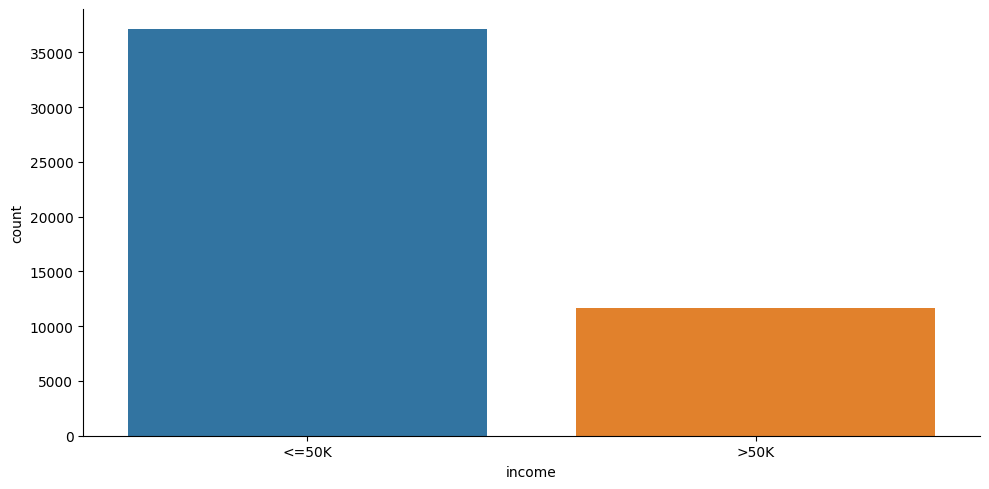

In [22]:
sns.catplot(data=df, x='income', kind= 'count', aspect=2)

<Axes: >

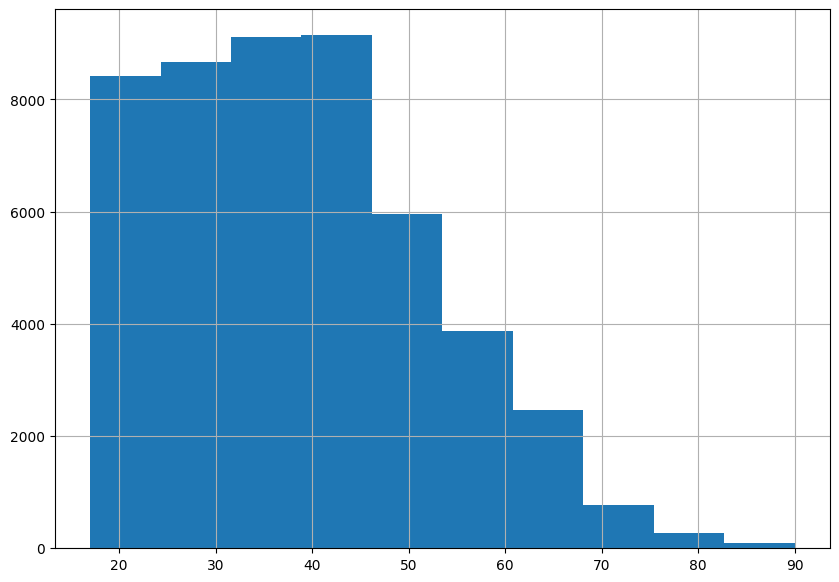

In [23]:
plt.figure(figsize=(10,7))
df['age'].hist()

<Axes: >

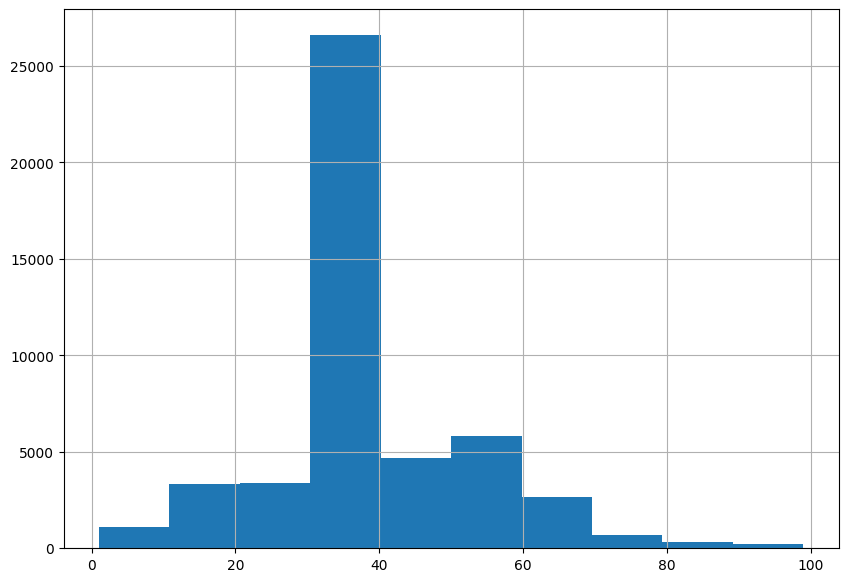

In [24]:
plt.figure(figsize=(10,7))
df['hours-per-week'].hist()

<Axes: >

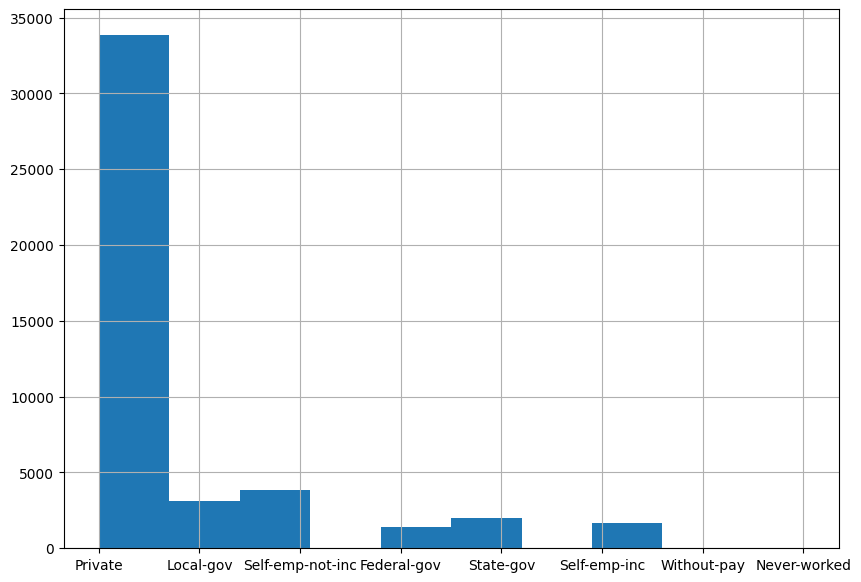

In [25]:
plt.figure(figsize=(10,7))
df['workclass'].hist()


<Axes: >

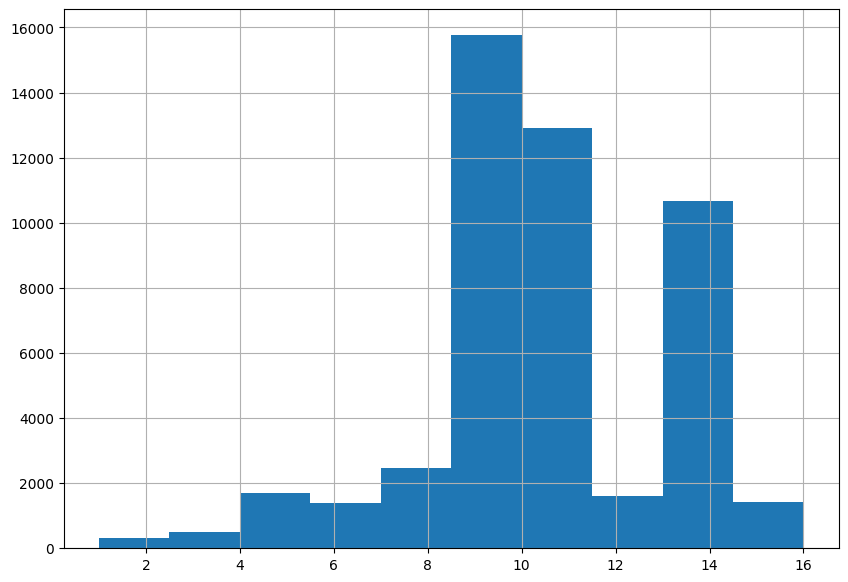

In [26]:
plt.figure(figsize=(10,7))
df['educational-num'].hist()

<Axes: >

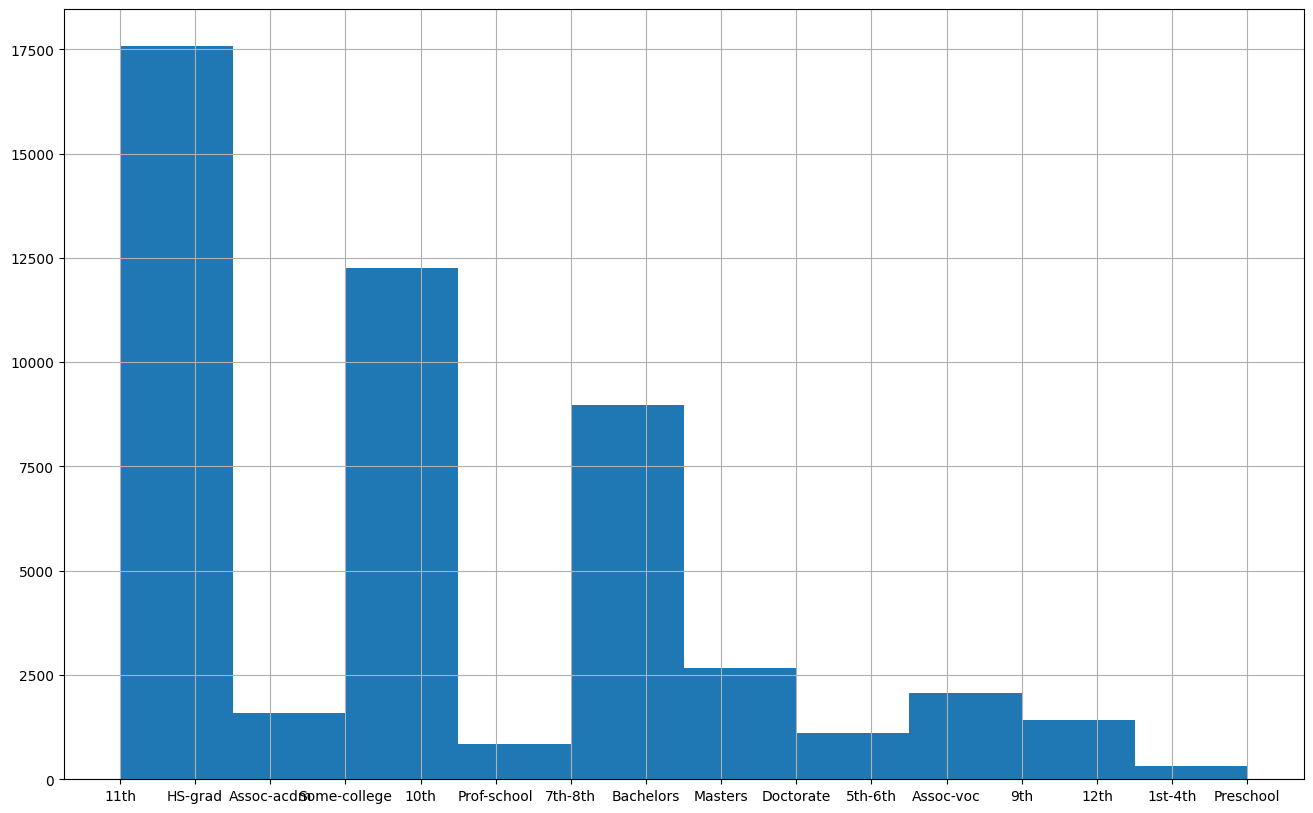

In [27]:
plt.figure(figsize=(16,10))
df['education'].hist()


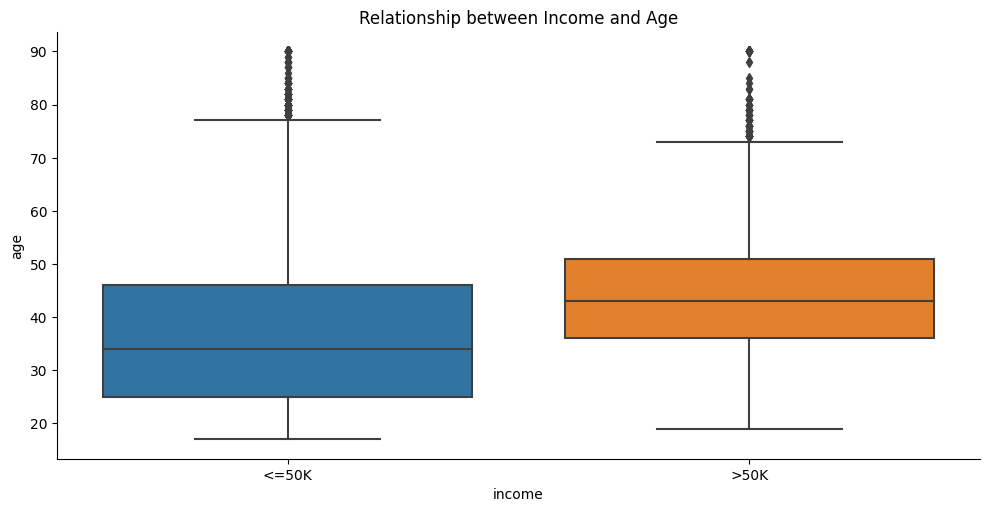

In [28]:
sns.catplot(data=df, x='income', y='age', kind= 'box', aspect=2)
plt.title('Relationship between Income and Age')
plt.show()

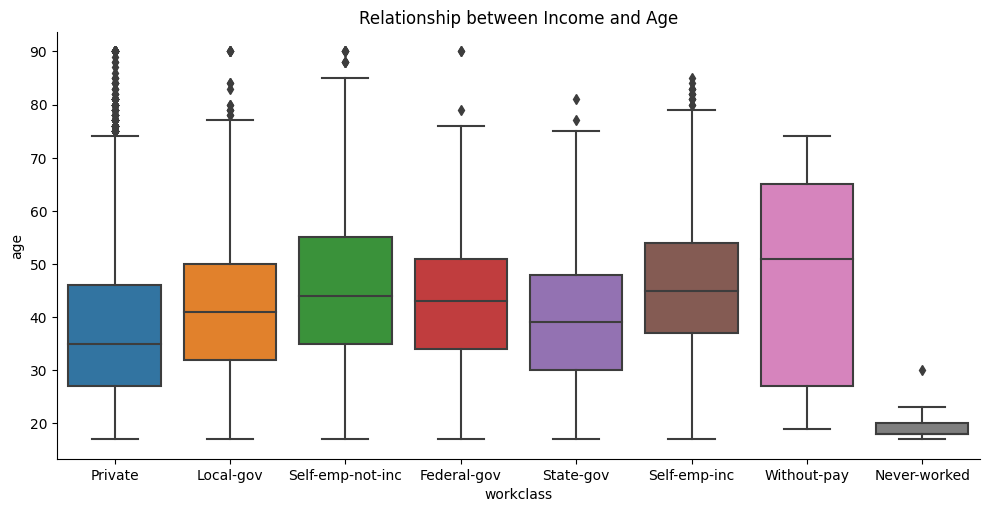

In [29]:
sns.catplot(data=df, x='workclass', y='age', kind= 'box', aspect=2)
plt.title('Relationship between Income and Age')
plt.show()

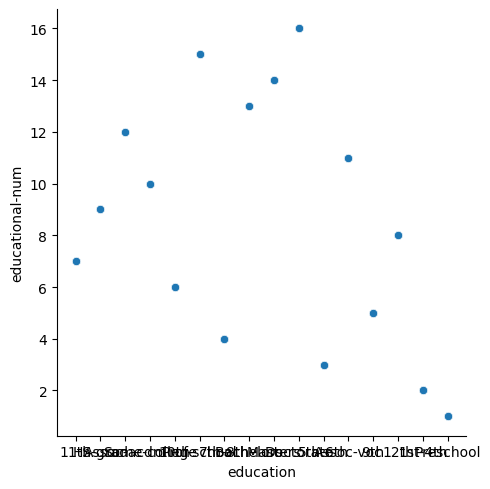

<Figure size 2000x1000 with 0 Axes>

In [30]:
sns.relplot(data= df, x = 'education', y = 'educational-num')
plt.xlabel("education")
plt.ylabel("educational-num")
plt.figure(figsize=(20,10))
plt.show()

Text(0.5, 1.0, 'Relationship between selected features and target')

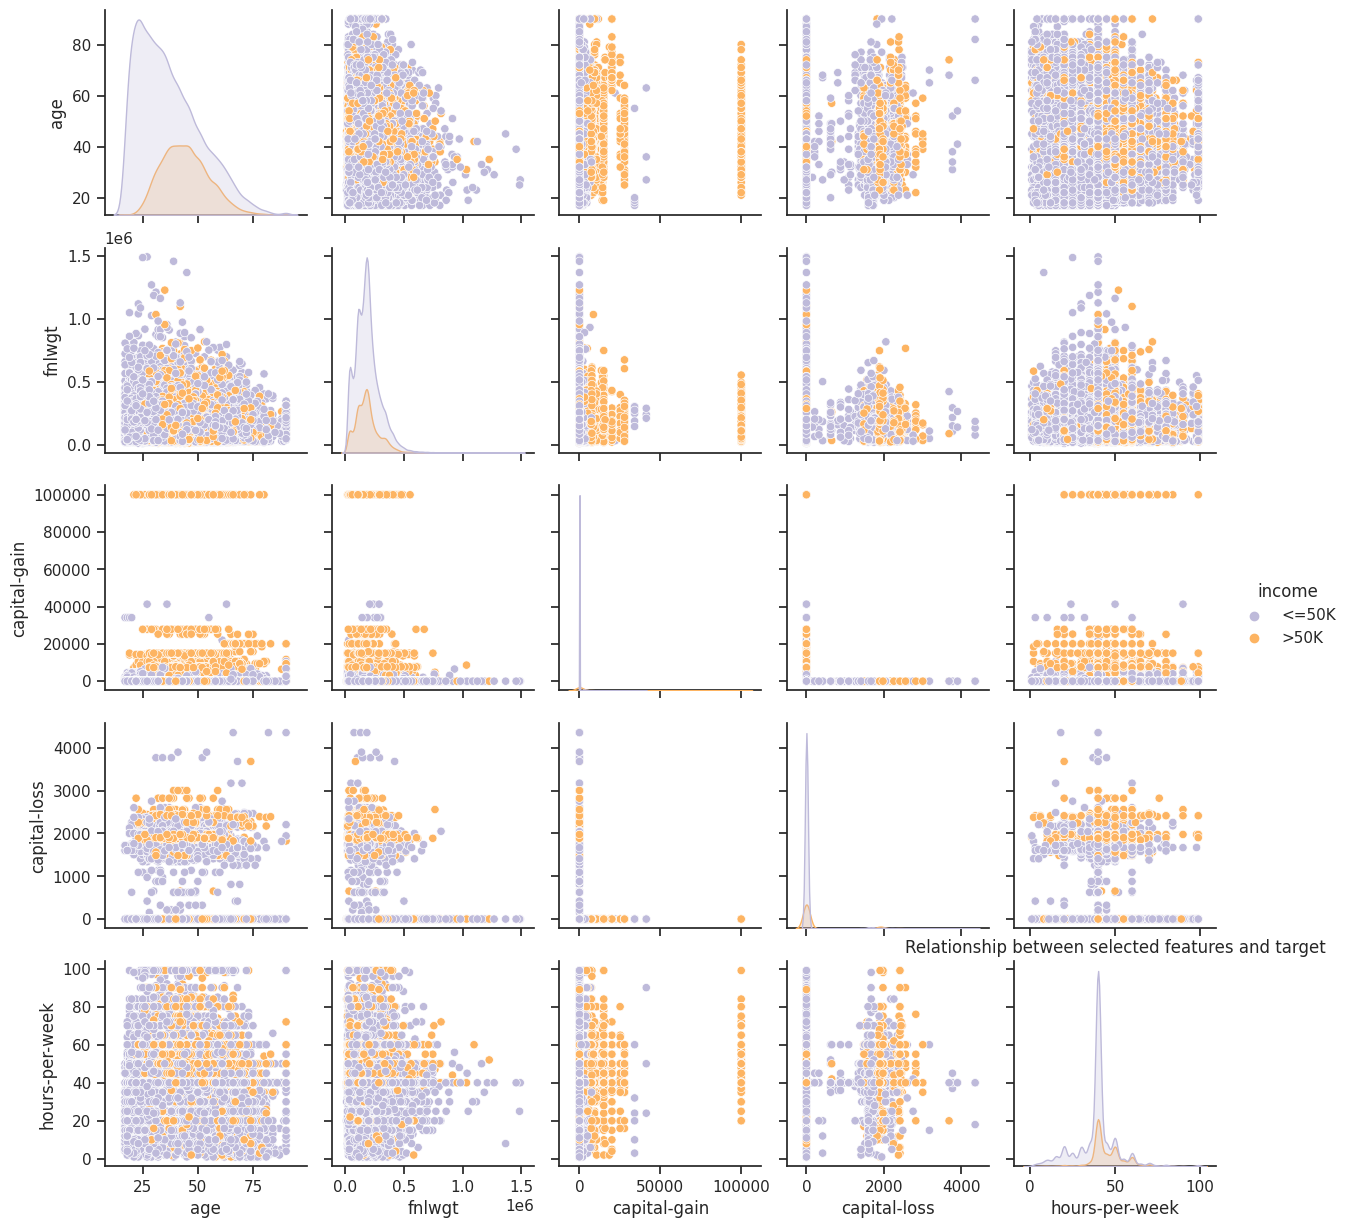

In [31]:
# Creating Pair wise plot for numerical columns to understand relationships
dfPlotTwo = df[['age','fnlwgt','education','capital-gain', 'capital-loss','hours-per-week','income']]

# Plot
sns.set_theme(style="ticks")
my_pal = {"True": "#fdb462", "False": "#bebada"}
sns.pairplot(dfPlotTwo, hue= "income", palette=sns.color_palette(["#bebada", "#fdb462"]))
plt.title("Relationship between selected features and target")

### 2C. Data Preprocessing

In [32]:
train_df = pd.concat([X_train_df, y_train_df], axis=1)
train_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
3063,47,Local-gov,115304,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2358,20,Private,184779,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
41679,21,Private,119474,HS-grad,9,Never-married,Other-service,Other-relative,White,Female,0,0,40,United-States,<=50K
1033,65,Self-emp-not-inc,200565,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,18,United-States,<=50K
12324,31,Private,356823,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,10520,0,40,United-States,>50K


In [33]:
df_train = train_df

In [34]:
df_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,34189.000000,3.418900e+04,34189.000000,34189.000000,34189.000000,34189.000000
mean,38.722689,1.897631e+05,10.077364,1079.734505,88.910615,40.438445
std,13.699710,1.053467e+05,2.575458,7419.149308,406.129214,12.365935
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783900e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.374780e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
#Binning Age column - Ordinal Categories
df_train['age-cat'] = pd.cut(x=df_train['age'], bins=[0,18,25,35,45,55,65,75,90],
                    labels=['<18', '19-25','25-35','35-45','45-55','55-65','65-75','75<'])

In [36]:
#Binning Hours per week column - Ordinal Categories
df_train['hours-per-week-cat'] = pd.cut(x=df_train['hours-per-week'], bins=[0,10,20,30,40,50,60,70,80,90,100],
                    labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

In [37]:
#Binning Capital Gain and Loss column - One Hot encoding Categories
#Contained a lot of 0 values, so replaced by 0 or 1
df_train['capital-loss-cat'] = [0 if x ==0 else 1 for x in df_train['capital-loss']]
df_train['capital-gain-cat'] = [0 if x ==0 else 1 for x in df_train['capital-gain']]

In [38]:
df_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age-cat,hours-per-week-cat,capital-loss-cat,capital-gain-cat
3063,47,Local-gov,115304,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K,45-55,30-40,0,0
2358,20,Private,184779,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,19-25,30-40,0,0
41679,21,Private,119474,HS-grad,9,Never-married,Other-service,Other-relative,White,Female,0,0,40,United-States,<=50K,19-25,30-40,0,0
1033,65,Self-emp-not-inc,200565,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,18,United-States,<=50K,55-65,10-20,0,0
12324,31,Private,356823,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,10520,0,40,United-States,>50K,25-35,30-40,0,1


In [39]:
#Preparing Train Raw data frame
df_train_model=df_train

X_train = df_train_model.drop('income', axis=1)
y_train = df_train_model['income']

In [40]:
#Preparing Validation Raw data frame
valid_df = pd.concat([X_valid_df, y_valid_df], axis=1)

df_valid = valid_df

df_valid['age-cat'] = pd.cut(x=df_valid['age'], bins=[0,18,25,35,45,55,65,75,90],
                    labels=['<18', '19-25','25-35','35-45','45-55','55-65','65-75','75<'])

df_valid['hours-per-week-cat'] = pd.cut(x=df_valid['hours-per-week'], bins=[0,10,20,30,40,50,60,70,80,90,100],
                    labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

df_valid['capital-loss-cat'] = [0 if x ==0 else 1 for x in df_valid['capital-loss']]
df_valid['capital-gain-cat'] = [0 if x ==0 else 1 for x in df_valid['capital-gain']]

df_valid_model=df_valid

X_valid = df_valid_model.drop('income', axis=1)
y_valid = df_valid_model['income']

In [41]:
#Preparing Test Raw data frame
test_df = pd.concat([X_test_df, y_test_df], axis=1)

df_test = test_df

df_test['age-cat'] = pd.cut(x=df_test['age'], bins=[0,18,25,35,45,55,65,75,90],
                    labels=['<18', '19-25','25-35','35-45','45-55','55-65','65-75','75<'])

df_test['hours-per-week-cat'] = pd.cut(x=df_test['hours-per-week'], bins=[0,10,20,30,40,50,60,70,80,90,100],
                    labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

df_test['capital-loss-cat'] = [0 if x ==0 else 1 for x in df_test['capital-loss']]
df_test['capital-gain-cat'] = [0 if x ==0 else 1 for x in df_test['capital-gain']]

df_test_model=df_test

X_test = df_test_model.drop('income', axis=1)
y_test = df_test_model['income']

#### Method 1: Converting columns to mix Numerical + Categorical types

In [42]:
##Numerical: ['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week']
##Categorical: ['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss-cat', 'capital-gain-cat','native']
X_train1=X_train[['age','workclass','fnlwgt', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss', 'capital-gain', 'hours-per-week', 'native-country']]
y_train1=y_train.apply(lambda x: 0 if x=='<=50K' else 1)

X_valid1 = X_valid[['age','workclass','fnlwgt', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss', 'capital-gain', 'hours-per-week', 'native-country']]
y_valid1 = y_valid.apply(lambda x: 0 if x=='<=50K' else 1)

X_test1 = X_test[['age','workclass','fnlwgt', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss', 'capital-gain', 'hours-per-week', 'native-country']]
y_test1 = y_test.apply(lambda x: 0 if x=='<=50K' else 1)

X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34189 entries, 3063 to 9431
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              34189 non-null  int64 
 1   workclass        34189 non-null  object
 2   fnlwgt           34189 non-null  int64 
 3   educational-num  34189 non-null  int64 
 4   marital-status   34189 non-null  object
 5   occupation       34189 non-null  object
 6   relationship     34189 non-null  object
 7   race             34189 non-null  object
 8   gender           34189 non-null  object
 9   capital-loss     34189 non-null  int64 
 10  capital-gain     34189 non-null  int64 
 11  hours-per-week   34189 non-null  int64 
 12  native-country   34189 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.7+ MB


In [43]:
# Standard Scaling for all numerical columns
sc1 = StandardScaler()
X_train1[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week']] = sc1.fit_transform(X_train1[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week']])
X_valid1[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week']] = sc1.transform(X_valid1[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week']])
X_test1[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week']] = sc1.transform(X_test1[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week']])

#Ordinal Encoder used to encode categories. The order for these columns don't have significance
ordinal1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train1[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']] = ordinal1.fit_transform(X_train1[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_valid1[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']] = ordinal1.transform(X_valid1[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_test1[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']] = ordinal1.transform(X_test1[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])

#Other than above scaled numerical columns and categorical columns we also have Ordinal category columns. But when using Method 1 we will ignore ordinal nature of categories
# We will treat all categorical columns as discrete categories. Each category will be a numerical category number. Order will have no significance

#### Method 2a: Converting columns to all Categorical types (Dense Structure)

In [44]:
#Categorical: 
X_train2=X_train[['age-cat', 'workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss-cat', 'capital-gain-cat', 'hours-per-week-cat','native-country']]
y_train2=y_train.apply(lambda x: 0 if x=='<=50K' else 1)

X_valid2=X_valid[['age-cat', 'workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss-cat', 'capital-gain-cat', 'hours-per-week-cat','native-country']]
y_valid2=y_valid.apply(lambda x: 0 if x=='<=50K' else 1)

X_test2=X_test[['age-cat', 'workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss-cat', 'capital-gain-cat', 'hours-per-week-cat','native-country']]
y_test2=y_test.apply(lambda x: 0 if x=='<=50K' else 1)

X_train2.info()
#Numerical columns are not selected. Their binned versions are chosen

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34189 entries, 3063 to 9431
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age-cat             34189 non-null  category
 1   workclass           34189 non-null  object  
 2   educational-num     34189 non-null  int64   
 3   marital-status      34189 non-null  object  
 4   occupation          34189 non-null  object  
 5   relationship        34189 non-null  object  
 6   race                34189 non-null  object  
 7   gender              34189 non-null  object  
 8   capital-loss-cat    34189 non-null  int64   
 9   capital-gain-cat    34189 non-null  int64   
 10  hours-per-week-cat  34189 non-null  category
 11  native-country      34189 non-null  object  
dtypes: category(2), int64(3), object(7)
memory usage: 2.9+ MB


In [45]:
# Preprocess the age-cat column. Adding Ordinal properties
ordinal_map = {'<18': 0, '19-25': 1, '25-35': 2, '35-45': 3, '45-55': 4, '55-65': 5, '65-75': 6, '75<': 7}
X_train2['age-cat'] = X_train2['age-cat'].map(ordinal_map)
X_valid2['age-cat'] = X_valid2['age-cat'].map(ordinal_map)
X_test2['age-cat'] = X_test2['age-cat'].map(ordinal_map)

#Appling ordinal property but order won't have significnace for these columns
ordinal2 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train2[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss-cat', 'capital-gain-cat','native-country']] = ordinal2.fit_transform(X_train2[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss-cat', 'capital-gain-cat','native-country']])
X_valid2[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss-cat', 'capital-gain-cat','native-country']] = ordinal2.transform(X_valid2[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss-cat', 'capital-gain-cat','native-country']])
X_test2[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss-cat', 'capital-gain-cat','native-country']] = ordinal2.transform(X_test2[['workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss-cat', 'capital-gain-cat','native-country']])

# Preprocess the hours-per-week-cat column. Adding Ordinal properties
ordinal_map = {'0-10': 0, '10-20': 1, '20-30': 2, '30-40': 3, '40-50': 4, '50-60': 5, '60-70': 6, '70-80': 7, '80-90': 8, '90-100': 9}
X_train2['hours-per-week-cat'] = X_train2['hours-per-week-cat'].map(ordinal_map)
X_valid2['hours-per-week-cat'] = X_valid2['hours-per-week-cat'].map(ordinal_map)
X_test2['hours-per-week-cat'] = X_test2['hours-per-week-cat'].map(ordinal_map)

#### Method 3A: Converting columns to all Numerical types (Sparse Structure) - Numerical columns - Standard Scaling

In [46]:
#Numerical: 
X_train3=X_train[['age', 'workclass', 'fnlwgt', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss', 'capital-gain', 'hours-per-week','native-country']]
y_train3=y_train.apply(lambda x: 0 if x=='<=50K' else 1)

X_valid3=X_valid[['age', 'workclass', 'fnlwgt', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss', 'capital-gain', 'hours-per-week','native-country']]
y_valid3=y_valid.apply(lambda x: 0 if x=='<=50K' else 1)

X_test3=X_test[['age', 'workclass', 'fnlwgt', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss', 'capital-gain', 'hours-per-week','native-country']]
y_test3=y_test.apply(lambda x: 0 if x=='<=50K' else 1)

#All numerical columns selected. No column binned. All Categorical columns are first Ordinal encoded to get numerical values and then one hot encoded to sparse columns
#4 categories of a column will be converted to 3 columns 
X_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34189 entries, 3063 to 9431
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              34189 non-null  int64 
 1   workclass        34189 non-null  object
 2   fnlwgt           34189 non-null  int64 
 3   educational-num  34189 non-null  int64 
 4   marital-status   34189 non-null  object
 5   occupation       34189 non-null  object
 6   relationship     34189 non-null  object
 7   race             34189 non-null  object
 8   gender           34189 non-null  object
 9   capital-loss     34189 non-null  int64 
 10  capital-gain     34189 non-null  int64 
 11  hours-per-week   34189 non-null  int64 
 12  native-country   34189 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.7+ MB


In [47]:
#Scaling numerical columns
sc3 = StandardScaler()
X_train3[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']] = sc3.fit_transform(X_train3[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']])
X_valid3[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']] = sc3.transform(X_valid3[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']])
X_test3[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']] = sc3.transform(X_test3[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']])

# One hot categories - transform data - Ordinal Encoder + One hot encoding
ordinal3 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train3[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']] = ordinal3.fit_transform(X_train3[['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_valid3[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']] = ordinal3.transform(X_valid3[['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_test3[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']] = ordinal3.transform(X_test3[['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])

X_train3_encoded = pd.get_dummies(X_train3[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_train3 = pd.concat([X_train3.drop(['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'], axis=1), X_train3_encoded], axis=1)

X_valid3_encoded = pd.get_dummies(X_valid3[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_valid3 = pd.concat([X_valid3.drop(['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'], axis=1), X_valid3_encoded], axis=1)

X_test3_encoded = pd.get_dummies(X_test3[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_test3 = pd.concat([X_test3.drop(['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'], axis=1), X_test3_encoded], axis=1)

#### Method 3B: Converting columns to all Numerical types (Sparse Structure) - Numerical columns - Normalization Scaling

In [48]:
#Numerical: 
X_train3b=X_train[['age', 'workclass', 'fnlwgt', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss', 'capital-gain', 'hours-per-week','native-country']]
y_train3b=y_train.apply(lambda x: 0 if x=='<=50K' else 1)

X_valid3b=X_valid[['age', 'workclass', 'fnlwgt', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss', 'capital-gain', 'hours-per-week','native-country']]
y_valid3b=y_valid.apply(lambda x: 0 if x=='<=50K' else 1)

X_test3b=X_test[['age', 'workclass', 'fnlwgt', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss', 'capital-gain', 'hours-per-week','native-country']]
y_test3b=y_test.apply(lambda x: 0 if x=='<=50K' else 1)

#All numerical columns selected. No column binned. All Categorical columns are first Ordinal encoded to get numerical values and then one hot encoded to sparse columns
#4 categories of a column will be converted to 3 columns 
X_train3b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34189 entries, 3063 to 9431
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              34189 non-null  int64 
 1   workclass        34189 non-null  object
 2   fnlwgt           34189 non-null  int64 
 3   educational-num  34189 non-null  int64 
 4   marital-status   34189 non-null  object
 5   occupation       34189 non-null  object
 6   relationship     34189 non-null  object
 7   race             34189 non-null  object
 8   gender           34189 non-null  object
 9   capital-loss     34189 non-null  int64 
 10  capital-gain     34189 non-null  int64 
 11  hours-per-week   34189 non-null  int64 
 12  native-country   34189 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.7+ MB


In [49]:
#Scaling numerical columns
mmsc3 = MinMaxScaler()
X_train3b[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']] = mmsc3.fit_transform(X_train3b[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']])
X_valid3b[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']] = mmsc3.transform(X_valid3b[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']])
X_test3b[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']] = mmsc3.transform(X_test3b[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week','educational-num']])

# One hot categories - transform data - Ordinal Encoder + One hot encoding
ordinal3b = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train3b[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']] = ordinal3b.fit_transform(X_train3b[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_valid3b[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']] = ordinal3b.transform(X_valid3b[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_test3b[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']] = ordinal3b.transform(X_test3b[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])

X_train3b_encoded = pd.get_dummies(X_train3b[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_train3b = pd.concat([X_train3b.drop(['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'], axis=1), X_train3b_encoded], axis=1)

X_valid3b_encoded = pd.get_dummies(X_valid3b[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_valid3b = pd.concat([X_valid3b.drop(['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'], axis=1), X_valid3b_encoded], axis=1)

X_test3b_encoded = pd.get_dummies(X_test3b[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']])
X_test3b = pd.concat([X_test3b.drop(['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'], axis=1), X_test3b_encoded], axis=1)

#### Method 3C: Converting columns to all Numerical types (Sparse Structure) - Numerical columns - Principal Component Analysis

In [50]:
#Numerical for Standard Scaled columns: 
pca = PCA()
X_train3_pca=pca.fit_transform(X_train3)
print(pca.explained_variance_ratio_)

X_valid3_pca=pca.transform(X_valid3)
X_test3_pca=pca.transform(X_test3)

X_train3_pca.shape

[0.6553994  0.19619096 0.03585835 0.02142543 0.02088675 0.0123633
 0.0111879  0.01102669 0.00981947 0.00876948 0.00825084 0.00732481
 0.00149663]


(34189, 13)

In [51]:
class PCAVG8:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self,X):
        self.mean = np.mean(X,axis=0)
        X = X - self.mean
        cov = np.cov(X.T)
        # Calculate Eigan Values and Eigan vectors
        eigen_values, eigen_vectors = np.linalg.eig(cov)
        eigen_vectors = eigen_vectors.T
        indexs = np.argsort(eigen_values)[::-1]
        eigen_values = eigen_values[indexs]
        eigen_vectors = eigen_vectors[indexs]
        top_comp = eigen_values[0:self.n_components]
        print("The Variance Captured by", self.n_components, "components:", round(top_comp.sum()/eigen_values.sum(),2)*100, "%",'\n')
        self.components = eigen_vectors[0:self.n_components]
        
    def transform(self,X):
        X = X - self.mean
        #print(np.dot(X,self.components.T))
        return np.dot(X,self.components.T)  

In [52]:
pca = PCAVG8(n_components=13)
pca.fit(X_train3)
X_train3_pca = pca.transform(X_train3)
X_valid3_pca = pca.transform(X_valid3)
X_test3_pca = pca.transform(X_test3)

X_train3_pca_df=pd.DataFrame(X_train3_pca)
#y_train3.to_numpy()

X_train3_pca.shape

The Variance Captured by 13 components: 100.0 % 



(34189, 13)

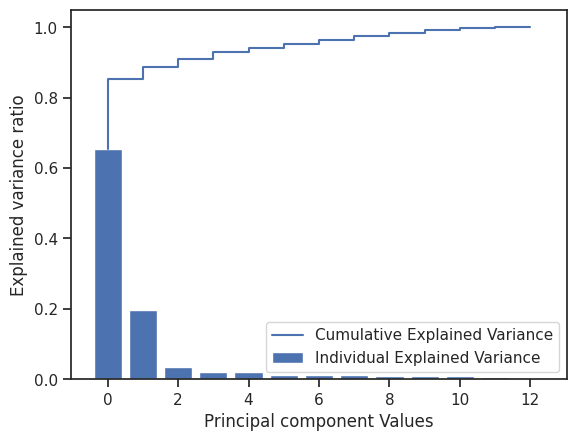

In [53]:
cova_matrix = np.cov(X_train3, rowvar=False)

eignvalues, egnvectors = eigh(cova_matrix)

total_eignvalues = sum(eignvalues)
indiv_var_exp = [(i/total_eignvalues) for i in sorted(eignvalues, reverse=True)]

cumu_exp_var = np.cumsum(indiv_var_exp)

plt.bar(range(0,len(indiv_var_exp)), indiv_var_exp, label='Individual Explained Variance')
plt.step(range(0,len(cumu_exp_var)), cumu_exp_var, label='Cumulative Explained Variance')
plt.xlabel('Principal component Values')
plt.ylabel('Explained variance ratio')
plt.legend()
plt.show()

## 3. Model Creation

In [54]:
#Quick overview of X columns
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34189 entries, 3063 to 9431
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 34189 non-null  int64   
 1   workclass           34189 non-null  object  
 2   fnlwgt              34189 non-null  int64   
 3   education           34189 non-null  object  
 4   educational-num     34189 non-null  int64   
 5   marital-status      34189 non-null  object  
 6   occupation          34189 non-null  object  
 7   relationship        34189 non-null  object  
 8   race                34189 non-null  object  
 9   gender              34189 non-null  object  
 10  capital-gain        34189 non-null  int64   
 11  capital-loss        34189 non-null  int64   
 12  hours-per-week      34189 non-null  int64   
 13  native-country      34189 non-null  object  
 14  age-cat             34189 non-null  category
 15  hours-per-week-cat  34189 non-null

The following Model Implementations
1.   Naive Bayes
2.   Logistic Regression
3.   SVM
4.   KNN
5.   Decision Tree
6.   Neural Network

For each model we showcase: Ideal Performance of model using Sk-learn, then the performance based on model created by our group. In some cases we have used the Sk-learn model hyper parameters to tune our models


In [55]:
thresh = 0.5

#def prevalence_score(y_actual):
#    return (sum(y_actual)/len(y_actual))

def specificity_score(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

report_metrics= pd.DataFrame(columns = ['Model_Run', 'Model_Type', 'Model_Name', 'Data_Structure', 'Training_Time', 'Validation_Time', 'AUC', 'Accuracy', 'F1_Score', 'Recall', 'Precision', 'Specificity'])
model_run = 1
def metrics_report(model_run,model_type,model_name,data_structure,train_time, valid_time, y_actual, y_pred, thresh=0.5):
    model_type = model_type
    model_run = model_run
    model_name = model_name
    data_structure = data_structure
    train_time = train_time
    valid_time = valid_time
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = specificity_score(y_actual, y_pred, thresh)
    #prevalence = prevalence_score(y_actual)
    #f1= 2 * (precision * recall) / (precision + recall)
    f1= f1_score(y_actual, y_pred, average='macro')
    print('Model_Name: ',model_name)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('f1_score:%.3f'%f1)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    #print('prevalence:%.3f'%prevalence)
    print('train_time:%.3f'%train_time)
    print('valid_time:%.3f'%valid_time)

    print('\n')
    #report__metrics= pd.DataFrame(columns = ['Model_Run', 'Model_Type', 'Model_Name', 'Data_Structure', 'Training_Time', 'Validation_Time', 'AUC', 'Accuracy', 'F1_Score', 'Recall', 'Precision', 'Specificity', 'Prevalence'])

    return {'Model_Run' : model_run,
                           'Model_Type' : model_type,
                           'Model_Name' : model_name,
                           'Data_Structure': data_structure, 
                           'Training_Time' : train_time, 
                           'Validation_Time' : valid_time,
                                          'AUC' : auc,
                                          'Accuracy' : accuracy, 
                                          'F1_Score' : f1,
                                          'Recall' : recall, 
                                          'Precision' : precision, 
                                          'Specificity' : specificity
                                          }

### 3.1 Naive Bayes

#### 3.1A Naive Bayes - Sk-learn based implementation - Method 1

In [56]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

In [57]:
#### Method 1: Converting columns to mix Numerical + Categorical types
classifier_1g = GaussianNB()
classifier_1g.fit(X_train1[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week', 'educational-num']], y_train1)

classifier_1c = CategoricalNB(alpha=1.0, fit_prior=True)
classifier_1c.fit(X_train1[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']], y_train1)

# ----- Get probability predictions from each model -----
# On training data
G_train_probas = classifier_1g.predict_proba(X_train1[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week', 'educational-num']])
C_train_probas = classifier_1c.predict_proba(X_train1[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']])

# And on testing X_valid1 data
G_valid_probas = classifier_1g.predict_proba(X_valid1[['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week', 'educational-num']])
C_valid_probas = classifier_1c.predict_proba(X_valid1[['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']])

# Combine probability prediction for class=1 from both models into a 2D array
X_new_train = np.c_[(G_train_probas[:,1], C_train_probas[:,1])] # Train
X_new_valid = np.c_[(G_valid_probas[:,1], C_valid_probas[:,1])] # Test

# ----- Fit Gaussian model on the X_new -----

start = timeit.default_timer()
classifier_1gc = GaussianNB()
classifier_1gc.fit(X_new_train, y_train1)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
# Predict class labels on a test data
y_valid1_pred = classifier_1gc.predict(X_new_valid)
#print(np.concatenate((y_valid1_pred.reshape(len(y_valid1_pred),1), y_valid1.to_numpy().reshape(len(y_valid1.to_numpy()),1)),1))
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid1, y_valid1_pred)
print(cm, "\n")
print(classification_report(y_valid1, y_valid1_pred), "\n")

report_metrics=report_metrics.append(metrics_report(1,"SK_Learn", "Naive_Bayes", "Mix_Columns",train_time, valid_time, y_actual=y_valid1, y_pred=y_valid1_pred, thresh=0.5),ignore_index=True)

[[8685  635]
 [1668 1222]] 

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      9320
           1       0.66      0.42      0.51      2890

    accuracy                           0.81     12210
   macro avg       0.75      0.68      0.70     12210
weighted avg       0.80      0.81      0.80     12210
 

Model_Name:  Naive_Bayes
AUC:0.677
accuracy:0.811
f1_score:0.699
recall:0.423
precision:0.658
specificity:0.932
train_time:0.010
valid_time:0.010




#### 3.1A Naive Bayes - Sk-learn based implementation - Method 2

In [58]:
#### Method 2a: Converting columns to all Categorical types - Discrete Naive Bayes
start = timeit.default_timer()
clf = CategoricalNB(alpha=1.0, fit_prior=True)
clf.fit(X_train2, y_train2)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid2_pred = clf.predict(X_valid2)
#print(np.concatenate((y_valid2_pred.reshape(len(y_valid2_pred),1), y_valid2.to_numpy().reshape(len(y_valid2.to_numpy()),1)),1))
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid2, y_valid2_pred)
print(cm, "\n")
print(classification_report(y_valid2, y_valid2_pred), "\n")

report_metrics=report_metrics.append(metrics_report(2,"SK_Learn", "Naive_Bayes", "Cat_Columns",train_time, valid_time, y_actual=y_valid2, y_pred=y_valid2_pred, thresh=0.5),ignore_index=True)

[[7675 1645]
 [ 653 2237]] 

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      9320
           1       0.58      0.77      0.66      2890

    accuracy                           0.81     12210
   macro avg       0.75      0.80      0.77     12210
weighted avg       0.84      0.81      0.82     12210
 

Model_Name:  Naive_Bayes
AUC:0.799
accuracy:0.812
f1_score:0.765
recall:0.774
precision:0.576
specificity:0.823
train_time:0.030
valid_time:0.010




#### 3.1A Naive Bayes - Sk-learn based implementation - Method 2b - Complement Naive Bayes

In [59]:
#### Method 2b: Converting columns to all Categorical types - Complement Naive Bayes
start = timeit.default_timer()
clf2b = ComplementNB(alpha=1.0, fit_prior=True)
clf2b.fit(X_train2, y_train2)
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
y_valid2b_pred = clf2b.predict(X_valid2)
#print(np.concatenate((y_valid2b_pred.reshape(len(y_valid2b_pred),1), y_valid2.to_numpy().reshape(len(y_valid2.to_numpy()),1)),1))
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid2, y_valid2b_pred)

print(cm, "\n")
print(classification_report(y_valid2, y_valid2b_pred), "\n")

report_metrics=report_metrics.append(metrics_report(3,"SK_Learn", "Naive_Bayes", "Cat_Columns",train_time, valid_time, y_actual=y_valid2, y_pred=y_valid2b_pred, thresh=0.5),ignore_index=True)

[[5849 3471]
 [ 456 2434]] 

              precision    recall  f1-score   support

           0       0.93      0.63      0.75      9320
           1       0.41      0.84      0.55      2890

    accuracy                           0.68     12210
   macro avg       0.67      0.73      0.65     12210
weighted avg       0.81      0.68      0.70     12210
 

Model_Name:  Naive_Bayes
AUC:0.735
accuracy:0.678
f1_score:0.651
recall:0.842
precision:0.412
specificity:0.628
train_time:0.020
valid_time:0.000




#### 3.1A Naive Bayes - Sk-learn based implementation - Method 3 - Standard Scaler

In [60]:
#### Method 3a: Converting columns to all Numerical types - Standard Scaler
start = timeit.default_timer()
classifier3a = GaussianNB()
classifier3a.fit(X_train3, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
y_valid3_pred = classifier3a.predict(X_valid3)
stop = timeit.default_timer()
valid_time=round((stop - start),2)


cm = confusion_matrix(y_valid3, y_valid3_pred)

print(cm, "\n")
print(classification_report(y_valid3, y_valid3_pred), "\n")

report_metrics=report_metrics.append(metrics_report(4,"SK_Learn", "Naive_Bayes", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3_pred, thresh=0.5),ignore_index=True)

[[8931  389]
 [1980  910]] 

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      9320
           1       0.70      0.31      0.43      2890

    accuracy                           0.81     12210
   macro avg       0.76      0.64      0.66     12210
weighted avg       0.79      0.81      0.78     12210
 

Model_Name:  Naive_Bayes
AUC:0.637
accuracy:0.806
f1_score:0.659
recall:0.315
precision:0.701
specificity:0.958
train_time:0.040
valid_time:0.000




#### 3.1A Naive Bayes - Sk-learn based implementation - Method 3 - Min Max Scaler

In [61]:
#### Method 3b: Converting columns to all Numerical types - Min Max Scaler
start = timeit.default_timer()
classifier3b = GaussianNB()
classifier3b.fit(X_train3b, y_train3b)
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
y_valid3b_pred = classifier3b.predict(X_valid3b)
stop = timeit.default_timer()
valid_time=round((stop - start),2)


cm = confusion_matrix(y_valid3b, y_valid3b_pred)

print(cm, "\n")
print(classification_report(y_valid3b, y_valid3b_pred), "\n")

report_metrics=report_metrics.append(metrics_report(5,"SK_Learn", "Naive_Bayes", "Num_Columns",train_time, valid_time, y_actual=y_valid3b, y_pred=y_valid3b_pred, thresh=0.5),ignore_index=True)

[[8931  389]
 [1980  910]] 

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      9320
           1       0.70      0.31      0.43      2890

    accuracy                           0.81     12210
   macro avg       0.76      0.64      0.66     12210
weighted avg       0.79      0.81      0.78     12210
 

Model_Name:  Naive_Bayes
AUC:0.637
accuracy:0.806
f1_score:0.659
recall:0.315
precision:0.701
specificity:0.958
train_time:0.060
valid_time:0.010




#### 3.1A Naive Bayes - Sk-learn based implementation - Method 3 - PCA

In [62]:
#### Method 3c: Converting columns to all Numerical types - PCA
start = timeit.default_timer()
classifier3c = GaussianNB()
classifier3c.fit(X_train3_pca, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
y_valid3c_pred = classifier3c.predict(X_valid3_pca)
stop = timeit.default_timer()
valid_time=round((stop - start),2)


cm = confusion_matrix(y_valid3, y_valid3c_pred)

print(cm, "\n")
print(classification_report(y_valid3, y_valid3c_pred), "\n")

report_metrics=report_metrics.append(metrics_report(6,"SK_Learn", "Naive_Bayes", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3c_pred, thresh=0.5),ignore_index=True)

[[8643  677]
 [1974  916]] 

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      9320
           1       0.58      0.32      0.41      2890

    accuracy                           0.78     12210
   macro avg       0.69      0.62      0.64     12210
weighted avg       0.76      0.78      0.76     12210
 

Model_Name:  Naive_Bayes
AUC:0.622
accuracy:0.783
f1_score:0.638
recall:0.317
precision:0.575
specificity:0.927
train_time:0.060
valid_time:0.020




#### 3.1B Naive Bayes - Discrete Naive Bayes implementation - Method 2

In [63]:
class DiscreteNaiveBayesG8:

    def __init__(self, X_train2, X_valid2, y_train2, y_valid2, La_place):
        self.La_place= La_place
        self.X_train,self.X_test,self.y_train,self.y_test = X_train2, X_valid2, y_train2, y_valid2 
        
    def train_likelihood(self):
        #Initialize a dataframe to store calculated likelihood for each feature and class
        x_likelihood = pd.DataFrame()
        
        #If condition to select Laplace Smoothing or not
        #If Laplace Smoothing La_place=True we assume hyperparameter lambda=1
        #Else when La_place=False, no Laplace Smoothing is done
        if self.La_place:
            for y_class in np.unique(self.y_train):           
                #Traversing the columns of the dataset
                for x in range(self.X_train.shape[1]):
                    #Loading Column names for each of the columns
                    x_colname = self.X_train.columns[x]
                    #Traversing the unique categories in column
                    for obs in self.X_train.iloc[:,x].unique():
                        #For each columns unique category calculating probability given the target class
                        #Implementing Laplace Smoothing, assume lambda = 1, 
                        #We add lambda in numberator and add n_unique features in each column * lambda in denominator
                        col_cat_prob = pd.DataFrame(list(zip([x_colname + "_" + str(obs) + "_" + str(y_class)],
                                                             [(sum((self.X_train[x_colname] == obs) & (self.y_train == y_class)))],
                                                             [(sum(self.y_train == y_class))],
                                                            [(sum((self.X_train[x_colname] == obs) & (self.y_train == y_class))+1)/(sum(self.y_train == y_class) + self.X_train[x_colname].nunique())])),
                                                    columns = ["name", "col_cat_count","class_count","likelihood_values"])      
                        x_likelihood = pd.concat([x_likelihood, col_cat_prob])
        else:
            
            #Now, without Laplace Smoothing
            for y_class in np.unique(self.y_train):
                for x in range(self.X_train.shape[1]):
                    #Loading Column names for each of the columns
                    x_colname = self.X_train.columns[x]
                    #Traversing the unique categories in column
                    for obs in self.X_train.iloc[:,x].unique():
                        #For each columns unique category calculating probability given the target class
                        #Calculating Likelihood for given column category given prior target class
                        col_cat_prob = pd.DataFrame(list(zip([x_colname + "_" + str(obs) + "_" + str(y_class)],
                                                             [(sum((self.X_train[x_colname] == obs) & (self.y_train == y_class)))],
                                                             [(sum(self.y_train == y_class))],
                                                            [(sum((self.X_train[x_colname] == obs) & (self.y_train == y_class)))/(sum(self.y_train == y_class))])),
                                                    columns = ["name", "col_cat_count","class_count","likelihood_values"])
                              
                        x_likelihood = pd.concat([x_likelihood, col_cat_prob])  
        return x_likelihood 

    def posterior(self, df, likelihood_df, prior, k):
        #This function is used when calculating the posterior probability for a 
        posterior_val = prior
        
        #If Laplace smoothing needs to be done we set lmbda is set to 1 else 0
        if self.La_place:
            lmbda=0.6
        else:
            lmbda=0
        
        #Calculate posterior value = prior*likelihood
        #For Loop runs two times, one for each column. 
        #First loop Prior * Likelihood column 1,
        #Then, second loop, loop 1 value * likelihood column 2
        
        for x in range(len(df)):
            likelihood_idx = self.X_train.columns[x] + "_" + str(df[x]) + "_" + str(k)
            if np.any(likelihood_df["name"]==likelihood_idx):
                col_cat_count=likelihood_df[likelihood_df["name"]==likelihood_idx]["col_cat_count"].values
                class_count=likelihood_df[likelihood_df["name"]==likelihood_idx]["class_count"].values
                
                posterior_val = posterior_val * ((col_cat_count + lmbda)/(class_count + (lmbda * self.X_train[self.X_train.columns[x]].nunique())))
            else: 
                col_cat_count = 0
                class_count=(sum(self.y_train == k))
                
                posterior_val = posterior_val * ((col_cat_count + lmbda)/(class_count + (lmbda * self.X_train[self.X_train.columns[x]].nunique())))
                         
        #Return Posterior Probability
        return posterior_val

    def fit(self):
        #self.dataSplit()
        #Splitting dataset by target class
        X0_train = self.X_train[self.y_train == 0]
        X1_train = self.X_train[self.y_train == 1]
        
        #Calculating Prior Probaility for Target Class 0 and Target Class 1 respectively
        self.X0_prior = len(X0_train)/len(self.X_train) #Target Class 0
        self.X1_prior = len(X1_train)/len(self.X_train) #Target Class 1
      
        #Calculate likelihood for Training Dataset
        self.likelihood_df = self.train_likelihood()
        #print("Likelihood for each x column category given class \n")
        #print("P(Col = Some_Category|Target Y = Some_Class) after training \n", self.likelihood_df)
        
        print("\nPrior Probability P(y==0) = {} \n".format(self.X0_prior))
        print("Prior Probability P(y==1) = {} \n".format(self.X1_prior))

    def predict(self):
        #For each test dataset predicting Target Class
        y_pred = []

        for i in tqdm(range(self.X_test.shape[0]), colour = 'red'):
            #print("For X test input =")
            #print(self.X_test.iloc[i,:])
            
            p0 = self.posterior(self.X_test.iloc[i,:], self.likelihood_df, self.X0_prior, 0)
            p1 = self.posterior(self.X_test.iloc[i,:], self.likelihood_df, self.X1_prior, 1)
            #print("Probability for class predicted class 0 is {} and class 1 is {}".format(p0,p1))
            if((p0==0) and (p1==0)):
                print("For test dataset class cannot be predicted as probability for both class is zero")
                y_pred.append(np.argmax([p0, p1]))
            else:
                y_pred.append(np.argmax([p0, p1]))
        return y_pred

In [64]:
start = timeit.default_timer()
clfdnb = DiscreteNaiveBayesG8(X_train2, X_valid2, y_train2, y_valid2, La_place = True)
clfdnb.fit()
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
y_valid2_pred=clfdnb.predict() 
stop = timeit.default_timer()
valid_time=round((stop - start),2)


y_valid2_pred=pd.Series(y_valid2_pred)
cm = confusion_matrix(y_valid2, y_valid2_pred)

print(cm, "\n")
print(classification_report(y_valid2, y_valid2_pred), "\n")

report_metrics=report_metrics.append(metrics_report(7,"Group_Implementation", "Discrete_Naive_Bayes", "Cat_Columns",train_time, valid_time, y_actual=y_valid2, y_pred=y_valid2_pred, thresh=0.5),ignore_index=True)


Prior Probability P(y==0) = 0.7589575594489456 

Prior Probability P(y==1) = 0.24104244055105442 



100%|██████████| 12210/12210 [11:20<00:00, 17.95it/s]


[[6222 3098]
 [ 272 2618]] 

              precision    recall  f1-score   support

           0       0.96      0.67      0.79      9320
           1       0.46      0.91      0.61      2890

    accuracy                           0.72     12210
   macro avg       0.71      0.79      0.70     12210
weighted avg       0.84      0.72      0.74     12210
 

Model_Name:  Discrete_Naive_Bayes
AUC:0.787
accuracy:0.724
f1_score:0.698
recall:0.906
precision:0.458
specificity:0.131
train_time:4.660
valid_time:680.320




#### 3.1B Naive Bayes - Naive Bayes implementation - Method 1

In [65]:
@dataclass
class NaiveBayesVG8:
    train_X:pd.DataFrame
    train_y: pd.Series
    test_X: pd.DataFrame
    test_y: pd.Series
    la_place: bool
    categorical_feature: list
    continuous_feature: list

    def fitGaussain(self, data):
       """
       generating Gaussian distribution for 
       all continuous feature column
       """
       mean = np.mean(data)
       std = np.std(data)
       dist = norm(mean, std)
       return dist

    def train_likelihood(self):
        """
        computing propobability of probability for each feature category
        """
        #initialize a dataframe to store likelihood 
        x_likelihood = pd.DataFrame()

        #when la place smoothing is true
        if self.la_place:
          #traversing y column for unique classes
           for k_class in np.unique(self.train_y):
             # traversing each categorical feature column 
              for col in range(self.train_X.shape[1]):
                  col_name = self.train_X.columns[col]
                  #if colomn name is in categorical feature list
                  if col_name in self.categorical_feature:
                     #traversing unique category in each column
                     for obs in self.train_X.iloc[:, col].unique():
                         col_cat_prob = pd.DataFrame(list(zip([col_name + "_" + str(obs) + "_" + str(k_class)],
                                                              [(sum((self.train_X[col_name] == obs) & (self.train_y == k_class)))],
                                                              [(sum(self.train_y == k_class))],
                                                              [(sum((self.train_X[col_name] == obs) & (self.train_y == k_class))+1)/(sum(self.train_y == k_class) + self.train_X[col_name].nunique())])),
                                                     columns = ["name", "col_cat_count","class_count","likelihood_values"])
                         x_likelihood = pd.concat([x_likelihood, col_cat_prob])

        else:
            for k_class in np.unique(self.train_y):
             # traversing each categorical feature column 
              for col in range(self.train_X.shape[1]):
                  col_name = self.train_X.columns[col]
                  if col_name in self.categorical_feature:
                     #traversing unique category in each column
                     for obs in self.train_X.iloc[:, col].unique():
                         col_cat_prob = pd.DataFrame(list(zip([col_name + "_" + str(obs) + "_" + str(k_class)],
                                                              [(sum((self.train_X[col_name] == obs) & (self.train_y == k_class)))],
                                                              [(sum(self.train_y == k_class))],
                                                              [sum((self.train_X[col_name] == obs) & (self.train_y == k_class))/sum(self.train_y == k_class)])),
                                                   columns = ["name", "col_cat_count","class_count","likelihood_values"])
                         x_likelihood = pd.concat([x_likelihood, col_cat_prob]) 
        
        
        return x_likelihood     


        
    def posterior(self, df, prior, likelihood_df, k):
        """
        computing posterior for categorical and continous features
        """
        posterior_val = prior
        #if la place smoothing: we set lambda to be 1 else 0
        if self.la_place: 
            lmbda = 1
        else:
            lmbda = 0
        
        #traversing dataset 
        for x in range(len(df)):
            col_name = self.train_X.columns[x]
            #for categorical features
            if col_name in self.categorical_feature:
              # index is column name_category name_class
               likelihood_idx = self.train_X.columns[x] + "_" + str(df[x]) + "_" + str(k)
               if np.any(likelihood_df["name"] == likelihood_idx):
                  col_cat_count = likelihood_df[likelihood_df["name"]==likelihood_idx]["col_cat_count"].values
                  class_count = likelihood_df[likelihood_df["name"] == likelihood_idx]["class_count"].values
                  posterior_val = (posterior_val * (col_cat_count + lmbda))/(class_count + (lmbda * self.train_X[self.train_X.columns[x]].nunique()))
               
               #else if category doesn't exist, set count to 0
               else: 
                  col_cat_count = 0 
                  class_count = (sum(self.train_y == k))
                  posterior_val = posterior_val * ((col_cat_count + lmbda)/(class_count + (lmbda * self.train_X[self.train_X.columns[x]].nunique())))
                  continue 
            #for continuous features: 
            #if feature name belongs in continuous, 
            #fit column with Gaussian distribution and multiply by prior

        
            else:#col_name in self.continuous_feature:
                 #generate distribution for each column 
                 dist = self.fitGaussain(self.train_X[self.train_y == k][col_name])
                 contin_likelihood = dist.pdf(df[x])
                 posterior_val = posterior_val * contin_likelihood

        return posterior_val
   

    def fit(self):
        #self.dataSplit()
        
        #Splitting dataset by target class
        X0_train = self.train_X[self.train_y == 0]
        X1_train = self.train_X[self.train_y == 1]

        #calculating prior
        self.X0_prior = len(X0_train)/len(self.train_y)
        self.X1_prior = len(X1_train)/len(self.train_y)
        
        #Calculate likelihood for Training Dataset
        self.likelihood_df = self.train_likelihood()
        print("Likelihood for each x column category given class \n")
        print("P(Col = Some_Category|Target Y = Some_Class) after training \n", self.likelihood_df)
        
        print("\nPrior Probability P(y==0) = {} \n".format(self.X0_prior))
        print("Prior Probability P(y==1) = {} \n".format(self.X1_prior))
        #self.likelihood_df.to_csv("likelihood.csv")


    def predict(self):
        y_pred = []
        for i in tqdm(range(self.test_X.shape[0])):
            #print("for X input = ")
            #print(self.test_X.iloc[i,:])

            p0 = self.posterior(self.test_X.iloc[i,:], self.X0_prior, self.likelihood_df, 0)
            p1 = self.posterior(self.test_X.iloc[i,:], self.X1_prior, self.likelihood_df, 1)

            y_pred_temp = np.argmax([p0, p1])
            y_pred.append(y_pred_temp)
        y_pred = pd.Series(y_pred)
        return y_pred

            #print("Probability for class predicted class 0 is {} and class 1 is {}".format(p0,p1))
            #if((p0==0) and (p1==1)):
                #print("For test dataset class cannot be predicted as probability for both class is zero")
            #else:
                #print("For test dataset, predicted class is {} and the true label is {} \n".format(np.argmax([p0, p1]),self.test_y[i]))

    def evaluate(self, y, y_hat):
        """ 
        Evaluates the model's performance: precision, recall and f1-score
        """
        y = (y == 1) # converts to boolean
        y = pd.Series([y_i==1 for y_i in y])
        y_hat = pd.Series([y_i==1 for y_i in y_hat])
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        f_score = 2 * ((precision*recall)/(precision+recall))

        return round(f_score, 2), round(precision, 2), round(recall, 2)

    def confusion_matrix(self, y, y_hat):
        """
        Confusion matrix heatmap
        """
        table = pd.crosstab(y, y_hat)
        plt.figure(figsize = (10,7))
        p = sns.heatmap(table, annot=True, fmt='g', cmap = "Blues")
        p.set_xlabel('Prediction', fontsize=10)
        p.set_ylabel('Actual', fontsize=10)
        return p


In [66]:
start = timeit.default_timer()
categorical_feature = ['workclass','marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
continuous_feature = ['age', 'fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week', 'educational-num']

#fit function 
clf_nb_1 = NaiveBayesVG8(train_X = X_train1, train_y = y_train1, test_X = X_valid1, test_y = y_valid1, la_place = True, categorical_feature = categorical_feature, continuous_feature = continuous_feature)
clf_nb_1.fit()
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
# Predict class labels on a valid data
y_valid1_pred = clf_nb_1.predict()
stop = timeit.default_timer()
valid_time=round((stop - start),2)


cm = confusion_matrix(y_valid1, y_valid1_pred)
print(cm, "\n")
print(classification_report(y_valid1, y_valid1_pred), "\n")

report_metrics=report_metrics.append(metrics_report(8,"Group_Implementation", "Naive_Bayes", "Mix_Columns",train_time, valid_time, y_actual=y_valid1, y_pred=y_valid1_pred, thresh=0.5),ignore_index=True)

Likelihood for each x column category given class 

P(Col = Some_Category|Target Y = Some_Class) after training 
                      name  col_cat_count  class_count  likelihood_values
0         workclass_2.0_0           1536        25948           0.059213
0         workclass_4.0_0          18561        25948           0.715106
0         workclass_6.0_0           1960        25948           0.075548
0         workclass_0.0_0           1752        25948           0.067535
0         workclass_5.0_0            528        25948           0.020380
..                    ...            ...          ...                ...
0   native-country_34.0_1              3         8241           0.000483
0   native-country_38.0_1              2         8241           0.000362
0   native-country_10.0_1             11         8241           0.001449
0   native-country_37.0_1              4         8241           0.000604
0   native-country_15.0_1              0         8241           0.000121

[172 rows

100%|██████████| 12210/12210 [13:37<00:00, 14.93it/s]


[[8832  488]
 [1589 1301]] 

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      9320
           1       0.73      0.45      0.56      2890

    accuracy                           0.83     12210
   macro avg       0.79      0.70      0.73     12210
weighted avg       0.82      0.83      0.81     12210
 

Model_Name:  Naive_Bayes
AUC:0.699
accuracy:0.830
f1_score:0.725
recall:0.450
precision:0.727
specificity:0.216
train_time:2.690
valid_time:817.640




#### 3.1B Naive Bayes - Naive Bayes implementation - Method 2

In [67]:
start = timeit.default_timer()
categorical_feature = ['age-cat', 'workclass', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss-cat', 'capital-gain-cat', 'hours-per-week-cat','native-country']
continuous_feature = []

#fit function 
clf_nb_2 = NaiveBayesVG8(train_X = X_train2, train_y = y_train2, test_X = X_valid2, test_y = y_valid2, la_place = True, categorical_feature = categorical_feature, continuous_feature = continuous_feature)
clf_nb_2.fit()
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
# Predict class labels on a valid data
y_valid2_pred = clf_nb_2.predict()
stop = timeit.default_timer()
valid_time=round((stop - start),2)


cm = confusion_matrix(y_valid2, y_valid2_pred)
print(cm, "\n")
print(classification_report(y_valid2, y_valid2_pred), "\n")

report_metrics=report_metrics.append(metrics_report(9,"Group_Implementation", "Naive_Bayes", "Cat_Columns",train_time, valid_time, y_actual=y_valid2, y_pred=y_valid2_pred, thresh=0.5),ignore_index=True)

Likelihood for each x column category given class 

P(Col = Some_Category|Target Y = Some_Class) after training 
                      name  col_cat_count  class_count  likelihood_values
0             age-cat_4_0           3525        25948           0.135845
0             age-cat_1_0           5536        25948           0.213323
0             age-cat_5_0           2143        25948           0.082601
0             age-cat_2_0           7186        25948           0.276892
0             age-cat_3_0           5520        25948           0.212706
..                    ...            ...          ...                ...
0   native-country_34.0_1              3         8241           0.000483
0   native-country_38.0_1              2         8241           0.000362
0   native-country_10.0_1             11         8241           0.001449
0   native-country_37.0_1              4         8241           0.000604
0   native-country_15.0_1              0         8241           0.000121

[248 rows

100%|██████████| 12210/12210 [10:28<00:00, 19.44it/s]


[[6219 3101]
 [ 273 2617]] 

              precision    recall  f1-score   support

           0       0.96      0.67      0.79      9320
           1       0.46      0.91      0.61      2890

    accuracy                           0.72     12210
   macro avg       0.71      0.79      0.70     12210
weighted avg       0.84      0.72      0.74     12210
 

Model_Name:  Naive_Bayes
AUC:0.786
accuracy:0.724
f1_score:0.697
recall:0.906
precision:0.458
specificity:0.130
train_time:4.200
valid_time:628.180




#### 3.1B Naive Bayes - Naive Bayes implementation - Method 3 - Standard Scaler

In [68]:
start = timeit.default_timer()
categorical_feature = []
continuous_feature = ['age', 'workclass', 'fnlwgt', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss', 'capital-gain', 'hours-per-week','native-country']

#fit function 
clf_nb_3a = NaiveBayesVG8(train_X = X_train3, train_y = y_train3, test_X = X_valid3, test_y = y_valid3, la_place = True, categorical_feature = categorical_feature, continuous_feature = continuous_feature)
clf_nb_3a.fit()
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
# Predict class labels on a valid data
y_valid3a_pred = clf_nb_3a.predict()
stop = timeit.default_timer()
valid_time=round((stop - start),2)


cm = confusion_matrix(y_valid3, y_valid3a_pred)
print(cm, "\n")
print(classification_report(y_valid3, y_valid3a_pred), "\n")

report_metrics=report_metrics.append(metrics_report(10,"Group_Implementation", "Naive_Bayes", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3a_pred, thresh=0.5),ignore_index=True)

Likelihood for each x column category given class 

P(Col = Some_Category|Target Y = Some_Class) after training 
 Empty DataFrame
Columns: []
Index: []

Prior Probability P(y==0) = 0.7589575594489456 

Prior Probability P(y==1) = 0.24104244055105442 



100%|██████████| 12210/12210 [17:33<00:00, 11.59it/s]


[[8931  389]
 [1980  910]] 

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      9320
           1       0.70      0.31      0.43      2890

    accuracy                           0.81     12210
   macro avg       0.76      0.64      0.66     12210
weighted avg       0.79      0.81      0.78     12210
 

Model_Name:  Naive_Bayes
AUC:0.637
accuracy:0.806
f1_score:0.659
recall:0.315
precision:0.701
specificity:0.226
train_time:0.010
valid_time:1053.820




#### 3.1B Naive Bayes - Naive Bayes implementation - Method 3 - Min Max Scaler

In [69]:
start = timeit.default_timer()
categorical_feature = []
continuous_feature = ['age', 'workclass', 'fnlwgt', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-loss', 'capital-gain', 'hours-per-week','native-country']

#fit function 
clf_nb_3b = NaiveBayesVG8(train_X = X_train3b, train_y = y_train3b, test_X = X_valid3b, test_y = y_valid3b, la_place = True, categorical_feature = categorical_feature, continuous_feature = continuous_feature)
clf_nb_3b.fit()
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
# Predict class labels on a valid data
y_valid3b_pred = clf_nb_3b.predict()
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3, y_valid3b_pred)
print(cm, "\n")
print(classification_report(y_valid3, y_valid3b_pred), "\n")

report_metrics=report_metrics.append(metrics_report(11,"Group_Implementation", "Naive_Bayes", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3b_pred, thresh=0.5),ignore_index=True)

Likelihood for each x column category given class 

P(Col = Some_Category|Target Y = Some_Class) after training 
 Empty DataFrame
Columns: []
Index: []

Prior Probability P(y==0) = 0.7589575594489456 

Prior Probability P(y==1) = 0.24104244055105442 



100%|██████████| 12210/12210 [17:52<00:00, 11.38it/s]

[[8931  389]
 [1980  910]] 

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      9320
           1       0.70      0.31      0.43      2890

    accuracy                           0.81     12210
   macro avg       0.76      0.64      0.66     12210
weighted avg       0.79      0.81      0.78     12210
 

Model_Name:  Naive_Bayes
AUC:0.637
accuracy:0.806
f1_score:0.659
recall:0.315
precision:0.701
specificity:0.226
train_time:0.010
valid_time:1072.840




#### 3.1B Naive Bayes - Naive Bayes implementation - Method 3 - PCA

In [70]:
start = timeit.default_timer()
categorical_feature = []
continuous_feature = [str(i) for i in pd.DataFrame(X_train3_pca).columns]

#fit function 
clf_nb_3c = NaiveBayesVG8(train_X = pd.DataFrame(X_train3_pca), train_y = pd.Series(y_train3.to_numpy()), test_X = pd.DataFrame(X_valid3_pca), test_y = pd.Series(y_valid3.to_numpy()), la_place = True, categorical_feature = categorical_feature, continuous_feature = continuous_feature)
clf_nb_3c.fit()
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
# Predict class labels on a valid data
y_valid3c_pred = clf_nb_3c.predict()
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3, y_valid3c_pred)
print(cm, "\n")
print(classification_report(y_valid3, y_valid3c_pred), "\n")

report_metrics=report_metrics.append(metrics_report(12,"Group_Implementation", "Naive_Bayes", "Mix_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3c_pred, thresh=0.5),ignore_index=True)

Likelihood for each x column category given class 

P(Col = Some_Category|Target Y = Some_Class) after training 
 Empty DataFrame
Columns: []
Index: []

Prior Probability P(y==0) = 0.7589575594489456 

Prior Probability P(y==1) = 0.24104244055105442 



100%|██████████| 12210/12210 [17:54<00:00, 11.36it/s]

[[8643  677]
 [1974  916]] 

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      9320
           1       0.58      0.32      0.41      2890

    accuracy                           0.78     12210
   macro avg       0.69      0.62      0.64     12210
weighted avg       0.76      0.78      0.76     12210
 

Model_Name:  Naive_Bayes
AUC:0.622
accuracy:0.783
f1_score:0.638
recall:0.317
precision:0.575
specificity:0.220
train_time:0.020
valid_time:1074.660




### 3.2 Logistic Regression

#### 3.2A Logistic Regression - Sk-learn implementation - Method 3

In [71]:
from sklearn.linear_model import LogisticRegression

# 3.2 LR - All columns Numerical - Standard Scaler

print('\n 3.2 LR - All columns Numerical - Standard Scaler')
start = timeit.default_timer()
classifier_lr_3a = LogisticRegression(random_state = 0)
classifier_lr_3a.fit(X_train3, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
y_valid3_pred = classifier_lr_3a.predict(X_valid3)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3, y_valid3_pred)

print(cm)
print(classification_report(y_valid3, y_valid3_pred))

report_metrics=report_metrics.append(metrics_report(13,"SK_Learn", "Logistic_Regression", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3_pred, thresh=0.5),ignore_index=True)

# 3.2 LR - All columns Numerical - Min Max Scaler

start = timeit.default_timer()
print('\n 3.2 LR - All columns Numerical - Min Max Scaler')
classifier_lr_3b = LogisticRegression(random_state = 0)
classifier_lr_3b.fit(X_train3b, y_train3b)
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
y_valid3b_pred = classifier_lr_3b.predict(X_valid3b)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3b, y_valid3b_pred)

print(cm)
print(classification_report(y_valid3b, y_valid3_pred))

report_metrics=report_metrics.append(metrics_report(14,"SK_Learn", "Logistic_Regression", "Num_Columns",train_time, valid_time, y_actual=y_valid3b, y_pred=y_valid3b_pred, thresh=0.5),ignore_index=True)

# 3.2 LR - All columns Numerical - PCA

start = timeit.default_timer()
print('\n 3.2 LR - All columns Numerical - PCA')
classifier_lr_3c = LogisticRegression(random_state = 0)
classifier_lr_3c.fit(X_train3_pca, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)


start = timeit.default_timer()
y_valid3_pred = classifier_lr_3c.predict(X_valid3_pca)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3, y_valid3_pred)

print(cm)
print(classification_report(y_valid3, y_valid3_pred))

report_metrics=report_metrics.append(metrics_report(15,"SK_Learn", "Logistic_Regression", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3_pred, thresh=0.5),ignore_index=True)



 3.2 LR - All columns Numerical - Standard Scaler
[[8848  472]
 [1577 1313]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      9320
           1       0.74      0.45      0.56      2890

    accuracy                           0.83     12210
   macro avg       0.79      0.70      0.73     12210
weighted avg       0.82      0.83      0.82     12210

Model_Name:  Logistic_Regression
AUC:0.702
accuracy:0.832
f1_score:0.729
recall:0.454
precision:0.736
specificity:0.949
train_time:0.500
valid_time:0.000



 3.2 LR - All columns Numerical - Min Max Scaler
[[8733  587]
 [1621 1269]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      9320
           1       0.74      0.45      0.56      2890

    accuracy                           0.83     12210
   macro avg       0.79      0.70      0.73     12210
weighted avg       0.82      0.83      0.82     12210

Model_Name:  Logistic_Regression
AU

#### 3.2B Logistic Regression - Logistic Regression implementation - Method 3 - Standard Scaler

In [72]:
class LogisticRegressionVG8:
    
    def __init__(self, X_train2, X_valid2, y_train2, y_valid2, learningRate, maxIteration, tolerance):
        self.learningRate= learningRate
        self.maxIteration= maxIteration
        self.tolerance= tolerance
        self.X_train,self.X_test,self.y_train,self.y_test = X_train2, X_valid2, y_train2, y_valid2 
    
               
    def sigmoid(self,z):
        sig = 1 / (1 + np.exp(-z))
        return sig
                                    
    def costFunction(self,X,y):
        sig = self.sigmoid(X.dot(self.w))
        loss = y*np.log(sig) +(1-y)*np.log(1-sig)
        cost = -loss.sum()
        return cost                             
                                
    def gradient(self, X,y):
        sig=self.sigmoid(X.dot(self.w))
        return (sig - y).dot(X)
    
    def gradientDescent(self, X, y):

        losses = []
        prev_loss = float('inf')
    
        for i in tqdm(range(self.maxIteration), colour = 'red'):
            self.w=self.w - self.learningRate * self.gradient(X,y)
            current_loss = self.costFunction(X, y)
            diff_loss = np.abs(prev_loss - current_loss)
            losses.append(current_loss)
        
            if diff_loss < self.tolerance:
                print('Model Stopped Learning')
                break
            prev_loss = current_loss
        
        self.plot_cost(losses)

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def predict_proba(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return sig

    def fit(self):
        
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) 
        print('Solving using gradient descent')
        self.gradientDescent(self.X_train, self.y_train)
        
        print('Evaluating the training results')
                                 
        y_hat_train = self.predict(self.X_train)
        precision, recall,f_score,accuracy = self.evaluateFunction(self.y_train, y_hat_train)
        
        print("precision is {}".format(precision))
        print("recall is {}".format(recall))
        print("f_score is {}".format(f_score))
        print("accuracy is {}".format(accuracy))
    
    def evaluateFunction(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
                                
        precision = (y & y_hat).sum()/ y_hat.sum()
        recall = (y & y_hat).sum()/ y.sum()
        f_score = 2 * (precision * recall) / (precision + recall)
        accuracy = (((y & y_hat).sum())+ ((~y & ~y_hat).sum())) /(len(y_hat) + len(y))
        return precision,recall,f_score,accuracy
    
    def plot_cost(self,cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)
                                
        fig,ax=plt.subplots()
        ax.plot(t,s)
                                
        ax.set(xlabel='iterations',ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()                        



Solving using gradient descent


100%|██████████| 10000/10000 [01:50<00:00, 90.53it/s]


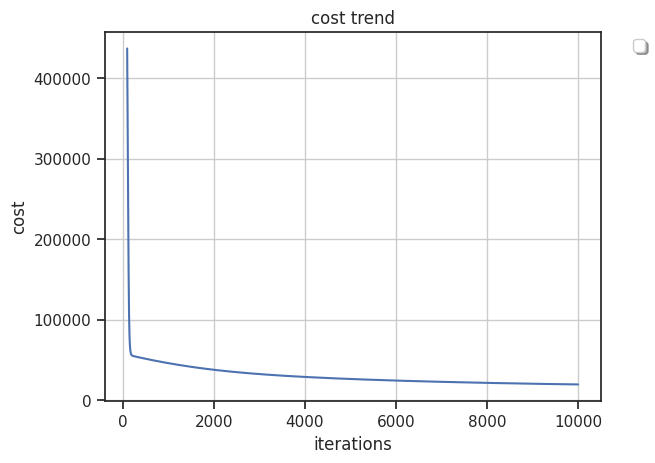

Evaluating the training results
precision is 0.5117117117117117
recall is 0.44800388302390487
f_score is 0.47774327122153204
accuracy is 0.381950334903039
[[8097 1223]
 [1565 1325]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      9320
           1       0.52      0.46      0.49      2890

    accuracy                           0.77     12210
   macro avg       0.68      0.66      0.67     12210
weighted avg       0.76      0.77      0.77     12210



In [73]:
start = timeit.default_timer()
lrg8= LogisticRegressionVG8(X_train3, X_valid3, y_train3, y_valid3,tolerance=0,learningRate=0.1e-7,maxIteration=10000)
lrg8.fit()
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3_pred = lrg8.predict(X_valid3)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3, y_valid3_pred)

print(cm)
print(classification_report(y_valid3, y_valid3_pred))

In [74]:
report_metrics=report_metrics.append(metrics_report(16,"Group_Implementation", "Logistic_Regression", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3_pred, thresh=0.5),ignore_index=True)

Model_Name:  Logistic_Regression
AUC:0.664
accuracy:0.772
f1_score:0.670
recall:0.458
precision:0.520
specificity:0.869
train_time:110.730
valid_time:0.010




#### 3.2B Logistic Regression - Logistic Regression implementation - Method 3 - Min Max Scaler

Solving using gradient descent


100%|██████████| 10000/10000 [02:58<00:00, 55.97it/s]


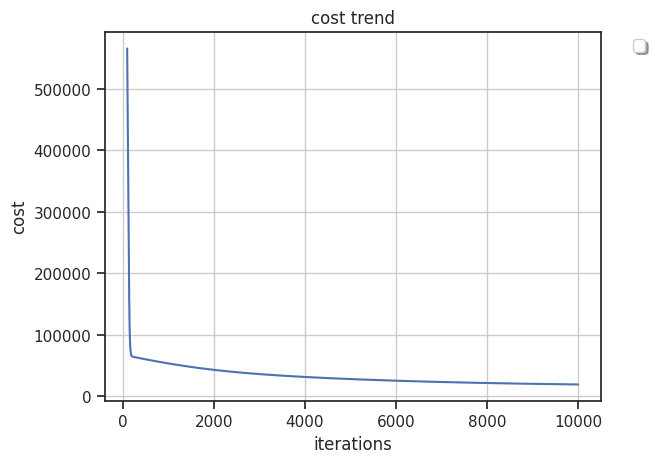

Evaluating the training results
precision is 0.3201462765957447
recall is 0.11685475063705861
f_score is 0.17121521913058937
accuracy is 0.3636549767469069
[[8622  698]
 [2531  359]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      9320
           1       0.34      0.12      0.18      2890

    accuracy                           0.74     12210
   macro avg       0.56      0.52      0.51     12210
weighted avg       0.67      0.74      0.69     12210

Model_Name:  Logistic_Regression
AUC:0.525
accuracy:0.736
f1_score:0.512
recall:0.124
precision:0.340
specificity:0.925
train_time:179.060
valid_time:0.000




In [75]:
start = timeit.default_timer()
lrg8b= LogisticRegressionVG8(X_train3b, X_valid3b, y_train3b, y_valid3b,tolerance=0,learningRate=0.1e-7,maxIteration=10000)
lrg8b.fit()
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3b_pred = lrg8b.predict(X_valid3b)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3b, y_valid3b_pred)

print(cm)
print(classification_report(y_valid3b, y_valid3b_pred))

report_metrics=report_metrics.append(metrics_report(17,"Group_Implementation", "Logistic_Regression", "Num_Columns",train_time, valid_time, y_actual=y_valid3b, y_pred=y_valid3b_pred, thresh=0.5),ignore_index=True)

#### 3.2B Logistic Regression - Logistic Regression implementation - Method 3 - PCA

Solving using gradient descent


100%|██████████| 10000/10000 [01:20<00:00, 124.59it/s]


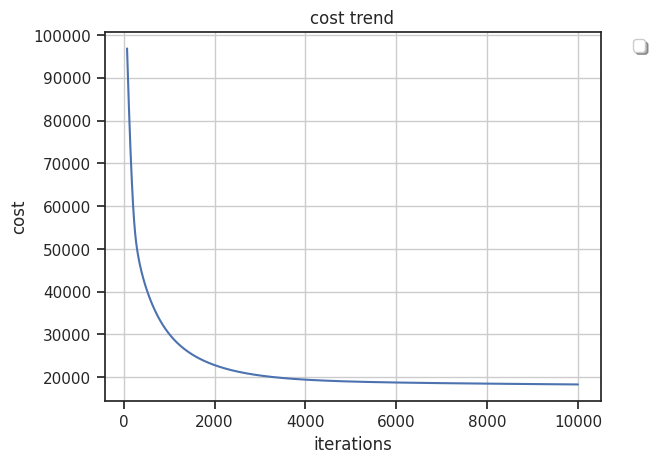

Evaluating the training results
precision is 0.4705137227304715
recall is 0.8113093071229219
f_score is 0.5956082134426083
accuracy is 0.3672233759396297
[[6646 2674]
 [ 507 2383]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      9320
           1       0.47      0.82      0.60      2890

    accuracy                           0.74     12210
   macro avg       0.70      0.77      0.70     12210
weighted avg       0.82      0.74      0.76     12210

Model_Name:  Logistic_Regression
AUC:0.769
accuracy:0.739
f1_score:0.703
recall:0.825
precision:0.471
specificity:0.713
train_time:80.570
valid_time:0.000




In [76]:
start = timeit.default_timer()
lrg8c= LogisticRegressionVG8(X_train3_pca, X_valid3_pca, y_train3, y_valid3,tolerance=0,learningRate=0.1e-6,maxIteration=10000)
lrg8c.fit()
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3c_pred = lrg8c.predict(X_valid3_pca)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3, y_valid3c_pred)

print(cm)
print(classification_report(y_valid3, y_valid3c_pred))
report_metrics=report_metrics.append(metrics_report(18,"Group_Implementation", "Logistic_Regression", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3c_pred, thresh=0.5),ignore_index=True)

#### 3.2C - Logistic Regression - Feature Importance implementation

In [77]:
X_valid3.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-loss', 'capital-gain',
       'hours-per-week', 'workclass', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [78]:
sample_idx = 0
x_valid3 = X_valid3.iloc[sample_idx]

x_train3=X_train3.sample(1).values[0]
x_train3


shap_values = np.zeros((1, len(x_valid3)))

# calculate the shaply value for feature j
for j in range(len(x_valid3)):
    M = 1000
    n_features = len(x_valid3)
    #print(n_features)
    marginal_contributions = []
    feature_idxs = list(range(n_features))
    #print(feature_idxs)
    feature_idxs.remove(j)
    #print(feature_idxs)
    

    for _ in range(M):
        x_train3 = X_train3.sample(1).values[0]
        x_idx = random.sample(feature_idxs, min(max(int(0.2*n_features), random.choice(feature_idxs)), int(0.8*n_features)))
        z_idx = [idx for idx in feature_idxs if idx not in x_idx]
    
        # construct two new instances
        x_plus_j = np.array([x_valid3[i] if i in x_idx + [j] else x_train3[i] for i in range(n_features)])
        x_minus_j = np.array([x_train3[i] if i in z_idx + [j] else x_valid3[i] for i in range(n_features)])
    
        # calculate marginal contribution( classifier_lr_3a )
        #marginal_contribution = classifier_lr_3a.predict_proba(x_plus_j.reshape(1, -1))[0][1] - classifier_lr_3a.predict_proba(x_minus_j.reshape(1, -1))[0][1]
        marginal_contribution = lrg8.predict_proba(x_plus_j.reshape(1, -1))[0] - lrg8.predict_proba(x_minus_j.reshape(1, -1))[0]
        marginal_contributions.append(marginal_contribution)
    
    phi_j_x = sum(marginal_contributions) / len(marginal_contributions)  # our shaply value
    print(f"Shaply value for feature j: {phi_j_x:.5}")
    shap_values[0][j] = phi_j_x
    



Shaply value for feature j: -0.075697
Shaply value for feature j: -0.022598
Shaply value for feature j: -0.10874
Shaply value for feature j: -0.024501
Shaply value for feature j: -0.017142
Shaply value for feature j: -0.014258
Shaply value for feature j: 3.4159e-05
Shaply value for feature j: 0.0090286
Shaply value for feature j: -0.040793
Shaply value for feature j: 0.025402
Shaply value for feature j: 0.0040807
Shaply value for feature j: 0.012927
Shaply value for feature j: -0.022137


In [79]:
def summary_plot(shap_values, feature_names):
    # calculate the mean absolute SHAP values for each feature
    mean_abs_shap = np.mean(np.abs(shap_values), axis=0)

    # sort the features by their mean absolute SHAP values in descending order
    sorted_idx = np.argsort(mean_abs_shap)[::-1]

    # create a horizontal bar chart of the mean absolute SHAP values for each feature
    fig, ax = plt.subplots()
    ax.barh(range(len(feature_names)), mean_abs_shap[sorted_idx])
    ax.set_yticks(range(len(feature_names)))
    ax.set_yticklabels(np.array(feature_names)[sorted_idx])
    ax.set_xlabel('Mean absolute SHAP value')
    ax.invert_yaxis()
    ax.set_title('Summary plot of SHAP values')
    plt.show()

def summary_plot_waterfall(shap_values, feature_names):
    # calculate the mean absolute SHAP values for each feature
    mean_shap = np.mean(shap_values, axis=0)

    # sort the features by their mean absolute SHAP values in descending order
    sorted_idx = np.argsort(mean_shap)[::-1]

    # create a horizontal bar chart of the mean absolute SHAP values for each feature
    fig, ax = plt.subplots()
    ax.barh(range(len(feature_names)), mean_shap[sorted_idx])
    ax.set_yticks(range(len(feature_names)))
    ax.set_yticklabels(np.array(feature_names)[sorted_idx])
    ax.set_xlabel('Mean SHAP value')
    ax.invert_yaxis()
    ax.set_title('Plot of SHAP values')
    plt.show()

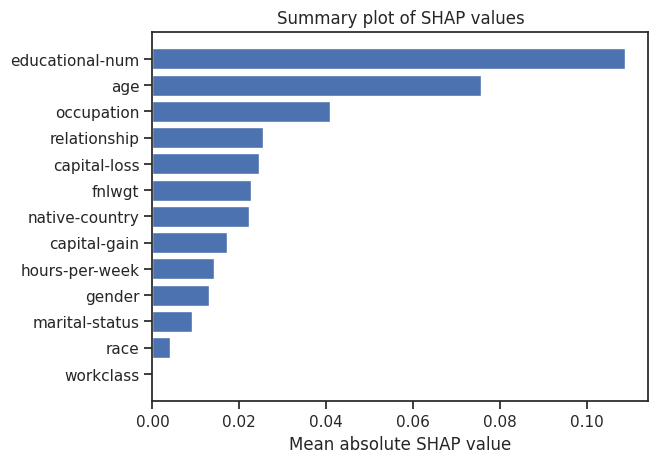

In [80]:
summary_plot(shap_values, X_valid3.columns)

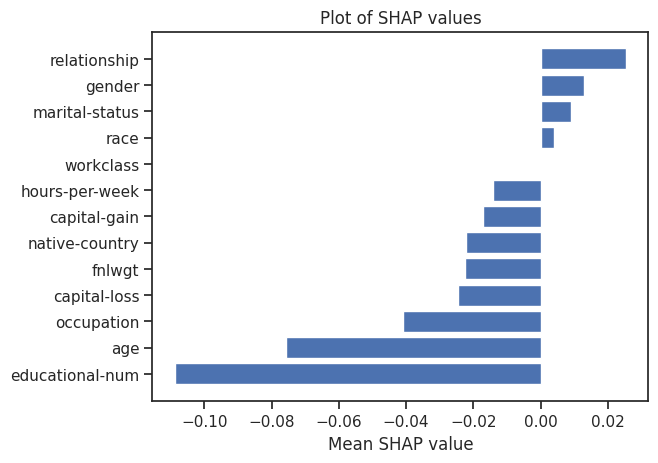

In [81]:
summary_plot_waterfall(shap_values, X_valid3.columns)

In [ ]:
#pip install shap

In [ ]:
#Importing SHAP values only to compare correct implementation of our version
"""
import shap

# explain the model's predictions using SHAP
explainer = shap.KernelExplainer(classifier_lr_3a.predict_proba, X_train3)
shap_values = explainer.shap_values(X_valid3.iloc[sample_idx,:])
for j in range(len(x_valid3)):
    print(f"Shaply value calulated from shap: {shap_values[1][j]:.5}")

k_test=[]

for j in range(len(x_valid3)):
  k_test.append(shap_values[1][j])

k_test


import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "2018", orientation = "h", measure = X_valid3.columns,
    x = k_test,
    connector = {"mode":"between", "line":{"width":4, "color":"rgb(0, 0, 0)", "dash":"solid"}}
))

fig.update_layout(title = "Feature importance")

fig.show()
"""

### 3.3 SVM

#### 3.3A SVM - Sk-learn implementation(Linear + Kernel) - Method 3

In [82]:
from sklearn.svm import SVC

# 3.3 SVM Linear - All columns Numerical
start = timeit.default_timer()
print('\n 3.3 SVM - All columns Numerical - Standard Scaler')
classifier_svm_3 = SVC(kernel = 'linear', random_state = 0)
classifier_svm_3.fit(X_train3, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3_pred = classifier_svm_3.predict(X_valid3)
cm = confusion_matrix(y_valid3, y_valid3_pred)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

print(cm)
print(classification_report(y_valid3, y_valid3_pred))
report_metrics=report_metrics.append(metrics_report(19,"SK_Learn", "Linear_SVM", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3_pred, thresh=0.5),ignore_index=True)
print('\n 3.3 SVM - All columns Numerical - Min Max Scaler')

start = timeit.default_timer()
classifier_svm_3b = SVC(kernel = 'linear', random_state = 0)
classifier_svm_3b.fit(X_train3b, y_train3b)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3b_pred = classifier_svm_3b.predict(X_valid3b)
cm = confusion_matrix(y_valid3b, y_valid3b_pred)
stop = timeit.default_timer()
valid_time=round((stop - start),2)


print(cm)
print(classification_report(y_valid3b, y_valid3b_pred))
report_metrics=report_metrics.append(metrics_report(20,"SK_Learn", "Linear_SVM", "Num_Columns",train_time, valid_time, y_actual=y_valid3b, y_pred=y_valid3b_pred, thresh=0.5),ignore_index=True)
print('\n 3.3 SVM - All columns Numerical - PCA')

start = timeit.default_timer()
classifier_svm_3c = SVC(kernel = 'linear', random_state = 0)
classifier_svm_3c.fit(X_train3_pca, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3c_pred = classifier_svm_3c.predict(X_valid3_pca)
cm = confusion_matrix(y_valid3, y_valid3c_pred)
stop = timeit.default_timer()
valid_time=round((stop - start),2)


print(cm)
print(classification_report(y_valid3, y_valid3c_pred))
report_metrics=report_metrics.append(metrics_report(21,"SK_Learn", "Linear_SVM", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3c_pred, thresh=0.5),ignore_index=True)

# 3.3 SVM Kernel - All columns Numerical

print('\n 3.3 Kernel SVM - All columns Numerical - Standard Scaler')
start = timeit.default_timer()
classifier_ksvm_3 = SVC(kernel = 'rbf', random_state = 0)
classifier_ksvm_3.fit(X_train3, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3_pred = classifier_ksvm_3.predict(X_valid3)
cm = confusion_matrix(y_valid3, y_valid3_pred)
stop = timeit.default_timer()
valid_time=round((stop - start),2)


print(cm)
print(classification_report(y_valid3, y_valid3_pred))
report_metrics=report_metrics.append(metrics_report(22,"SK_Learn", "Kernel_rbf_SVM", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3_pred, thresh=0.5),ignore_index=True)

print('\n 3.3 Kernel SVM - All columns Numerical - Min Max Scaler')
start = timeit.default_timer()
classifier_ksvm_3b = SVC(kernel = 'rbf', random_state = 0)
classifier_ksvm_3b.fit(X_train3b, y_train3b)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3b_pred = classifier_ksvm_3b.predict(X_valid3b)
cm = confusion_matrix(y_valid3b, y_valid3b_pred)
stop = timeit.default_timer()
valid_time=round((stop - start),2)


print(cm)
print(classification_report(y_valid3b, y_valid3b_pred))
report_metrics=report_metrics.append(metrics_report(23,"SK_Learn", "Kernel_rbf_SVM", "Num_Columns",train_time, valid_time, y_actual=y_valid3b, y_pred=y_valid3b_pred, thresh=0.5),ignore_index=True)
print('\n 3.3 Kernel SVM - All columns Numerical - PCA')

start = timeit.default_timer()
classifier_ksvm_3c = SVC(kernel = 'rbf', random_state = 0)
classifier_ksvm_3c.fit(X_train3_pca, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3c_pred = classifier_ksvm_3c.predict(X_valid3_pca)
cm = confusion_matrix(y_valid3, y_valid3c_pred)
stop = timeit.default_timer()
valid_time=round((stop - start),2)



print(cm)
print(classification_report(y_valid3, y_valid3c_pred))
report_metrics=report_metrics.append(metrics_report(24,"SK_Learn", "Kernel_rbf_SVM", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3c_pred, thresh=0.5),ignore_index=True)


 3.3 SVM - All columns Numerical - Standard Scaler
[[9133  187]
 [2046  844]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      9320
           1       0.82      0.29      0.43      2890

    accuracy                           0.82     12210
   macro avg       0.82      0.64      0.66     12210
weighted avg       0.82      0.82      0.78     12210

Model_Name:  Linear_SVM
AUC:0.636
accuracy:0.817
f1_score:0.661
recall:0.292
precision:0.819
specificity:0.980
train_time:68.470
valid_time:5.320



 3.3 SVM - All columns Numerical - Min Max Scaler
[[9161  159]
 [2070  820]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      9320
           1       0.84      0.28      0.42      2890

    accuracy                           0.82     12210
   macro avg       0.83      0.63      0.66     12210
weighted avg       0.82      0.82      0.78     12210

Model_Name:  Linear_SVM
AUC:0.633
accurac

#### 3.3B SVM - SVM implementation - Method 3 - Standard Scaler

In [83]:
class HardMarginSVMVG8: 
    def __init__(self, lRate = 0.00001, lamda = 0.001, n_iters=100):
        self.lRate = lRate
        self.lamda = lamda
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        samples, features = X.shape
        # Converting the 0 to -1 
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(features)
        self.b = 0
        for i in range(self.n_iters):
            for indx, x_i_value in enumerate(X):
                condition = y_[indx] * (np.dot(x_i_value, self.w) + self.b) >=1
                
                if condition:
                    self.w = self.w + self.lRate *(2 * self.lamda * self.w)
                else:
                    self.w = self.w - self.lRate*(2 * self.lamda * self.w - np.dot(x_i_value, y_[indx]))
                    self.b = self.b - self.lRate * (-y_[indx])
    
    def predict(self, X, Y):
        val = np.dot(X,self.w) + self.b
        y_hat_tst = np.sign(val)
        acc_value, prec_value, rec_value,f1_value = self.evaluate(Y,y_hat_tst)
        print("The Accuracy value is:", np.round(acc_value,2)*100, "%")
        print("The Precision value is:", np.round(prec_value,2))
        print("The Recall value is:", np.round(rec_value,2))
        print("The F1 Score is:",np.round(f1_value,2))
        return y_hat_tst
        
    def score(self, X, y):
        y_pred = self.predict(X)
        acc_value, prec_value, rec_value,f1_value = self.evaluate(y,y_pred)
        return acc_value
    
    def evaluate(self,y,y_hat):
        y =(y==1)
        y_hat = (y_hat == 1)
        acc_value = (y == y_hat).sum() / y.size
        prec_value = (y & y_hat).sum() / y_hat.sum()
        rec_value = (y & y_hat).sum() / y.sum()
        f1_value = 2 * prec_value * rec_value / (prec_value + rec_value)
        return acc_value, prec_value, rec_value,f1_value

In [84]:
start = timeit.default_timer()
svm = HardMarginSVMVG8() 
svm.fit(np.array(X_train3),np.array(y_train3))
print("Training metrics")

y_train3_pred=svm.predict(np.array(X_train3),np.array(y_train3))
stop = timeit.default_timer()
train_time=round((stop - start),2)

print("\n Validation metrics")
start = timeit.default_timer()
y_valid3_pred=svm.predict(np.array(X_valid3), np.array(y_valid3))
stop = timeit.default_timer()
valid_time=round((stop - start),2)

Training metrics
The Accuracy value is: 81.0 %
The Precision value is: 0.83
The Recall value is: 0.26
The F1 Score is: 0.4

 Validation metrics
The Accuracy value is: 81.0 %
The Precision value is: 0.86
The Recall value is: 0.26
The F1 Score is: 0.4


In [85]:
report_metrics=report_metrics.append(metrics_report(25,"Group_Implementation", "Hard_Margin_SVM", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3_pred, thresh=0.5),ignore_index=True)

Model_Name:  Hard_Margin_SVM
AUC:0.623
accuracy:0.815
f1_score:0.133
recall:0.258
precision:0.861
specificity:0.987
train_time:49.060
valid_time:0.000




In [86]:
print("\n After HyperParamter tuning metrics")
start = timeit.default_timer()
svm = HardMarginSVMVG8(lRate=0.0001, lamda=0.0001)
# Fitting the model on the training data
svm.fit(np.array(X_train3),np.array(y_train3))
y_train3_pred=svm.predict(np.array(X_train3),np.array(y_train3))
stop = timeit.default_timer()
train_time=round((stop - start),2)

# Evaluating the model on the validation data
print("\n Validation metrics")
start = timeit.default_timer()
y_valid3_pred=svm.predict(np.array(X_valid3), np.array(y_valid3))
stop = timeit.default_timer()
valid_time=round((stop - start),2)



 After HyperParamter tuning metrics
The Accuracy value is: 82.0 %
The Precision value is: 0.8
The Recall value is: 0.32
The F1 Score is: 0.45

 Validation metrics
The Accuracy value is: 82.0 %
The Precision value is: 0.83
The Recall value is: 0.31
The F1 Score is: 0.45


In [87]:
report_metrics=report_metrics.append(metrics_report(26,"Group_Implementation", "Hard_Margin_SVM", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3_pred, thresh=0.5),ignore_index=True)

Model_Name:  Hard_Margin_SVM
AUC:0.647
accuracy:0.822
f1_score:0.152
recall:0.313
precision:0.829
specificity:0.980
train_time:47.530
valid_time:0.000




In [88]:
# Create SMOTE object
smote = SMOTE()

# Fit SMOTE on X_train and y_train
X_train3_smo_resampled, y_train3_smo_resampled = smote.fit_resample(X_train3, y_train3)

# Check the class distribution after resampling
print("After SMOTE: ", np.bincount(y_train3_smo_resampled))

svm = HardMarginSVMVG8(lRate=0.00001, lamda=0.001)
# Fitting the model on the training data
svm.fit(np.array(X_train3_smo_resampled),np.array(y_train3_smo_resampled))
print("\n After HyperParamter tuning Training metrics")
y_train3_pred=svm.predict(np.array(X_train3_smo_resampled),np.array(y_train3_smo_resampled))
# Evaluating the model on the validation data
print("\n After HyperParamter tuning Valid metrics")
y_valid3_pred=svm.predict(np.array(X_valid3),np.array(y_valid3))


# Define undersampling object
rus = RandomUnderSampler()

# Fit and transform the training data
X_train3_rus_resampled, y_train3_rus_resampled = rus.fit_resample(X_train3, y_train3)
print("\n After Random Under Sampler: ", np.bincount(y_train3_rus_resampled))

# Train the model on the undersampled data
svm = HardMarginSVMVG8()
svm.fit(np.array(X_train3_rus_resampled), np.array(y_train3_rus_resampled))

print("\n After HyperParamter tuning Training metrics")
y_train3_pred=svm.predict(np.array(X_train3_rus_resampled),np.array(y_train3_rus_resampled))
# Evaluating the model on the validation data
print("\n After HyperParamter tuning Valid metrics")
y_valid3_pred=svm.predict(np.array(X_valid3),np.array(y_valid3))

After SMOTE:  [25948 25948]

 After HyperParamter tuning Training metrics
The Accuracy value is: 51.0 %
The Precision value is: 0.51
The Recall value is: 1.0
The F1 Score is: 0.67

 After HyperParamter tuning Valid metrics
The Accuracy value is: 26.0 %
The Precision value is: 0.24
The Recall value is: 1.0
The F1 Score is: 0.39

 After Random Under Sampler:  [8241 8241]

 After HyperParamter tuning Training metrics
The Accuracy value is: 51.0 %
The Precision value is: 0.5
The Recall value is: 1.0
The F1 Score is: 0.67

 After HyperParamter tuning Valid metrics
The Accuracy value is: 25.0 %
The Precision value is: 0.24
The Recall value is: 1.0
The F1 Score is: 0.39


#### 3.3B SVM - SVM implementation - Method 3 - Min Max Scaler

In [89]:
start = timeit.default_timer()
svm = HardMarginSVMVG8() 
svm.fit(np.array(X_train3b),np.array(y_train3b))
print("Training metrics")
y_train3b_pred=svm.predict(np.array(X_train3b),np.array(y_train3b))
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

print("\n Validation metrics")
y_valid3b_pred=svm.predict(np.array(X_valid3b), np.array(y_valid3b))

Training metrics
The Accuracy value is: 76.0 %
The Precision value is: nan
The Recall value is: 0.0
The F1 Score is: nan
Time:  49.82 seconds

 Validation metrics
The Accuracy value is: 76.0 %
The Precision value is: nan
The Recall value is: 0.0
The F1 Score is: nan


In [90]:
# Create SMOTE object
smote = SMOTE()

# Fit SMOTE on X_train and y_train
X_train3b_smo_resampled, y_train3b_smo_resampled = smote.fit_resample(X_train3b, y_train3b)

# Check the class distribution after resampling
print("After SMOTE: ", np.bincount(y_train3b_smo_resampled))

svm = HardMarginSVMVG8(lRate=0.00001, lamda=0.001)
# Fitting the model on the training data
svm.fit(np.array(X_train3b_smo_resampled),np.array(y_train3b_smo_resampled))
print("\n After HyperParamter tuning Training metrics")
y_train3b_pred=svm.predict(np.array(X_train3b_smo_resampled),np.array(y_train3b_smo_resampled))
# Evaluating the model on the validation data
print("\n After HyperParamter tuning Valid metrics")
y_valid3b_pred=svm.predict(np.array(X_valid3b),np.array(y_valid3b))


# Define undersampling object
rus = RandomUnderSampler()

# Fit and transform the training data
X_train3b_rus_resampled, y_train3b_rus_resampled = rus.fit_resample(X_train3b, y_train3b)
print("\n After Random Under Sampler: ", np.bincount(y_train3b_rus_resampled))

# Train the model on the undersampled data
svm = HardMarginSVMVG8()
svm.fit(np.array(X_train3b_rus_resampled), np.array(y_train3b_rus_resampled))

print("\n After HyperParamter tuning Training metrics")
y_train3b_pred=svm.predict(np.array(X_train3b_rus_resampled),np.array(y_train3b_rus_resampled))
# Evaluating the model on the validation data
print("\n After HyperParamter tuning Valid metrics")
y_valid3b_pred=svm.predict(np.array(X_valid3b),np.array(y_valid3b))

After SMOTE:  [25948 25948]

 After HyperParamter tuning Training metrics
The Accuracy value is: 50.0 %
The Precision value is: 0.5
The Recall value is: 1.0
The F1 Score is: 0.67

 After HyperParamter tuning Valid metrics
The Accuracy value is: 24.0 %
The Precision value is: 0.24
The Recall value is: 1.0
The F1 Score is: 0.38

 After Random Under Sampler:  [8241 8241]

 After HyperParamter tuning Training metrics
The Accuracy value is: 50.0 %
The Precision value is: 0.5
The Recall value is: 1.0
The F1 Score is: 0.67

 After HyperParamter tuning Valid metrics
The Accuracy value is: 24.0 %
The Precision value is: 0.24
The Recall value is: 1.0
The F1 Score is: 0.38


#### 3.3C SVM - SVM implementation - Method 3 - PCA

In [91]:
start = timeit.default_timer()
svm = HardMarginSVMVG8() 
svm.fit(X_train3_pca,np.array(y_train3))
print("Training metrics")
svm.predict(X_train3_pca,np.array(y_train3))
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
print("\n Validation metrics")
svm.predict(np.array(X_valid3_pca), np.array(y_valid3))
stop = timeit.default_timer()
valid_time=round((stop - start),2)

report_metrics=report_metrics.append(metrics_report(27,"Group_Implementation", "Hard_Margin_SVM", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3c_pred, thresh=0.5),ignore_index=True)

Training metrics
The Accuracy value is: 81.0 %
The Precision value is: 0.8
The Recall value is: 0.3
The F1 Score is: 0.44

 Validation metrics
The Accuracy value is: 82.0 %
The Precision value is: 0.83
The Recall value is: 0.3
The F1 Score is: 0.44
Model_Name:  Hard_Margin_SVM
AUC:0.728
accuracy:0.847
f1_score:0.757
recall:0.501
precision:0.772
specificity:0.954
train_time:49.560
valid_time:0.010




In [92]:
# Create SMOTE object
smote = SMOTE()

# Fit SMOTE on X_train and y_train
X_train3c_smo_resampled, y_train3c_smo_resampled = smote.fit_resample(X_train3_pca, y_train3)

# Check the class distribution after resampling
print("After SMOTE: ", np.bincount(y_train3c_smo_resampled))
start = timeit.default_timer()
svm = HardMarginSVMVG8(lRate=0.00001, lamda=0.001)
# Fitting the model on the training data
svm.fit(np.array(X_train3c_smo_resampled),np.array(y_train3c_smo_resampled))
print("\n After HyperParamter tuning Training metrics")
y_train3c_pred=svm.predict(np.array(X_train3c_smo_resampled),np.array(y_train3c_smo_resampled))
# Evaluating the model on the validation data
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
print("\n After HyperParamter tuning Valid metrics")
y_valid3c_pred=svm.predict(np.array(X_valid3_pca),np.array(y_valid3))
stop = timeit.default_timer()
valid_time=round((stop - start),2)

report_metrics=report_metrics.append(metrics_report(28,"Group_Implementation", "Hard_Margin_SVM", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3c_pred, thresh=0.5),ignore_index=True)

# Define undersampling object
rus = RandomUnderSampler()
start = timeit.default_timer()
# Fit and transform the training data
X_train3c_rus_resampled, y_train3c_rus_resampled = rus.fit_resample(X_train3_pca, y_train3)
print("\n After Random Under Sampler: ", np.bincount(y_train3c_rus_resampled))
# Train the model on the undersampled data
svm = HardMarginSVMVG8()
svm.fit(np.array(X_train3c_rus_resampled), np.array(y_train3c_rus_resampled))
print("\n After HyperParamter tuning Training metrics")
y_train3c_pred=svm.predict(np.array(X_train3c_rus_resampled),np.array(y_train3c_rus_resampled))
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
# Evaluating the model on the validation data
print("\n After HyperParamter tuning Valid metrics")
y_valid3c_pred=svm.predict(np.array(X_valid3_pca),np.array(y_valid3))
stop = timeit.default_timer()
valid_time=round((stop - start),2)

report_metrics=report_metrics.append(metrics_report(29,"Group_Implementation", "Hard_Margin_SVM", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3c_pred, thresh=0.5),ignore_index=True)


After SMOTE:  [25948 25948]

 After HyperParamter tuning Training metrics
The Accuracy value is: 77.0 %
The Precision value is: 0.75
The Recall value is: 0.81
The F1 Score is: 0.78

 After HyperParamter tuning Valid metrics
The Accuracy value is: 75.0 %
The Precision value is: 0.48
The Recall value is: 0.82
The F1 Score is: 0.61
Model_Name:  Hard_Margin_SVM
AUC:0.774
accuracy:0.751
f1_score:0.203
recall:0.816
precision:0.485
specificity:0.731
train_time:79.310
valid_time:0.010



 After Random Under Sampler:  [8241 8241]

 After HyperParamter tuning Training metrics
The Accuracy value is: 76.0 %
The Precision value is: 0.74
The Recall value is: 0.8
The F1 Score is: 0.77

 After HyperParamter tuning Valid metrics
The Accuracy value is: 75.0 %
The Precision value is: 0.48
The Recall value is: 0.82
The F1 Score is: 0.6
Model_Name:  Hard_Margin_SVM
AUC:0.771
accuracy:0.748
f1_score:0.202
recall:0.817
precision:0.480
specificity:0.726
train_time:26.100
valid_time:0.010




### 3.4 K-Nearest Neighbors

#### 3.4A KNN - Sk-learn implementation - Method 3

In [93]:
from sklearn.neighbors import KNeighborsClassifier

# 3.4 KNN - All columns Categorical

print('\n 3.4 KNN - All columns Categorical')
classifier_knn_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn_2.fit(X_train2, y_train2)

y_valid2_pred = classifier_knn_2.predict(X_valid2)
cm = confusion_matrix(y_valid2, y_valid2_pred)

print(cm)
print(classification_report(y_valid2, y_valid2_pred))

# 3.4 KNN - All columns Numerical

print('\n 3.4 KNN - All columns Numerical - Standard Scaler')
classifier_knn_3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn_3.fit(X_train3, y_train3)

y_valid3_pred = classifier_knn_3.predict(X_valid3)
cm = confusion_matrix(y_valid3, y_valid3_pred)

print(cm)
print(classification_report(y_valid3, y_valid3_pred))

print('\n 3.4 KNN - All columns Numerical - Min Max Scaler')
classifier_knn_3b = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn_3b.fit(X_train3b, y_train3b)

y_valid3b_pred = classifier_knn_3b.predict(X_valid3b)
cm = confusion_matrix(y_valid3b, y_valid3b_pred)

print(cm)
print(classification_report(y_valid3b, y_valid3b_pred))

print('\n 3.4 KNN - All columns Numerical - PCA')
classifier_knn_3c = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn_3c.fit(X_train3_pca, y_train3)

y_valid3c_pred = classifier_knn_3c.predict(X_valid3_pca)
cm = confusion_matrix(y_valid3, y_valid3c_pred)

print(cm)
print(classification_report(y_valid3, y_valid3c_pred))


 3.4 KNN - All columns Categorical
[[8446  874]
 [1276 1614]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9320
           1       0.65      0.56      0.60      2890

    accuracy                           0.82     12210
   macro avg       0.76      0.73      0.74     12210
weighted avg       0.82      0.82      0.82     12210


 3.4 KNN - All columns Numerical - Standard Scaler
[[8510  810]
 [1242 1648]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9320
           1       0.67      0.57      0.62      2890

    accuracy                           0.83     12210
   macro avg       0.77      0.74      0.75     12210
weighted avg       0.82      0.83      0.83     12210


 3.4 KNN - All columns Numerical - Min Max Scaler
[[8513  807]
 [1307 1583]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9320
           1     

In [94]:
import numpy as np

def initialize_clusters(X, K):
    """
    Randomly initialize the centroids of K clusters.
    """
    idx = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[idx, :]
    return centroids

def assign_points_to_clusters(X, centroids):
    """
    Assign each point in X to the closest centroid.
    """
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        distances[:, i] = np.sum((X - centroids[i, :])**2, axis=1)
    cluster_assignment = np.argmin(distances, axis=1)
    return cluster_assignment

def update_centroids(X, cluster_assignment, K):
    """
    Update the centroids of each cluster based on the mean of the points assigned to it.
    """
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        cluster_i = X[cluster_assignment == i, :]
        centroids[i, :] = np.mean(cluster_i, axis=0)
    return centroids

def kmeans(X, K):
    """
    K-Means clustering algorithm.
    """
    centroids = initialize_clusters(X, K)
    print("done")

    while True:
        cluster_assignment = assign_points_to_clusters(X, centroids)
        new_centroids = update_centroids(X, cluster_assignment, K)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return cluster_assignment, centroids


# Run K-Means algorithm
K = 2

#### 3.4A KNN - KNN implementation - Method 3 - Categorical

In [95]:
y_valid2_pred, centroids = kmeans(X_valid2.to_numpy(), K)

cm = confusion_matrix(y_valid2 , y_valid2_pred)
print(cm)
print(classification_report(y_valid2, y_valid2_pred))

done
[[5879 3441]
 [1434 1456]]
              precision    recall  f1-score   support

           0       0.80      0.63      0.71      9320
           1       0.30      0.50      0.37      2890

    accuracy                           0.60     12210
   macro avg       0.55      0.57      0.54     12210
weighted avg       0.68      0.60      0.63     12210



#### 3.4A KNN - KNN implementation - Method 3 - Standard Scaler


In [96]:
y_valid3_pred, centroids = kmeans(X_valid3.to_numpy(), K)

cm = confusion_matrix(y_valid3 , y_valid3_pred)
print(cm)
print(classification_report(y_valid3, y_valid3_pred))

done
[[5864 3456]
 [1434 1456]]
              precision    recall  f1-score   support

           0       0.80      0.63      0.71      9320
           1       0.30      0.50      0.37      2890

    accuracy                           0.60     12210
   macro avg       0.55      0.57      0.54     12210
weighted avg       0.68      0.60      0.63     12210



#### 3.4B KNN - KNN implementation - Method 3 - Min Max Scaler

In [97]:
y_valid3b_pred, centroids = kmeans(X_valid3b.to_numpy(), K)

cm = confusion_matrix(y_valid3b , y_valid3b_pred)
print(cm)
print(classification_report(y_valid3b, y_valid3b_pred))

done
[[4663 4657]
 [1496 1394]]
              precision    recall  f1-score   support

           0       0.76      0.50      0.60      9320
           1       0.23      0.48      0.31      2890

    accuracy                           0.50     12210
   macro avg       0.49      0.49      0.46     12210
weighted avg       0.63      0.50      0.53     12210



#### 3.4C KNN - KNN implementation - Method 3 - PCA

In [98]:
y_valid3c_pred, centroids = kmeans(X_valid3_pca, K)

cm = confusion_matrix(y_valid3 , y_valid3c_pred)
print(cm)
print(classification_report(y_valid3, y_valid3c_pred))

done
[[4664 4656]
 [1495 1395]]
              precision    recall  f1-score   support

           0       0.76      0.50      0.60      9320
           1       0.23      0.48      0.31      2890

    accuracy                           0.50     12210
   macro avg       0.49      0.49      0.46     12210
weighted avg       0.63      0.50      0.53     12210



In [99]:
y_valid3c_pred, centroids = kmeans(X_valid3_pca, K)

cm = confusion_matrix(y_valid3 , y_valid3c_pred)
print(cm)
print(classification_report(y_valid3, y_valid3c_pred))

done
[[8824  496]
 [2710  180]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      9320
           1       0.27      0.06      0.10      2890

    accuracy                           0.74     12210
   macro avg       0.52      0.50      0.47     12210
weighted avg       0.65      0.74      0.67     12210



### 3.5 Decision Tree

#### 3.5A Decision tree - Sk-learn implementation - Method 3

In [100]:
from sklearn.tree import DecisionTreeClassifier

# 3.6 Decision Tree - All columns Categorical
start = timeit.default_timer()
print('\n 3.5 Decision Tree - All columns Categorical')
classifier_dt_2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt_2.fit(X_train2, y_train2)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid2_pred = classifier_dt_2.predict(X_valid2)
stop = timeit.default_timer()
valid_time=round((stop - start),2)
cm = confusion_matrix(y_valid2, y_valid2_pred)

print(cm)
print(classification_report(y_valid2, y_valid2_pred))

report_metrics=report_metrics.append(metrics_report(30,"SK_Learn", "Decision_Tree", "Num_Columns",train_time, valid_time, y_actual=y_valid2, y_pred=y_valid2_pred, thresh=0.5),ignore_index=True)
# 3.6 Decision Tree - All columns Numerical

print('\n 3.5 Decision Tree - All columns Numerical - Standard Scaler')
start = timeit.default_timer()
classifier_dt_3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt_3.fit(X_train3, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3_pred = classifier_dt_3.predict(X_valid3)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3, y_valid3_pred)
print(cm)
print(classification_report(y_valid3, y_valid3_pred))
report_metrics=report_metrics.append(metrics_report(31,"SK_Learn", "Decision_Tree", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3_pred, thresh=0.5),ignore_index=True)

print('\n 3.5 Decision Tree - All columns Numerical - Min Max Scaler')
start = timeit.default_timer()
classifier_dt_3b = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt_3b.fit(X_train3b, y_train3b)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3b_pred = classifier_dt_3b.predict(X_valid3b)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3b, y_valid3b_pred)
print(cm)
print(classification_report(y_valid3b, y_valid3b_pred))
report_metrics=report_metrics.append(metrics_report(32,"SK_Learn", "Decision_Tree", "Num_Columns",train_time, valid_time, y_actual=y_valid3b, y_pred=y_valid3b_pred, thresh=0.5),ignore_index=True)

print('\n 3.5 Decision Tree - All columns Numerical - PCA')
start = timeit.default_timer()
classifier_dt_3c = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt_3c.fit(X_train3_pca, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3c_pred = classifier_dt_3c.predict(X_valid3_pca)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3, y_valid3c_pred)
print(cm)
print(classification_report(y_valid3, y_valid3c_pred))
report_metrics=report_metrics.append(metrics_report(33,"SK_Learn", "Decision_Tree", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3c_pred, thresh=0.5),ignore_index=True)


 3.5 Decision Tree - All columns Categorical
[[8308 1012]
 [1321 1569]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      9320
           1       0.61      0.54      0.57      2890

    accuracy                           0.81     12210
   macro avg       0.74      0.72      0.73     12210
weighted avg       0.80      0.81      0.81     12210

Model_Name:  Decision_Tree
AUC:0.717
accuracy:0.809
f1_score:0.725
recall:0.543
precision:0.608
specificity:0.891
train_time:0.100
valid_time:0.010



 3.5 Decision Tree - All columns Numerical - Standard Scaler
[[8131 1189]
 [1067 1823]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      9320
           1       0.61      0.63      0.62      2890

    accuracy                           0.82     12210
   macro avg       0.74      0.75      0.75     12210
weighted avg       0.82      0.82      0.82     12210

Model_Name:  Decision_Tree
AUC:0.7

In [101]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value
        
class DecisionTreeClassifierVG8():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self,X,y):
      predictions=[]
      for i in range(len(X)):
        node=self.root
        while node.value is None:
          if X[i][node.feature_index]<=node.threshold:
            node=node.left
          else:
            node=node.right
        predictions.append(node.value)
      
      tp,fp,fn,tn=0,0,0,0
      for i in range(len(y)):
        if y[i]==1 and predictions[i]==1:
          tp+=1
        elif y[i]==0 and predictions[i]==1:
          fp+=1
        elif y[i]==1 and predictions[i]==0:
          fn+=1
        else:
          tn+=1


      accuracy=(tp+tn)/(tp+fp+tn+fn)
      if tp + fp == 0:
        precision = 0
      else:
        precision = tp / (tp + fp)
      #precision = tp / (tp + fp)
      if tp+fn==0:
        recall=0
      else:
        recall = tp / (tp + fn)

      if precision+recall==0:
        f1=0
      else:
        f1 = 2 * precision * recall / (precision + recall)
      
      print("Accuracy: {:.2f}%".format(accuracy*100))
      print("Precision: {:.2f}%".format(precision*100))
      print("Recall: {:.2f}%".format(recall*100))
      print("F1 Score: {:.2f}%".format(f1*100))
      return predictions, accuracy, precision, recall, f1
  
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

#### 3.5B Decision Tree - Decision Tree implementation - Method 2 - Categorical


In [102]:
# 3.5 Decision Tree - All columns Categorical
print('\n 3.5 Decision Tree - All columns Categorical')

start = timeit.default_timer()
classifier_dtVG8_2 = DecisionTreeClassifierVG8(min_samples_split=3, max_depth=3)
classifier_dtVG8_2.fit(X_train2, y_train2.to_frame())
classifier_dtVG8_2.print_tree()
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid2_pred = classifier_dtVG8_2.predict(X_valid2.to_numpy(),y_valid2.to_numpy().reshape(-1,1))
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid2, y_valid2_pred[0])

print(cm)
print(classification_report(y_valid2, y_valid2_pred[0]))


 3.5 Decision Tree - All columns Categorical
X_5 <= 0.0 ? 0.06009548799519937
 left:X_2 <= 11.0 ? 0.06219321743490902
  left:X_2 <= 7.0 ? 0.017250822295092894
    left:X_9 <= 0.0 ? 0.010545702029809284
        left:0.0
        right:0.0
    right:X_9 <= 0.0 ? 0.015614085101855024
        left:0.0
        right:1.0
  right:X_10 <= 2.0 ? 0.021677469584947595
    left:X_2 <= 13.0 ? 0.028428380884366056
        left:0.0
        right:1.0
    right:X_9 <= 0.0 ? 0.01563484409467758
        left:1.0
        right:1.0
 right:X_5 <= 4.0 ? 0.02417706037636963
  left:X_9 <= 0.0 ? 0.010289318691697844
    left:X_2 <= 12.0 ? 0.004705476228331715
        left:0.0
        right:0.0
    right:X_2 <= 9.0 ? 0.06880688811805913
        left:0.0
        right:1.0
  right:X_2 <= 9.0 ? 0.05889051874233364
    left:X_4 <= 4.0 ? 0.018213258494087614
        left:0.0
        right:0.0
    right:X_2 <= 12.0 ? 0.020537955673652186
        left:1.0
        right:1.0
Accuracy: 83.48%
Precision: 71.51%
Recall: 50.

In [103]:
report_metrics=report_metrics.append(metrics_report(34,"Group_Implementation", "Decision_Tree", "Cat_Columns",train_time, valid_time, y_actual=y_valid2.to_numpy(), y_pred=pd.to_numeric(y_valid2_pred[0], downcast='float'), thresh=0.5),ignore_index=True)

Model_Name:  Decision_Tree
AUC:0.720
accuracy:0.835
f1_score:0.743
recall:0.502
precision:0.715
specificity:0.938
train_time:45.160
valid_time:0.090




#### 3.5B Decision Tree - Decision Tree implementation - Method 3 - Standard Scaler - 2000 rows sample


In [104]:
# 3.5 Decision Tree - All columns Numerical - Standard Scaler
print('\n 3.5 Decision Tree - All columns Numerical - Standard Scaler')

start = timeit.default_timer()
train_df3a_dtVG8 = pd.concat([X_train3, y_train3], axis=1)
train_df3a_dtVG8.head()

train_df3a_dtVG8_sample=train_df3a_dtVG8.sample(2000)
X_train3a_sample = train_df3a_dtVG8_sample.iloc[:, :-1].values
y_train3a_sample = train_df3a_dtVG8_sample.iloc[:, -1].values.reshape(-1,1)

valid_df3a_dtVG8 = pd.concat([X_valid3, y_valid3], axis=1)
valid_df3a_dtVG8.head()

valid_df3a_dtVG8_sample=valid_df3a_dtVG8.sample(2000)
X_valid3a_sample = valid_df3a_dtVG8_sample.iloc[:, :-1].values
y_valid3a_sample = valid_df3a_dtVG8_sample.iloc[:, -1].values.reshape(-1,1)

test_df3a_dtVG8 = pd.concat([X_test3, y_test3], axis=1)
test_df3a_dtVG8.head()

test_df3a_dtVG8_sample=test_df3a_dtVG8.sample(2000)
X_test3a_sample = test_df3a_dtVG8_sample.iloc[:, :-1].values
y_test3a_sample = test_df3a_dtVG8_sample.iloc[:, -1].values.reshape(-1,1)

classifier_dtVG8_3a = DecisionTreeClassifierVG8(min_samples_split=3, max_depth=3)
classifier_dtVG8_3a.fit(X_train3a_sample, y_train3a_sample)
classifier_dtVG8_3a.print_tree()
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3a_sample_pred = classifier_dtVG8_3a.predict(X_valid3a_sample, y_valid3a_sample)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3a_sample, y_valid3a_sample_pred[0])

print(cm)
print(classification_report(y_valid3a_sample, y_valid3a_sample_pred[0]))



 3.5 Decision Tree - All columns Numerical - Standard Scaler
X_4 <= 0.5301582236541181 ? 0.060210424242424176
 left:X_9 <= 0.0 ? 0.0508653273701834
  left:X_2 <= -0.4183256008322713 ? 0.05127023448240775
    left:X_0 <= 0.020242434117754726 ? 0.01333892357527322
        left:0.0
        right:0.0
    right:X_3 <= 3.8980513652027997 ? 0.02819364166579258
        left:1.0
        right:1.0
  right:X_9 <= 4.0 ? 0.02009951031144605
    left:X_2 <= 1.5231054094916847 ? 0.007972118084979565
        left:0.0
        right:1.0
    right:X_2 <= -0.0300393987674801 ? 0.09369148717009645
        left:0.0
        right:1.0
 right:X_2 <= -2.3597566111562274 ? 0.008414861402282842
  left:0.0
  right:X_9 <= 3.0 ? 0.0046788384275034955
    left:1.0
    right:X_6 <= 2.0 ? 0.1496598639455783
        left:0.0
        right:1.0
Accuracy: 81.45%
Precision: 61.07%
Recall: 69.09%
F1 Score: 64.83%
[[1287  218]
 [ 153  342]]
              precision    recall  f1-score   support

           0       0.89      0

In [105]:
report_metrics=report_metrics.append(metrics_report(35,"Group_Implementation", "Decision_Tree", "Num_Columns",train_time, valid_time, y_actual=pd.Series(np.array(y_valid3a_sample).flatten()), y_pred=pd.to_numeric(y_valid3a_sample_pred[0], downcast='float'), thresh=0.5),ignore_index=True)


Model_Name:  Decision_Tree
AUC:0.773
accuracy:0.815
f1_score:0.761
recall:0.691
precision:0.611
specificity:0.855
train_time:14.070
valid_time:0.030




#### 3.5B Decision Tree - Decision Tree implementation - Method 3 - Standard Scaler - Complete Dataset


In [106]:
# 3.5 Decision Tree - All columns Numerical - Standard Scaler - Complete Dataset
print('\n 3.5 Decision Tree - All columns Numerical - Standard Scaler')
classifier_dtVG8_3a = DecisionTreeClassifierVG8(min_samples_split=3, max_depth=3)
classifier_dtVG8_3a.fit(X_train3.to_numpy(), y_train3.to_numpy().reshape(-1,1))
classifier_dtVG8_3a.print_tree()


y_valid3a_pred = classifier_dtVG8_3a.predict(X_valid3.to_numpy(),y_valid3.to_numpy().reshape(-1,1))

cm = confusion_matrix(y_valid3, y_valid3a_pred[0])

print(cm)
print(classification_report(y_valid3, y_valid3a_pred[0]))


 3.5 Decision Tree - All columns Numerical - Standard Scaler
X_9 <= 0.0 ? 0.06009548799519937
 left:X_2 <= 0.7465330053621023 ? 0.06219321743490902
  left:X_4 <= 0.5301582236541181 ? 0.043334066225099166
    left:X_2 <= -0.8066118028970626 ? 0.015551449788977878
        left:0.0
        right:0.0
    right:X_0 <= 1.9911159349512038 ? 0.004829758844770712
        left:1.0
        right:1.0
  right:X_4 <= 0.5301582236541181 ? 0.02812366111941833
    left:X_5 <= -0.8441414407182607 ? 0.023116053926770963
        left:0.0
        right:1.0
    right:X_0 <= 3.0130503427907698 ? 0.0005909894490683781
        left:1.0
        right:1.0
 right:X_4 <= 0.7776295677391389 ? 0.03318961442824206
  left:X_9 <= 4.0 ? 0.021106966800830212
    left:X_2 <= 1.1348192074268937 ? 0.004729165595639809
        left:0.0
        right:0.0
    right:X_2 <= -0.0300393987674801 ? 0.05510163204923402
        left:0.0
        right:1.0
  right:X_0 <= -1.3666685479502279 ? 0.013542224188793285
    left:X_1 <= -0.44

#### 3.5B Decision Tree- Decision Tree implementation - Method 3 - Min Max Scaler

In [107]:
# 3.5 Decision Tree - All columns Numerical - Min Max Scaler
print('\n 3.5 Decision Tree - All columns Numerical - Min Max Scaler')
start = timeit.default_timer()
train_df3b_dtVG8 = pd.concat([X_train3b, y_train3b], axis=1)
train_df3b_dtVG8.head()

train_df3b_dtVG8_sample=train_df3b_dtVG8.sample(2000)
X_train3b_sample = train_df3b_dtVG8_sample.iloc[:, :-1].values
y_train3b_sample = train_df3b_dtVG8_sample.iloc[:, -1].values.reshape(-1,1)


valid_df3b_dtVG8 = pd.concat([X_valid3b, y_valid3b], axis=1)
valid_df3b_dtVG8.head()

valid_df3b_dtVG8_sample=valid_df3b_dtVG8.sample(2000)
X_valid3b_sample = valid_df3b_dtVG8_sample.iloc[:, :-1].values
y_valid3b_sample = valid_df3b_dtVG8_sample.iloc[:, -1].values.reshape(-1,1)

test_df3b_dtVG8 = pd.concat([X_test3b, y_test3b], axis=1)
test_df3b_dtVG8.head()

test_df3b_dtVG8_sample=test_df3b_dtVG8.sample(2000)
X_test3b_sample = test_df3b_dtVG8_sample.iloc[:, :-1].values
y_test3b_sample = test_df3b_dtVG8_sample.iloc[:, -1].values.reshape(-1,1)

classifier_dtVG8_3b = DecisionTreeClassifierVG8(min_samples_split=3, max_depth=3)
classifier_dtVG8_3b.fit(X_train3b_sample, y_train3b_sample)
classifier_dtVG8_3b.print_tree()
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3b_sample_pred = classifier_dtVG8_3b.predict(X_valid3b_sample, y_valid3b_sample)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3b_sample, y_valid3b_sample_pred[0])

print(cm)
print(classification_report(y_valid3b_sample, y_valid3b_sample_pred[0]))




 3.5 Decision Tree - All columns Numerical - Min Max Scaler
X_9 <= 0.0 ? 0.05864415854690508
 left:X_2 <= 0.7333333333333334 ? 0.05867996341437637
  left:X_4 <= 0.05013050130501305 ? 0.0438975490092115
    left:X_2 <= 0.33333333333333337 ? 0.013875073484946265
        left:0.0
        right:0.0
    right:1.0
  right:X_5 <= 0.32653061224489793 ? 0.05734104729388545
    left:0.0
    right:X_4 <= 0.05013050130501305 ? 0.023868440023136483
        left:1.0
        right:1.0
 right:X_4 <= 0.06849068490684906 ? 0.0392184622868684
  left:X_9 <= 4.0 ? 0.017162179822972162
    left:X_3 <= 0.5369605142332415 ? 0.005444439150269417
        left:0.0
        right:1.0
    right:X_2 <= 0.6 ? 0.0940382101680649
        left:0.0
        right:1.0
  right:1.0
Accuracy: 83.35%
Precision: 76.37%
Recall: 45.79%
F1 Score: 57.25%
[[1444   69]
 [ 264  223]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1513
           1       0.76      0.46      0.57

In [108]:
report_metrics=report_metrics.append(metrics_report(36,"Group_Implementation", "Decision_Tree", "Num_Columns",train_time, valid_time, y_actual=pd.Series(np.array(y_valid3b_sample).flatten()), y_pred=pd.to_numeric(y_valid3b_sample_pred[0], downcast='float'), thresh=0.5),ignore_index=True)

Model_Name:  Decision_Tree
AUC:0.706
accuracy:0.834
f1_score:0.735
recall:0.458
precision:0.764
specificity:0.954
train_time:12.620
valid_time:0.020





#### 3.5C Decision Tree - Decision Tree implementation - Method 3 - PCA

In [109]:
# 3.5 Decision Tree - All columns Numerical - PCA
print('\n 3.5 Decision Tree - All columns Numerical - PCA')
start = timeit.default_timer()
train_df3c_dtVG8 = pd.concat([pd.DataFrame(X_train3_pca), pd.DataFrame(y_train3.to_numpy())], ignore_index=True,axis=1)
train_df3c_dtVG8.head()

train_df3c_dtVG8_sample=train_df3c_dtVG8.sample(2000)
X_train3c_sample = train_df3c_dtVG8_sample.iloc[:, :-1].values
y_train3c_sample = train_df3c_dtVG8_sample.iloc[:, -1].values.reshape(-1,1)

valid_df3c_dtVG8 = pd.concat([pd.DataFrame(X_valid3_pca), pd.DataFrame(y_valid3.to_numpy())], ignore_index=True,axis=1)
valid_df3c_dtVG8.head()

valid_df3c_dtVG8_sample=valid_df3c_dtVG8.sample(2000)
X_valid3c_sample = valid_df3c_dtVG8_sample.iloc[:, :-1].values
y_valid3c_sample = valid_df3c_dtVG8_sample.iloc[:, -1].values.reshape(-1,1)

test_df3c_dtVG8 = pd.concat([pd.DataFrame(X_test3_pca), pd.DataFrame(y_test3.to_numpy())], ignore_index=True,axis=1)
test_df3c_dtVG8.head()

test_df3c_dtVG8_sample=test_df3c_dtVG8.sample(2000)
X_test3c_sample = test_df3c_dtVG8_sample.iloc[:, :-1].values
y_test3c_sample = test_df3c_dtVG8_sample.iloc[:, -1].values.reshape(-1,1)

classifier_dtVG8_3c = DecisionTreeClassifierVG8(min_samples_split=3, max_depth=3)
classifier_dtVG8_3c.fit(X_train3c_sample, y_train3c_sample)
classifier_dtVG8_3c.print_tree()
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3c_sample_pred = classifier_dtVG8_3c.predict(X_valid3c_sample, y_valid3c_sample)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3c_sample, y_valid3c_sample_pred[0])

print(cm)
print(classification_report(y_valid3c_sample, y_valid3c_sample_pred[0]))



 3.5 Decision Tree - All columns Numerical - PCA
X_2 <= -0.8479205341064311 ? 0.049396256404740935
 left:X_5 <= 0.0726264555566591 ? 0.09129796043155058
  left:X_3 <= -0.1296981869258341 ? 0.022665566257168646
    left:X_0 <= -2.2295723089477515 ? 0.011824557022210191
        left:0.0
        right:0.0
    right:X_5 <= -0.447065471083149 ? 0.027815141893861584
        left:0.0
        right:0.0
  right:X_0 <= -2.2994253253505974 ? 0.0416095069646244
    left:X_5 <= 1.7930746405341786 ? 0.09692930975729819
        left:0.0
        right:1.0
    right:X_3 <= -0.1493617902627303 ? 0.030315691853588456
        left:1.0
        right:1.0
 right:X_5 <= 1.3884544629463411 ? 0.026483226154551842
  left:X_3 <= -1.5002569460793589 ? 0.00731214057646129
    left:X_2 <= 1.842850349378518 ? 0.09419908444719155
        left:0.0
        right:0.0
    right:X_2 <= 0.12918817544919795 ? 0.005603677597198264
        left:0.0
        right:0.0
  right:X_3 <= -1.2083374272833158 ? 0.10453333333333337
   

In [110]:
report_metrics=report_metrics.append(metrics_report(37,"Group_Implementation", "Decision_Tree", "Num_Columns",train_time, valid_time, y_actual=pd.Series(np.array(y_valid3c_sample).flatten()), y_pred=pd.to_numeric(y_valid3c_sample_pred[0], downcast='float'), thresh=0.5),ignore_index=True)

Model_Name:  Decision_Tree
AUC:0.685
accuracy:0.820
f1_score:0.706
recall:0.443
precision:0.639
specificity:0.928
train_time:125.210
valid_time:0.020




### 3.6 Random Forest

#### 3.6A Random Forest - Sk-learn implementation - Method 3

In [111]:
from sklearn.ensemble import RandomForestClassifier

# 3.7 Random Forest - All columns Categorical

print('\n 3.7 Random Forest - All columns Categorical')
classifier_rf_2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf_2.fit(X_train2, y_train2)

y_valid2_pred = classifier_rf_2.predict(X_valid2)
cm = confusion_matrix(y_valid2, y_valid2_pred)

print(cm)
print(classification_report(y_valid2, y_valid2_pred))

# 3.7 Random Forest - All columns Numerical

print('\n 3.7 Random Forest - All columns Numerical - Standard Scaler')
start = timeit.default_timer()
classifier_rf_3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf_3.fit(X_train3, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3_pred = classifier_rf_3.predict(X_valid3)
stop = timeit.default_timer()
valid_time=round((stop - start),2)
cm = confusion_matrix(y_valid3, y_valid3_pred)

print(cm)
print(classification_report(y_valid3, y_valid3_pred))
report_metrics=report_metrics.append(metrics_report(38,"SK_Learn", "Random_Forest", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3_pred, thresh=0.5),ignore_index=True)


print('\n 3.7 Random Forest - All columns Numerical - Min Max Scaler')
start = timeit.default_timer()
classifier_rf_3b = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf_3b.fit(X_train3b, y_train3b)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3b_pred = classifier_rf_3b.predict(X_valid3b)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3b, y_valid3b_pred)

print(cm)
print(classification_report(y_valid3b, y_valid3b_pred))

report_metrics=report_metrics.append(metrics_report(39,"SK_Learn", "Random_Forest", "Num_Columns",train_time, valid_time, y_actual=y_valid3b, y_pred=y_valid3b_pred, thresh=0.5),ignore_index=True)

print('\n 3.7 Random Forest - All columns Numerical - PCA')
start = timeit.default_timer()
classifier_rf_3c = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf_3c.fit(X_train3_pca, y_train3)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3c_pred = classifier_rf_3c.predict(X_valid3_pca)
stop = timeit.default_timer()
valid_time=round((stop - start),2)


cm = confusion_matrix(y_valid3, y_valid3c_pred)

print(cm)
print(classification_report(y_valid3, y_valid3c_pred))


report_metrics=report_metrics.append(metrics_report(40,"SK_Learn", "Random_Forest", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=y_valid3c_pred, thresh=0.5),ignore_index=True)


 3.7 Random Forest - All columns Categorical
[[8493  827]
 [1290 1600]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9320
           1       0.66      0.55      0.60      2890

    accuracy                           0.83     12210
   macro avg       0.76      0.73      0.75     12210
weighted avg       0.82      0.83      0.82     12210


 3.7 Random Forest - All columns Numerical - Standard Scaler
[[8740  580]
 [1213 1677]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9320
           1       0.74      0.58      0.65      2890

    accuracy                           0.85     12210
   macro avg       0.81      0.76      0.78     12210
weighted avg       0.85      0.85      0.85     12210

Model_Name:  Random_Forest
AUC:0.759
accuracy:0.853
f1_score:0.779
recall:0.580
precision:0.743
specificity:0.938
train_time:0.490
valid_time:0.040



 3.7 Random Forest - All columns 

### 3.7 Neural Network

#### 3.7A Neural Network - Tensorflow - Method 3

In [176]:
import tensorflow as tf
### Initializing the ANN
ann = tf.keras.models.Sequential()
### Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
### Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
### Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### 3.7A NN - NN implementation - Method 3 - Standard Scaler

In [113]:
print('\n 3.7 NN - All columns Numerical - Standard Scaler')


start = timeit.default_timer()
ann.fit(X_train3, y_train3, batch_size = 32, epochs = 100)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3_pred = ann.predict(X_valid3)
y_valid3_pred= np.where(y_valid3_pred > 0.5, 1, 0)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3, y_valid3_pred)

print(cm)
print(classification_report(y_valid3, y_valid3_pred))


 3.7 NN - All columns Numerical - Standard Scaler
Epoch 1/100
1069/1069 [==============================] - 5s 3ms/step - loss: 0.5548 - accuracy: 0.7157
Epoch 2/100
1069/1069 [==============================] - 6s 5ms/step - loss: 0.4262 - accuracy: 0.7880
Epoch 3/100
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4128 - accuracy: 0.8123
Epoch 4/100
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4073 - accuracy: 0.8140
Epoch 5/100
1069/1069 [==============================] - 4s 4ms/step - loss: 0.4035 - accuracy: 0.8158
Epoch 6/100
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4009 - accuracy: 0.8182
Epoch 7/100
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3981 - accuracy: 0.8194
Epoch 8/100
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3921 - accuracy: 0.8213
Epoch 9/100
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3877 - accuracy: 0.8227
Epoch 10/100
1069/1069

In [114]:
report_metrics=report_metrics.append(metrics_report(41,"Group_Implementation", "Neural_Network", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=pd.Series(y_valid3_pred.flatten()), thresh=0.5),ignore_index=True)

Model_Name:  Neural_Network
AUC:0.771
accuracy:0.849
f1_score:0.782
recall:0.623
precision:0.703
specificity:0.198
train_time:383.250
valid_time:0.870




#### 3.7B NN - NN implementation - Method 3 - Min Max Scaler

In [115]:
print('\n 3.7 NN - All columns Numerical - Min Max Scaler')
start = timeit.default_timer()
ann.fit(X_train3b, y_train3b, batch_size = 32, epochs = 200)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3b_pred = ann.predict(X_valid3b)
y_valid3b_pred = (y_valid3b_pred > 0.5)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3b, y_valid3b_pred)

print(cm)
print(classification_report(y_valid3b, y_valid3b_pred))
report_metrics=report_metrics.append(metrics_report(42,"Group_Implementation", "Neural_Network", "Num_Columns",train_time, valid_time, y_actual=y_valid3b, y_pred=pd.Series(y_valid3b_pred.flatten()), thresh=0.5),ignore_index=True)



 3.7 NN - All columns Numerical - Min Max Scaler
Epoch 1/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3906 - accuracy: 0.8135
Epoch 2/200
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3731 - accuracy: 0.8253
Epoch 3/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3651 - accuracy: 0.8298
Epoch 4/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3602 - accuracy: 0.8304
Epoch 5/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3560 - accuracy: 0.8326
Epoch 6/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3547 - accuracy: 0.8356
Epoch 7/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3515 - accuracy: 0.8355
Epoch 8/200
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3490 - accuracy: 0.8359
Epoch 9/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3483 - accuracy: 0.8370
Epoch 10/200
1069/1069 

#### 3.7C NN - NN implementation - Method 3 - PCA

In [116]:
print('\n 3.7 NN - All columns Numerical - PCA')
start = timeit.default_timer()
ann.fit(X_train3_pca, y_train3, batch_size = 32, epochs = 200)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3c_pred = ann.predict(X_valid3_pca)
y_valid3c_pred = (y_valid3c_pred > 0.5)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3, y_valid3c_pred)

print(cm)
print(classification_report(y_valid3, y_valid3c_pred))

report_metrics=report_metrics.append(metrics_report(43,"Group_Implementation", "Neural_Network", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=pd.Series(y_valid3c_pred.flatten()), thresh=0.5),ignore_index=True)



 3.7 NN - All columns Numerical - PCA
Epoch 1/200
1069/1069 [==============================] - 3s 2ms/step - loss: 1.5040 - accuracy: 0.7349
Epoch 2/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.5074 - accuracy: 0.7978
Epoch 3/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4394 - accuracy: 0.8085
Epoch 4/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4068 - accuracy: 0.8167
Epoch 5/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3898 - accuracy: 0.8202
Epoch 6/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3781 - accuracy: 0.8224
Epoch 7/200
1069/1069 [==============================] - 3s 2ms/step - loss: 0.3684 - accuracy: 0.8262
Epoch 8/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3622 - accuracy: 0.8283
Epoch 9/200
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3582 - accuracy: 0.8294
Epoch 10/200
1069/1069 [==========

In [198]:
import tensorflow as tf
### Initializing the ANN
ann2 = tf.keras.models.Sequential()
### Adding the input layer and the first hidden layer
ann2.add(tf.keras.layers.Dense(units=14, activation='relu'))
### Adding the second hidden layer
ann2.add(tf.keras.layers.Dense(units=6, activation='relu'))
### Adding the output layer
ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.AUC()])

In [118]:
print('\n 3.7 NN - All columns Numerical - Standard Scaler')


start = timeit.default_timer()
ann2.fit(X_train3, y_train3, batch_size = 32, epochs = 100)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3_pred = ann2.predict(X_valid3)
y_valid3_pred= np.where(y_valid3_pred > 0.5, 1, 0)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

cm = confusion_matrix(y_valid3, y_valid3_pred)

print(cm)
print(classification_report(y_valid3, y_valid3_pred))


 3.7 NN - All columns Numerical - Standard Scaler
Epoch 1/100
1069/1069 [==============================] - 4s 2ms/step - loss: 0.4794 - auc: 0.7568
Epoch 2/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3996 - auc: 0.8420
Epoch 3/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3777 - auc: 0.8606
Epoch 4/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3627 - auc: 0.8735
Epoch 5/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3541 - auc: 0.8803
Epoch 6/100
1069/1069 [==============================] - 3s 2ms/step - loss: 0.3482 - auc: 0.8851
Epoch 7/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3443 - auc: 0.8883
Epoch 8/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3418 - auc: 0.8905
Epoch 9/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3402 - auc: 0.8915
Epoch 10/100
1069/1069 [==============================] - 2s 2ms/st

In [119]:
metrics_report(43,"Group_Implementation", "Neural_Network", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=pd.Series(y_valid3_pred.flatten()), thresh=0.5)

Model_Name:  Neural_Network
AUC:0.750
accuracy:0.848
f1_score:0.771
recall:0.564
precision:0.734
specificity:0.206
train_time:230.090
valid_time:0.780




{'Model_Run': 43,
 'Model_Type': 'Group_Implementation',
 'Model_Name': 'Neural_Network',
 'Data_Structure': 'Num_Columns',
 'Training_Time': 230.09,
 'Validation_Time': 0.78,
 'AUC': 0.7503545599002035,
 'Accuracy': 0.8484848484848485,
 'F1_Score': 0.7710797463569468,
 'Recall': 0.5640138408304498,
 'Precision': 0.7342342342342343,
 'Specificity': 0.2061158798283262}

Epoch 1/100
684/684 [==============================] - 3s 3ms/step - loss: 0.4492 - auc_6: 0.7887 - val_loss: 0.3707 - val_auc_6: 0.8687
Epoch 2/100
684/684 [==============================] - 3s 4ms/step - loss: 0.3632 - auc_6: 0.8762 - val_loss: 0.3372 - val_auc_6: 0.8931
Epoch 3/100
684/684 [==============================] - 2s 3ms/step - loss: 0.3469 - auc_6: 0.8877 - val_loss: 0.3317 - val_auc_6: 0.8984
Epoch 4/100
684/684 [==============================] - 2s 3ms/step - loss: 0.3434 - auc_6: 0.8898 - val_loss: 0.3260 - val_auc_6: 0.9003
Epoch 5/100
684/684 [==============================] - 2s 3ms/step - loss: 0.3407 - auc_6: 0.8914 - val_loss: 0.3241 - val_auc_6: 0.9009
Epoch 6/100
684/684 [==============================] - 2s 3ms/step - loss: 0.3374 - auc_6: 0.8936 - val_loss: 0.3428 - val_auc_6: 0.8957
Epoch 7/100
684/684 [==============================] - 2s 3ms/step - loss: 0.3369 - auc_6: 0.8937 - val_loss: 0.3224 - val_auc_6: 0.9021
Epoch 8/100
684/684 [====================

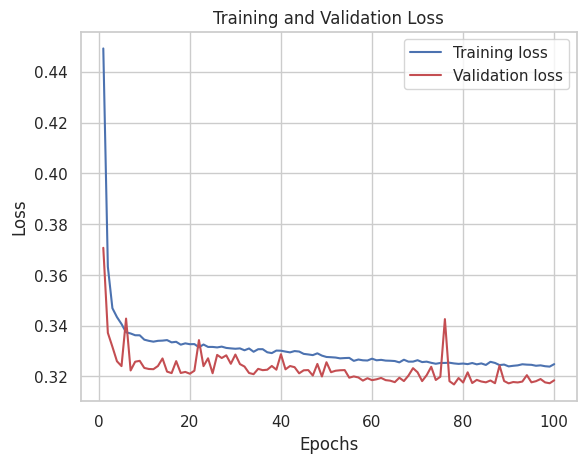

In [194]:
# Train the model
history = ann2.fit(X_train3, y_train3, batch_size=50, epochs=100, validation_data=(X_valid3, y_valid3))

# Predictions and performance evaluation
y_train3_pred = np.where(ann2.predict(X_train3) > 0.5, 1, 0)
y_valid3_pred = np.where(ann2.predict(X_valid3) > 0.5, 1, 0)
y_test3_pred = np.where(ann2.predict(X_test3) > 0.5, 1, 0)

ann2.summary()

cm_valid = confusion_matrix(y_valid3, y_valid3_pred)
cm_test = confusion_matrix(y_test3, y_test3_pred)

print(cm_valid)
print(classification_report(y_valid3, y_valid3_pred))
print(classification_report(y_test3, y_test3_pred))

# Plot the training and validation loss over epochs
train_loss = history.history['loss']
valid_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100
3419/3419 [==============================] - 15s 4ms/step - loss: 0.3295 - auc_6: 0.8981 - val_loss: 0.3200 - val_auc_6: 0.9045
Epoch 2/100
3419/3419 [==============================] - 15s 4ms/step - loss: 0.3271 - auc_6: 0.8996 - val_loss: 0.3160 - val_auc_6: 0.9056
Epoch 3/100
3419/3419 [==============================] - 14s 4ms/step - loss: 0.3264 - auc_6: 0.8999 - val_loss: 0.3164 - val_auc_6: 0.9060
Epoch 4/100
3419/3419 [==============================] - 11s 3ms/step - loss: 0.3251 - auc_6: 0.9007 - val_loss: 0.3166 - val_auc_6: 0.9054
Epoch 5/100
3419/3419 [==============================] - 10s 3ms/step - loss: 0.3250 - auc_6: 0.9009 - val_loss: 0.3162 - val_auc_6: 0.9059
Epoch 6/100
3419/3419 [==============================] - 11s 3ms/step - loss: 0.3242 - auc_6: 0.9013 - val_loss: 0.3201 - val_auc_6: 0.9044
Epoch 7/100
3419/3419 [==============================] - 10s 3ms/step - loss: 0.3235 - auc_6: 0.9018 - val_loss: 0.3144 - val_auc_6: 0.9068
Epoch 8/100
3419/341

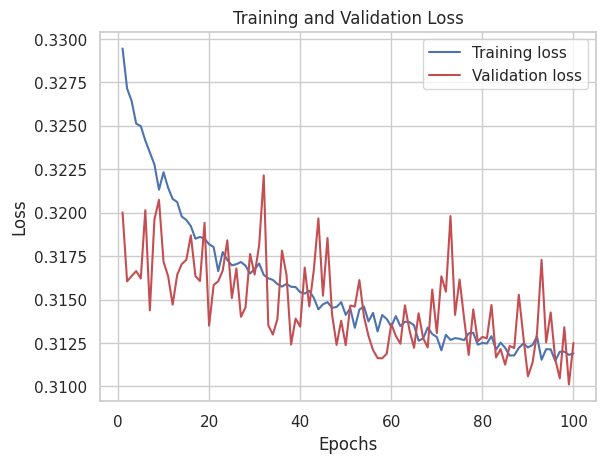

In [196]:
# Train the model
history = ann2.fit(X_train3, y_train3, batch_size=10, epochs=100, validation_data=(X_valid3, y_valid3))

# Predictions and performance evaluation
y_train3_pred = np.where(ann2.predict(X_train3) > 0.5, 1, 0)
y_valid3_pred = np.where(ann2.predict(X_valid3) > 0.5, 1, 0)
y_test3_pred = np.where(ann2.predict(X_test3) > 0.5, 1, 0)

ann2.summary()

cm_valid = confusion_matrix(y_valid3, y_valid3_pred)
cm_test = confusion_matrix(y_test3, y_test3_pred)

print(cm_valid)
print(classification_report(y_valid3, y_valid3_pred))
print(classification_report(y_test3, y_test3_pred))

# Plot the training and validation loss over epochs
train_loss = history.history['loss']
valid_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4. Model Result Summary

In [121]:
report_metrics

,Model_Run,Model_Type,Model_Name,Data_Structure,Training_Time,Validation_Time,AUC,Accuracy,F1_Score,Recall,Precision,Specificity
0,1,SK_Learn,Naive_Bayes,Mix_Columns,0.01,0.01,0.677352,0.811384,0.698894,0.422837,0.658051,0.931867
1,2,SK_Learn,Naive_Bayes,Cat_Columns,0.03,0.01,0.798773,0.811794,0.765224,0.774048,0.576249,0.823498
2,3,SK_Learn,Naive_Bayes,Cat_Columns,0.02,0.00,0.734895,0.678378,0.651084,0.842215,0.412193,0.627575
3,4,SK_Learn,Naive_Bayes,Num_Columns,0.04,0.00,0.636570,0.805979,0.658687,0.314879,0.700539,0.958262
4,5,SK_Learn,Naive_Bayes,Num_Columns,0.06,0.01,0.636570,0.805979,0.658687,0.314879,0.700539,0.958262
5,6,SK_Learn,Naive_Bayes,Num_Columns,0.06,0.02,0.622158,0.782883,0.637843,0.316955,0.575016,0.927361
6,7,Group_Implementation,Discrete_Naive_Bayes,Cat_Columns,4.66,680.32,0.786739,0.723997,0.697655,0.905882,0.458013,0.130579
7,8,Group_Implementation,Naive_Bayes,Mix_Columns,2.69,817.64,0.698906,0.829894,0.725445,0.450173,0.727222,0.216094
8,9,Group_Implementation,Naive_Bayes,Cat_Columns,4.20,628.18,0.786406,0.723669,0.697328,0.905536,0.457678,0.130365
9,10,Group_Implementation,Naive_Bayes,Num_Columns,0.01,1053.82,0.636570,0.805979,0.658687,0.314879,0.700539,0.225644


Best Performing Model is 41	Group_Implementation	Neural_Network	Num_Columns. 

Model Description: 


1.   Categorical columns first ordinal encoded and the one hot encoded
2.   Numerical columns scalred using standard scaling method





Epoch 1/100
1069/1069 [==============================] - 4s 3ms/step - loss: 0.8597 - accuracy: 0.7341 - val_loss: 0.4290 - val_accuracy: 0.8016
Epoch 2/100
1069/1069 [==============================] - 3s 2ms/step - loss: 0.4206 - accuracy: 0.8040 - val_loss: 0.3990 - val_accuracy: 0.8173
Epoch 3/100
1069/1069 [==============================] - 3s 2ms/step - loss: 0.4074 - accuracy: 0.8121 - val_loss: 0.3874 - val_accuracy: 0.8238
Epoch 4/100
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3963 - accuracy: 0.8194 - val_loss: 0.3777 - val_accuracy: 0.8285
Epoch 5/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3819 - accuracy: 0.8234 - val_loss: 0.3555 - val_accuracy: 0.8359
Epoch 6/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3545 - accuracy: 0.8346 - val_loss: 0.3344 - val_accuracy: 0.8414
Epoch 7/100
1069/1069 [==============================] - 3s 2ms/step - loss: 0.3412 - accuracy: 0.8392 - val_loss: 0.3308 - val_ac

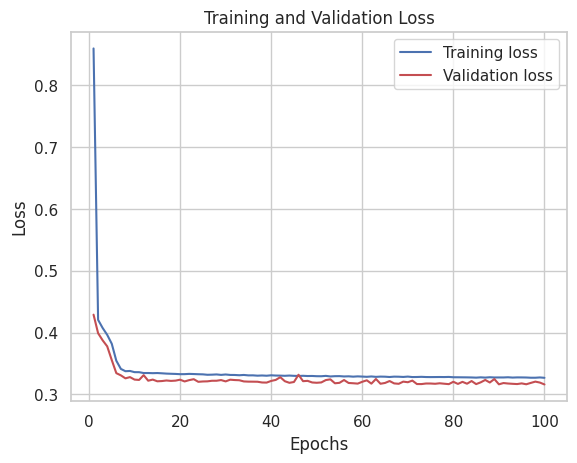

In [177]:
# Train the model
history = ann.fit(X_train3, y_train3, batch_size=32, epochs=100, validation_data=(X_valid3, y_valid3))

# Predictions and performance evaluation
y_train3_pred = np.where(ann.predict(X_train3) > 0.5, 1, 0)
y_valid3_pred = np.where(ann.predict(X_valid3) > 0.5, 1, 0)
y_test3_pred = np.where(ann.predict(X_test3) > 0.5, 1, 0)

ann.summary()

cm_valid = confusion_matrix(y_valid3, y_valid3_pred)
cm_test = confusion_matrix(y_test3, y_test3_pred)

print(cm_valid)
print(classification_report(y_valid3, y_valid3_pred))
print(classification_report(y_test3, y_test3_pred))

# Plot the training and validation loss over epochs
train_loss = history.history['loss']
valid_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [175]:
print('\n 3.7 NN - All columns Numerical - Standard Scaler')


start = timeit.default_timer()
ann.fit(X_train3, y_train3, batch_size = 32, epochs = 100)

y_train3_pred = ann.predict(X_train3)
y_train3_pred= np.where(y_train3_pred > 0.5, 1, 0)
stop = timeit.default_timer()
train_time=round((stop - start),2)

start = timeit.default_timer()
y_valid3_pred = ann.predict(X_valid3)
y_valid3_pred= np.where(y_valid3_pred > 0.5, 1, 0)
stop = timeit.default_timer()
valid_time=round((stop - start),2)

start = timeit.default_timer()
y_test3_pred = ann.predict(X_test3)
y_test3_pred= np.where(y_test3_pred > 0.5, 1, 0)
stop = timeit.default_timer()
test_time=round((stop - start),2)

ann.summary()

cm_valid = confusion_matrix(y_valid3, y_valid3_pred)

cm_test = confusion_matrix(y_test3, y_test3_pred)

print(cm_valid)
print(classification_report(y_valid3, y_valid3_pred))
print(classification_report(y_test3, y_test3_pred))


 3.7 NN - All columns Numerical - Standard Scaler
Epoch 1/100
1069/1069 [==============================] - 4s 3ms/step - loss: 0.4617 - accuracy: 0.7781
Epoch 2/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4100 - accuracy: 0.8093
Epoch 3/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3988 - accuracy: 0.8172
Epoch 4/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3939 - accuracy: 0.8194
Epoch 5/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3909 - accuracy: 0.8222
Epoch 6/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3907 - accuracy: 0.8213
Epoch 7/100
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3899 - accuracy: 0.8210
Epoch 8/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3905 - accuracy: 0.8212
Epoch 9/100
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3897 - accuracy: 0.8210
Epoch 10/100
1069/1069

In [133]:
metrics_report(41,"Group_Implementation", "Neural_Network", "Num_Columns",train_time, valid_time, y_actual=y_valid3, y_pred=pd.Series(y_valid3_pred.flatten()), thresh=0.5)

Model_Name:  Neural_Network
AUC:0.744
accuracy:0.849
f1_score:0.768
recall:0.544
precision:0.748
specificity:0.209
train_time:264.620
valid_time:1.330




{'Model_Run': 41,
 'Model_Type': 'Group_Implementation',
 'Model_Name': 'Neural_Network',
 'Data_Structure': 'Num_Columns',
 'Training_Time': 264.62,
 'Validation_Time': 1.33,
 'AUC': 0.7437118523248735,
 'Accuracy': 0.8487305487305488,
 'F1_Score': 0.7675041243461751,
 'Recall': 0.5442906574394464,
 'Precision': 0.7479790775083215,
 'Specificity': 0.20879828326180258}

In [134]:
metrics_report(41,"Group_Implementation", "Neural_Network", "Num_Columns",train_time, test_time, y_actual=y_test3, y_pred=pd.Series(y_test3_pred.flatten()), thresh=0.5)

Model_Name:  Neural_Network
AUC:0.738
accuracy:0.848
f1_score:0.761
recall:0.536
precision:0.725
specificity:0.037
train_time:264.620
valid_time:0.370




{'Model_Run': 41,
 'Model_Type': 'Group_Implementation',
 'Model_Name': 'Neural_Network',
 'Data_Structure': 'Num_Columns',
 'Training_Time': 264.62,
 'Validation_Time': 0.37,
 'AUC': 0.7380439050984967,
 'Accuracy': 0.8481375358166189,
 'F1_Score': 0.76083609324604,
 'Recall': 0.5359712230215827,
 'Precision': 0.7250608272506083,
 'Specificity': 0.03656597774244833}

##### Note other methods: 

1. from sklearn.svm import LinearSVC
2. from sklearn.linear_model import SGDClassifier
3. from sklearn.neighbors import NearestCentroid




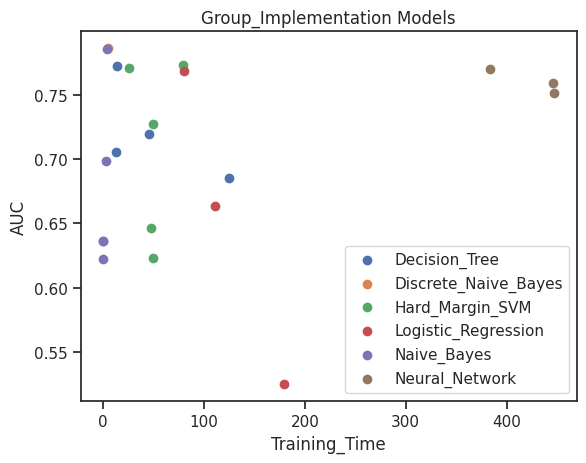

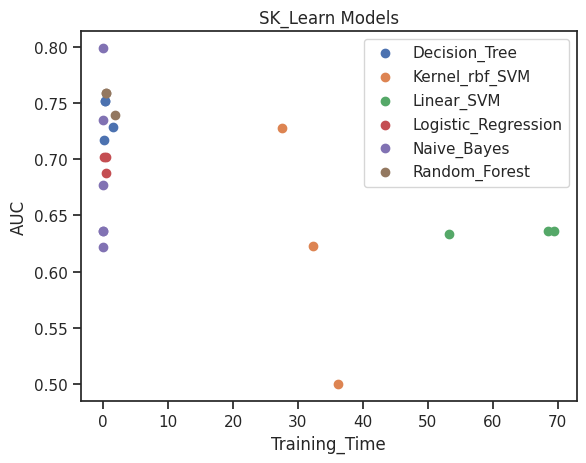

In [124]:
for model_type, group in report_metrics.groupby('Model_Type'):
    for model_name, group2 in group.groupby('Model_Name'):
        plt.scatter(group2['Training_Time'], group2['AUC'], label=model_name)
    plt.xlabel('Training_Time')
    plt.ylabel('AUC')
    plt.title(f'{model_type} Models')
    plt.legend()
    plt.show()

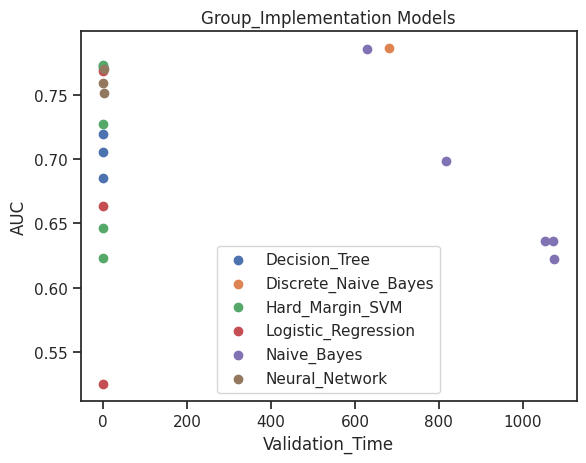

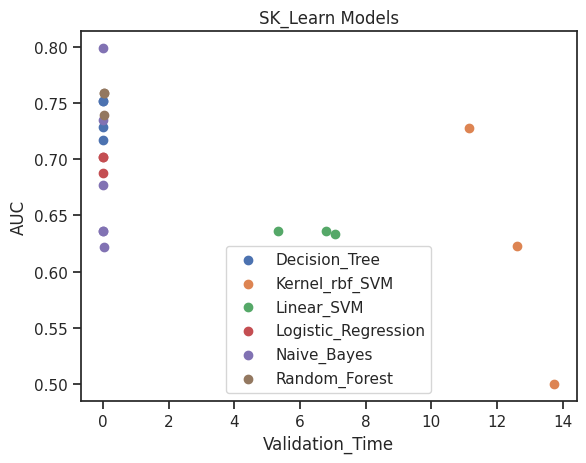

In [130]:
for model_type, group in report_metrics.groupby('Model_Type'):
    for model_name, group2 in group.groupby('Model_Name'):
        plt.scatter(group2['Validation_Time'], group2['AUC'], label=model_name)
    plt.xlabel('Validation_Time')
    plt.ylabel('AUC')
    plt.title(f'{model_type} Models')
    plt.legend()
    plt.show()

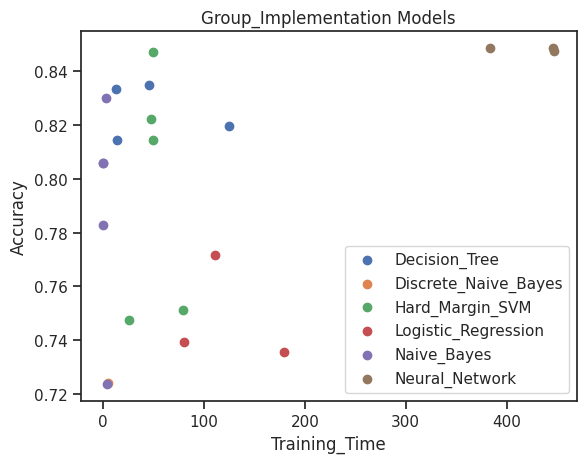

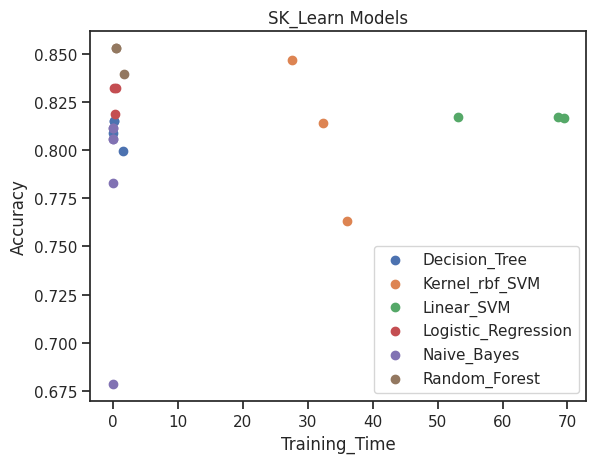

In [126]:
for model_type, group in report_metrics.groupby('Model_Type'):
    for model_name, group2 in group.groupby('Model_Name'):
        plt.scatter(group2['Training_Time'], group2['Accuracy'], label=model_name)
    plt.xlabel('Training_Time')
    plt.ylabel('Accuracy')
    plt.title(f'{model_type} Models')
    plt.legend()
    plt.show()

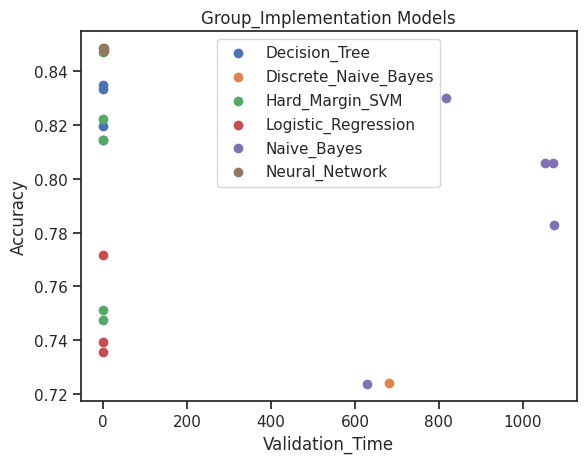

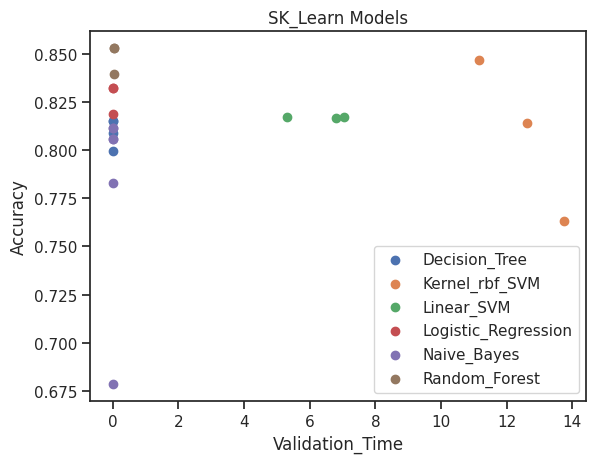

In [129]:
for model_type, group in report_metrics.groupby('Model_Type'):
    for model_name, group2 in group.groupby('Model_Name'):
        plt.scatter(group2['Validation_Time'], group2['Accuracy'], label=model_name)
    plt.xlabel('Validation_Time')
    plt.ylabel('Accuracy')
    plt.title(f'{model_type} Models')
    plt.legend()
    plt.show()

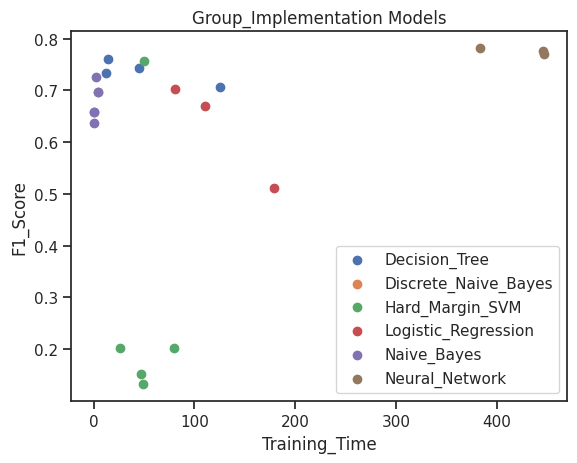

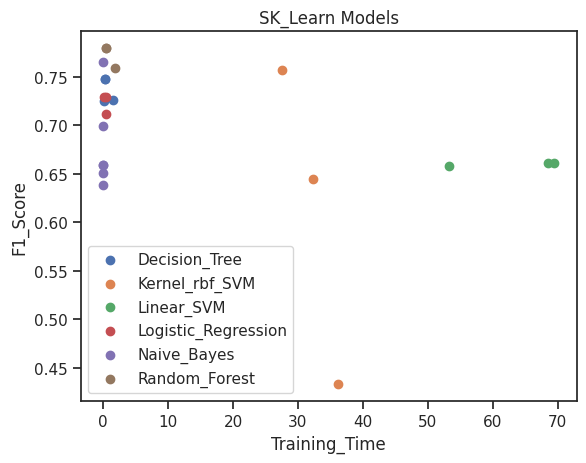

In [127]:
for model_type, group in report_metrics.groupby('Model_Type'):
    for model_name, group2 in group.groupby('Model_Name'):
        plt.scatter(group2['Training_Time'], group2['F1_Score'], label=model_name)
    plt.xlabel('Training_Time')
    plt.ylabel('F1_Score')
    plt.title(f'{model_type} Models')
    plt.legend()
    plt.show()

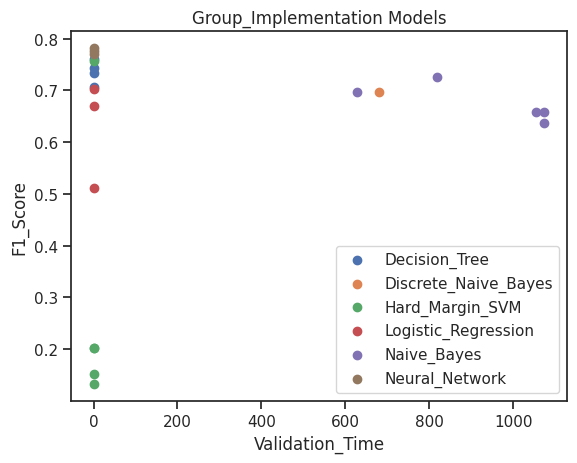

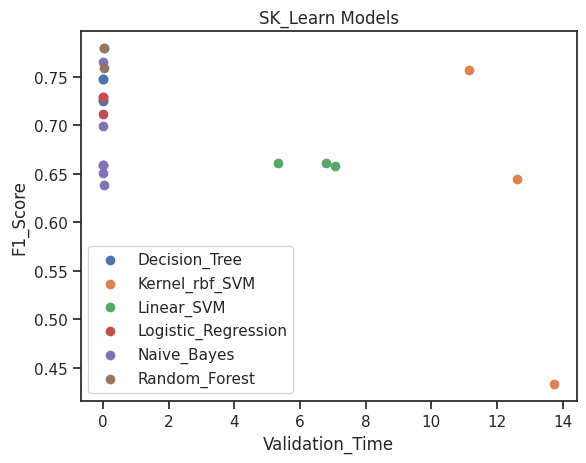

In [128]:
for model_type, group in report_metrics.groupby('Model_Type'):
    for model_name, group2 in group.groupby('Model_Name'):
        plt.scatter(group2['Validation_Time'], group2['F1_Score'], label=model_name)
    plt.xlabel('Validation_Time')
    plt.ylabel('F1_Score')
    plt.title(f'{model_type} Models')
    plt.legend()
    plt.show()

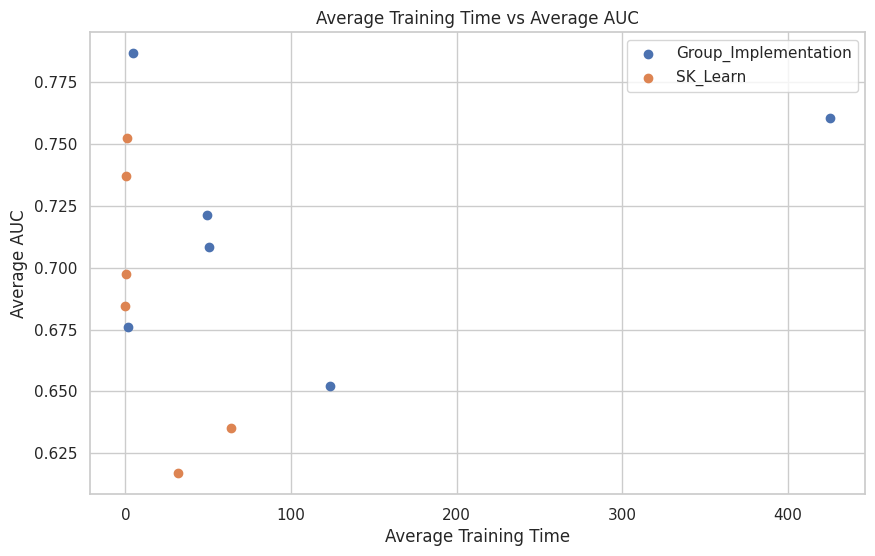

In [137]:
# Group by Model_Name and Model_Type and compute the means of Training_Time and AUC
grouped = report_metrics.groupby(['Model_Name', 'Model_Type']).mean()

# Create a scatter plot of average Training_Time vs average AUC
fig, ax = plt.subplots(figsize=(10, 6))
for model_type in grouped.index.get_level_values(1).unique():
    ax.scatter(grouped.loc[(slice(None), model_type), 'Training_Time'], 
               grouped.loc[(slice(None), model_type), 'AUC'], 
               label=model_type)

# Set plot title, axis labels and legend
ax.set_title('Average Training Time vs Average AUC')
ax.set_xlabel('Average Training Time')
ax.set_ylabel('Average AUC')
ax.legend()

plt.show()

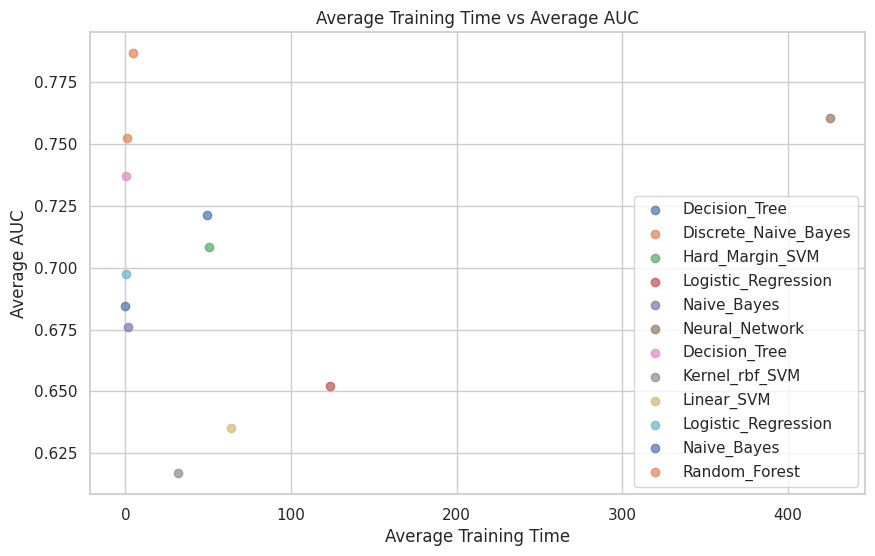

In [144]:
grouped = report_metrics.groupby(['Model_Name', 'Model_Type']).mean()

fig, ax = plt.subplots(figsize=(10, 6))
for model_type in grouped.index.get_level_values(1).unique():
  for name, group in grouped.loc[(slice(None), model_type), :].groupby('Model_Name'):
    ax.scatter(group['Training_Time'], group['AUC'], label=name, alpha=0.7)

ax.set_title('Average Training Time vs Average AUC')
ax.set_xlabel('Average Training Time')
ax.set_ylabel('Average AUC')
ax.legend()

plt.show()

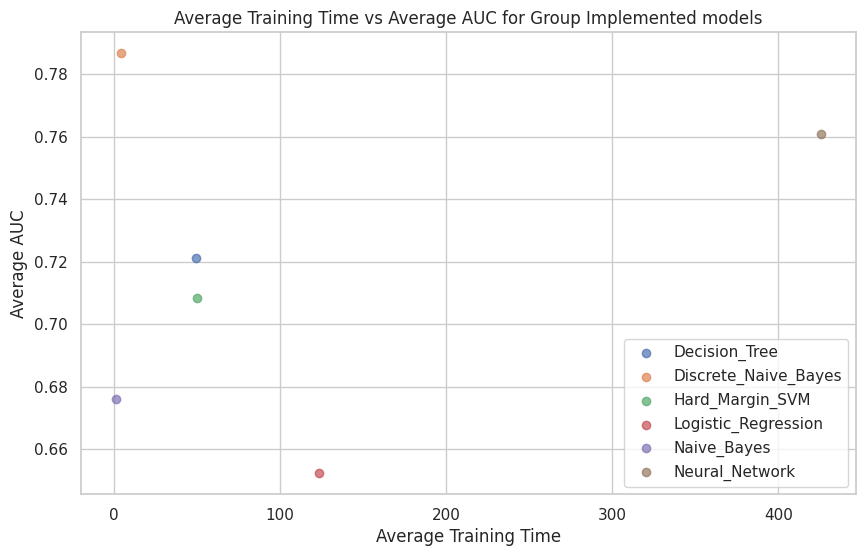

In [158]:
grouped = report_metrics[report_metrics['Model_Type']=='Group_Implementation'].groupby(['Model_Name', 'Model_Type']).mean()

fig, ax = plt.subplots(figsize=(10, 6))
for model_type in grouped.index.get_level_values(1).unique():
  for name, group in grouped.loc[(slice(None), model_type), :].groupby('Model_Name'):
    ax.scatter(group['Training_Time'], group['AUC'], label=name, alpha=0.7)

ax.set_title('Average Training Time vs Average AUC for Group Implemented models')
ax.set_xlabel('Average Training Time')
ax.set_ylabel('Average AUC')
ax.legend()

plt.show()

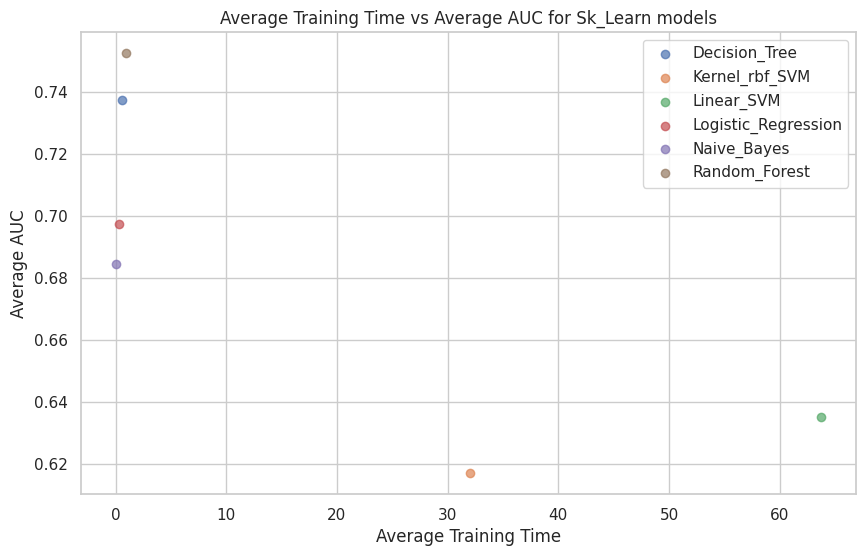

In [157]:
grouped = report_metrics[report_metrics['Model_Type']=='SK_Learn'].groupby(['Model_Name', 'Model_Type']).mean()

fig, ax = plt.subplots(figsize=(10, 6))
for model_type in grouped.index.get_level_values(1).unique():
  for name, group in grouped.loc[(slice(None), model_type), :].groupby('Model_Name'):
    ax.scatter(group['Training_Time'], group['AUC'], label=name, alpha=0.7)

ax.set_title('Average Training Time vs Average AUC for Sk_Learn models')
ax.set_xlabel('Average Training Time')
ax.set_ylabel('Average AUC')
ax.legend()

plt.show()

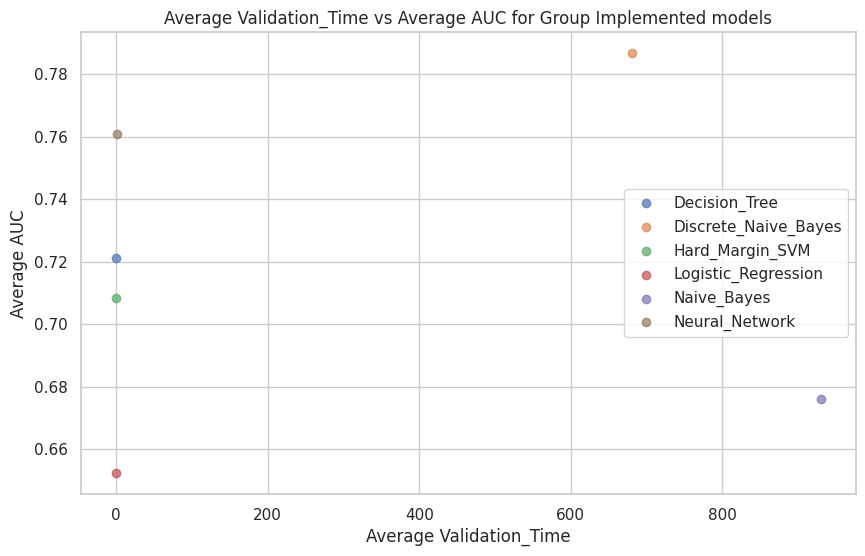

In [160]:
grouped = report_metrics[report_metrics['Model_Type']=='Group_Implementation'].groupby(['Model_Name', 'Model_Type']).mean()

fig, ax = plt.subplots(figsize=(10, 6))
for model_type in grouped.index.get_level_values(1).unique():
  for name, group in grouped.loc[(slice(None), model_type), :].groupby('Model_Name'):
    ax.scatter(group['Validation_Time'], group['AUC'], label=name, alpha=0.7)

ax.set_title('Average Validation_Time vs Average AUC for Group Implemented models')
ax.set_xlabel('Average Validation_Time')
ax.set_ylabel('Average AUC')
ax.legend()

plt.show()

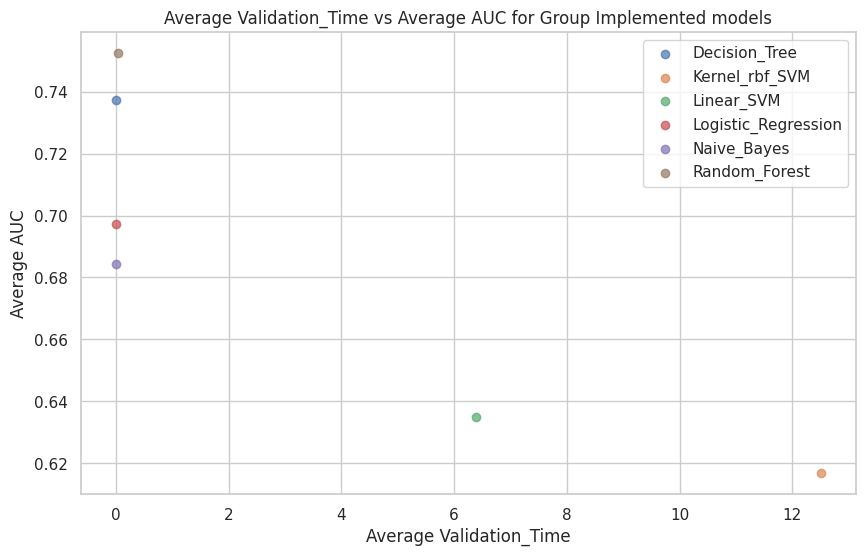

In [159]:
grouped = report_metrics[report_metrics['Model_Type']=='SK_Learn'].groupby(['Model_Name', 'Model_Type']).mean()

fig, ax = plt.subplots(figsize=(10, 6))
for model_type in grouped.index.get_level_values(1).unique():
  for name, group in grouped.loc[(slice(None), model_type), :].groupby('Model_Name'):
    ax.scatter(group['Validation_Time'], group['AUC'], label=name, alpha=0.7)

ax.set_title('Average Validation_Time vs Average AUC for Group Implemented models')
ax.set_xlabel('Average Validation_Time')
ax.set_ylabel('Average AUC')
ax.legend()

plt.show()

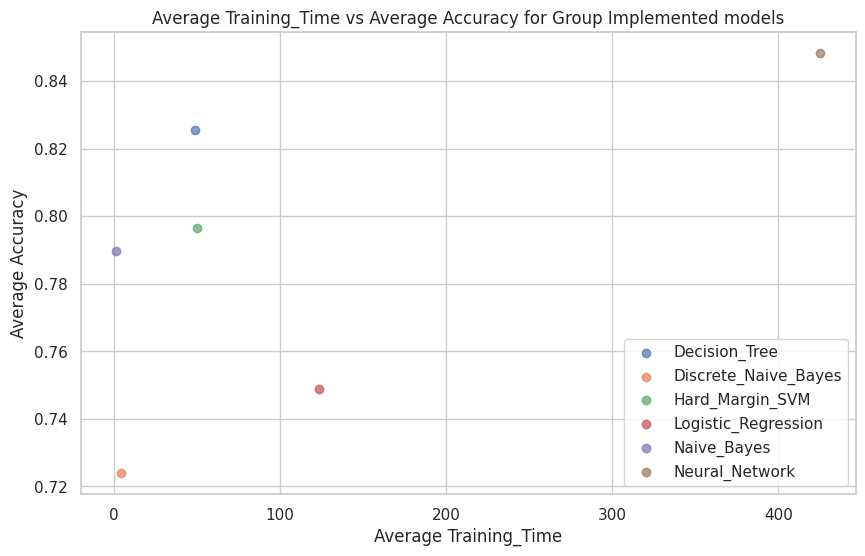

In [165]:
grouped = report_metrics[report_metrics['Model_Type']=='Group_Implementation'].groupby(['Model_Name', 'Model_Type']).mean()

fig, ax = plt.subplots(figsize=(10, 6))
for model_type in grouped.index.get_level_values(1).unique():
  for name, group in grouped.loc[(slice(None), model_type), :].groupby('Model_Name'):
    ax.scatter(group['Training_Time'], group['Accuracy'], label=name, alpha=0.7)

ax.set_title('Average Training_Time vs Average Accuracy for Group Implemented models')
ax.set_xlabel('Average Training_Time')
ax.set_ylabel('Average Accuracy')
ax.legend()

plt.show()

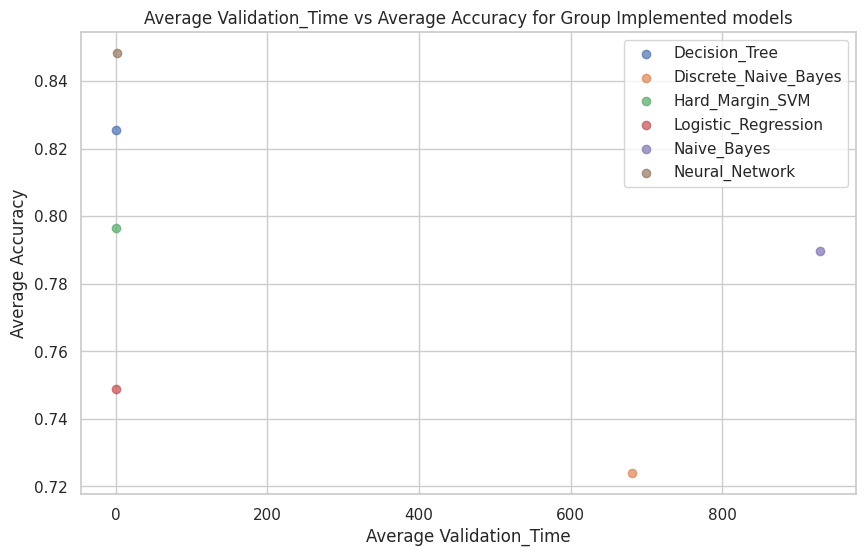

In [164]:
grouped = report_metrics[report_metrics['Model_Type']=='Group_Implementation'].groupby(['Model_Name', 'Model_Type']).mean()

fig, ax = plt.subplots(figsize=(10, 6))
for model_type in grouped.index.get_level_values(1).unique():
  for name, group in grouped.loc[(slice(None), model_type), :].groupby('Model_Name'):
    ax.scatter(group['Validation_Time'], group['Accuracy'], label=name, alpha=0.7)

ax.set_title('Average Validation_Time vs Average Accuracy for Group Implemented models')
ax.set_xlabel('Average Validation_Time')
ax.set_ylabel('Average Accuracy')
ax.legend()

plt.show()

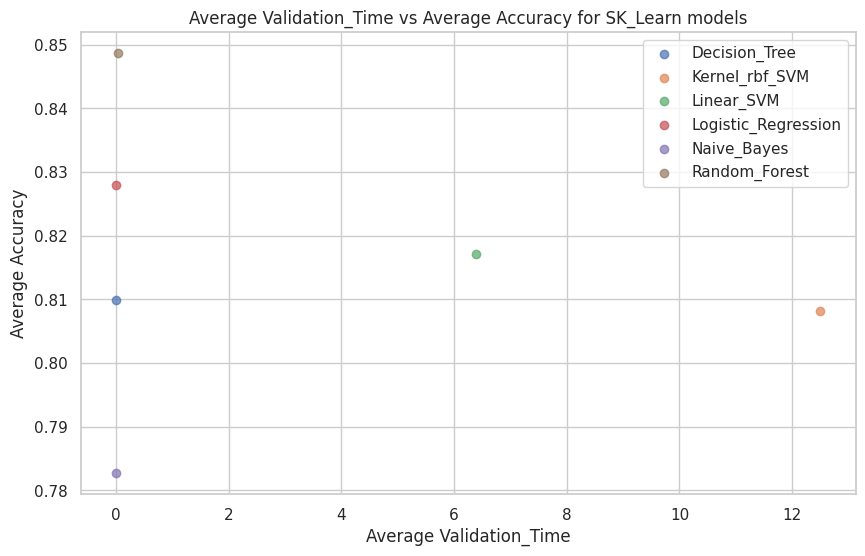

In [163]:
grouped = report_metrics[report_metrics['Model_Type']=='SK_Learn'].groupby(['Model_Name', 'Model_Type']).mean()

fig, ax = plt.subplots(figsize=(10, 6))
for model_type in grouped.index.get_level_values(1).unique():
  for name, group in grouped.loc[(slice(None), model_type), :].groupby('Model_Name'):
    ax.scatter(group['Validation_Time'], group['Accuracy'], label=name, alpha=0.7)

ax.set_title('Average Validation_Time vs Average Accuracy for SK_Learn models')
ax.set_xlabel('Average Validation_Time')
ax.set_ylabel('Average Accuracy')
ax.legend()

plt.show()

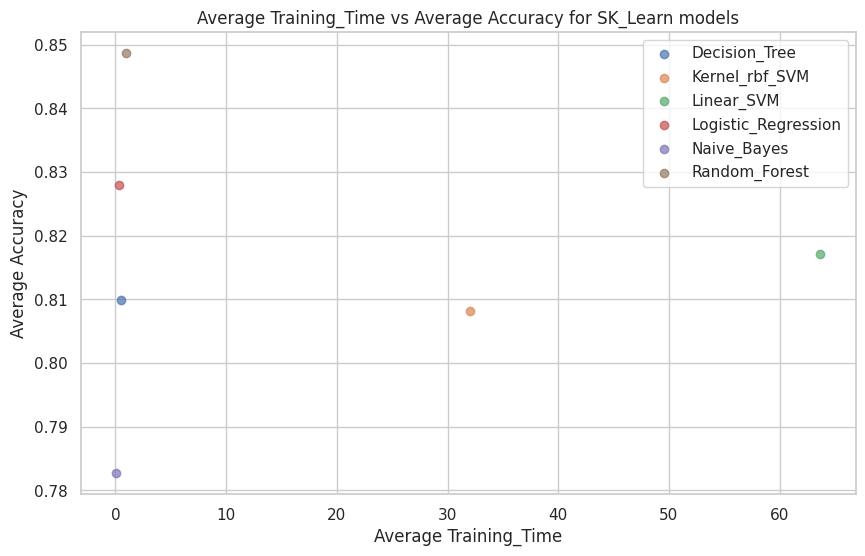

In [168]:
grouped = report_metrics[report_metrics['Model_Type']=='SK_Learn'].groupby(['Model_Name', 'Model_Type']).mean()

fig, ax = plt.subplots(figsize=(10, 6))
for model_type in grouped.index.get_level_values(1).unique():
  for name, group in grouped.loc[(slice(None), model_type), :].groupby('Model_Name'):
    ax.scatter(group['Training_Time'], group['Accuracy'], label=name, alpha=0.7)

ax.set_title('Average Training_Time vs Average Accuracy for SK_Learn models')
ax.set_xlabel('Average Training_Time')
ax.set_ylabel('Average Accuracy')
ax.legend()

plt.show()

## 5. Result Summary 2

In [169]:
grouped = report_metrics.groupby(['Model_Name', 'Model_Type']).mean()

In [170]:
grouped

Training_Time  Validation_Time  \
Model_Name           Model_Type                                             
Decision_Tree        Group_Implementation      49.265000         0.040000   
                     SK_Learn                   0.542500         0.005000   
Discrete_Naive_Bayes Group_Implementation       4.660000       680.320000   
Hard_Margin_SVM      Group_Implementation      50.312000         0.006000   
Kernel_rbf_SVM       SK_Learn                  31.990000        12.500000   
Linear_SVM           SK_Learn                  63.686667         6.390000   
Logistic_Regression  Group_Implementation     123.453333         0.003333   
                     SK_Learn                   0.350000         0.000000   
Naive_Bayes          Group_Implementation       1.386000       929.428000   
                     SK_Learn                   0.036667         0.008333   
Neural_Network       Group_Implementation     425.360000         0.993333   
Random_Forest        SK_Learn                   0.920000         0.033333   

                                                AUC  Accuracy  F1_Score  \
Model_Name           Model_Type                                           
Decision_Tree        Group_Implementation  0.721157  0.825577  0.736230   
                     SK_Learn              0.737221  0.809848  0.736817   
Discrete_Naive_Bayes Group_Implementation  0.786739  0.723997  0.697655   
Hard_Margin_SVM      Group_Implementation  0.708432  0.796511  0.289012   
Kernel_rbf_SVM       SK_Learn              0.616910  0.808217  0.611202   
Linear_SVM           SK_Learn              0.635087  0.817199  0.659733   
Logistic_Regression  Group_Implementation  0.652373  0.748894  0.628541   
                     SK_Learn              0.697322  0.827901  0.723157   
Naive_Bayes          Group_Implementation  0.676122  0.789681  0.675598   
                     SK_Learn              0.684386  0.782733  0.678403   
Neural_Network       Group_Implementation  0.760755  0.848266  0.776343   
Random_Forest        SK_Learn              0.752447  0.848703  0.772375   

                                             Recall  Precision  Specificity  
Model_Name           Model_Type                                              
Decision_Tree        Group_Implementation  0.523461   0.682063     0.918852  
                     SK_Learn              0.599308   0.598410     0.875134  
Discrete_Naive_Bayes Group_Implementation  0.905882   0.458013     0.130579  
Hard_Margin_SVM      Group_Implementation  0.541176   0.685428     0.875687  
Kernel_rbf_SVM       SK_Learn              0.253633   0.542525     0.980186  
Linear_SVM           SK_Learn              0.289273   0.824681     0.980901  
Logistic_Regression  Group_Implementation  0.469089   0.443628     0.835658  
                     SK_Learn              0.449366   0.718479     0.945279  
Naive_Bayes          Group_Implementation  0.460484   0.632199     0.203627  
                     SK_Learn              0.497636   0.603764     0.871137  
Neural_Network       Group_Implementation  0.594579   0.716683     0.202146  
Random_Forest        SK_Learn              0.569666   0.731629     0.935229